# EDA CRÉDITOS

Nelson Zepeda (Traudcción y edición)
Fuente: https://github.com/kavita55/Credit-EDA-case-study

Descargar Archivos:
https://drive.google.com/drive/folders/1veDv3nrXkbVRM2T3N7hFIJhfe4j3jRwY?usp=drive_link

### Introducción
Este estudio de caso tiene como propósito ilustrar la aplicación del Análisis Exploratorio de Datos (EDA) en un escenario real de negocios. A lo largo del ejercicio, además de aplicar técnicas abordadas en el módulo de EDA, se desarrollará una comprensión básica de la analítica de riesgo en el sector bancario y de servicios financieros. Asimismo, se analizará cómo los datos pueden ser utilizados para minimizar el riesgo de pérdida de capital al otorgar créditos a los clientes.

### Objetivos del Negocio

Este EDA tiene como objetivo identificar patrones que indiquen si un cliente podría tener dificultades para pagar sus cuotas. Esta información puede ser utilizada para tomar decisiones como rechazar el préstamo, reducir el monto aprobado o aplicar una tasa de interés más alta a solicitantes con mayor riesgo. De este modo, se busca asegurar que los consumidores con capacidad de pago no sean rechazados injustamente.

En otras palabras, la empresa desea comprender los factores determinantes (o variables explicativas) detrás del incumplimiento de pagos, es decir, aquellas variables que representan fuertes indicadores de morosidad. Este conocimiento puede ser aprovechado para mejorar la evaluación del portafolio de crédito y la gestión del riesgo.

Se recomienda realizar una investigación independiente sobre analítica de riesgo para reforzar la comprensión del dominio, enfocándose en los tipos de variables y su relevancia.

 

# 1. Requerimientos

## 1.1 Librerias

In [137]:
# ============================================================
# Configuración inicial: librerías, advertencias y estilos
# ============================================================

# Filtrado de advertencias
import warnings
warnings.filterwarnings('ignore')  # Oculta mensajes de advertencia durante la ejecución

# Importación de librerías para análisis y visualización
import numpy as np                      # Operaciones numéricas y manejo de arrays
import pandas as pd                    # Manipulación de datos con DataFrames
import seaborn as sns                  # Visualización estadística basada en matplotlib
import matplotlib.pyplot as plt        # Gráficos estáticos
from plotly.subplots import make_subplots  # Subgráficos interactivos con Plotly
import plotly.graph_objects as go      # Gráficos interactivos personalizados con Plotly

# Configuración de pandas para mostrar más columnas en pantalla
pd.set_option('display.max_columns', 300)  # Muestra hasta 300 columnas al imprimir un DataFrame

# Estilo visual para matplotlib
plt.style.use('ggplot')  # Aplica un estilo estético tipo ggplot2 (rejillas, colores suaves)


## 1.2 Dataset

- **application_data.csv**  *se guardara como*  **`df1`**
- **previous_application.csv**  *se guardara como*  **`df2`**

# 2. Cargando dataset "application_data.csv"

**2.0.1 Lectura de archivo**

In [138]:
df1 = pd.read_csv("application_data.csv")
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## 2.1 Inspeccionando el Dataframe

**2.1.1 Total de Filas y columnas**

In [139]:
df1.shape       

(307511, 122)

**2.1.2 Chequeando los tipos de datos**

In [140]:
# Muestra un resumen del DataFrame:
# número de filas, columnas, tipos de datos, valores no nulos y uso de memoria.
# El parámetro verbose=True fuerza la visualización de todas las columnas.
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

**2.1.3 Analizando columnas numericas**

In [141]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

**2.1.4 Ordenar el porcentaje de valores nulos en cada columna en orden descendente.**

In [142]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

## 2.2 Data Cleaning

**2.2.1 Columnas en donde los nulos representan mas del 35%**

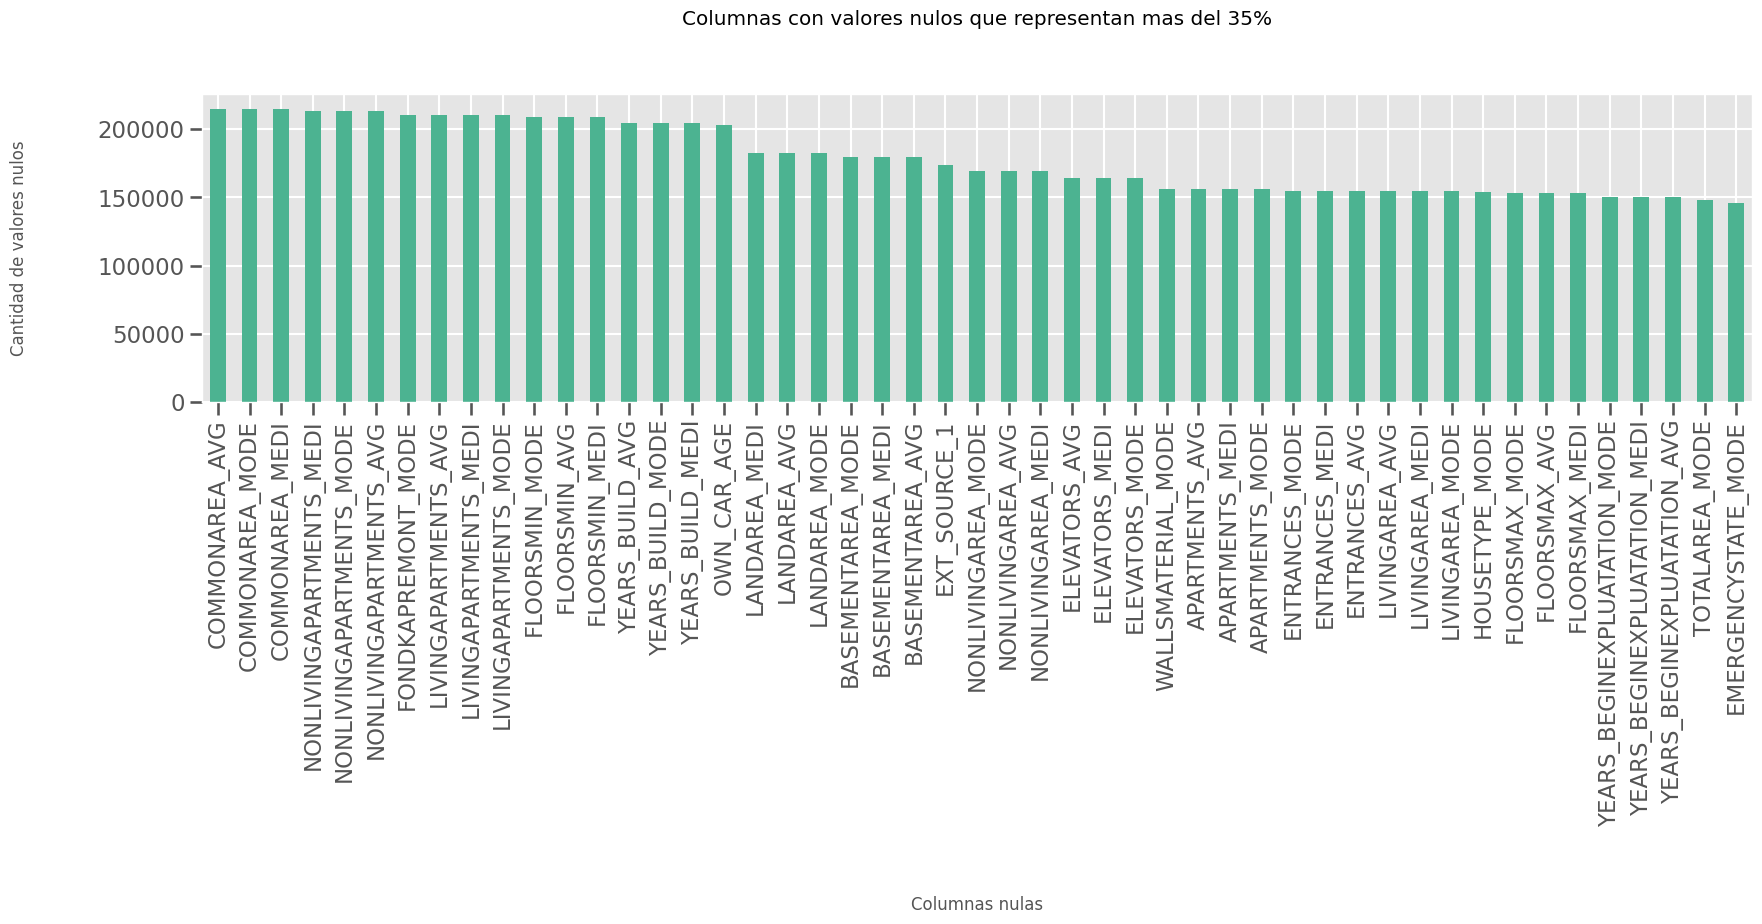

In [143]:
null_col = df1.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df1))]


#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('Columnas con valores nulos que representan mas del 35%') 

plt.xlabel("Columnas nulas",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Cantidad de valores nulos",fontdict={"fontsize":12,"fontweight":5})
plt.show()


**2.2.2 Total de columnas con nulos > 35%**

In [144]:
len(null_col)

49

**2.2.3 Removiendo columnas con nulos > 35%**

In [145]:
label = list(null_col.index.values) #Elaborando lista de columnas
df1.drop(labels = label,axis=1,inplace = True) #Dropeando columnas

**2.2.4 Filas y columnas del nuevo dataset**

In [146]:
df1.shape

(307511, 73)

**2.2.5 Chequeando la nueva distribución de nulos**

In [147]:
null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
CNT_CHILDREN                   0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
TARGET                         0.000000


## 2.3 Tratamiento de los datos faltantes

### 2.3.1 Imputación de columnas con valores nulos menores o iguales al 19% utilizando la moda para columnas numéricas, excepto en el caso de variables numéricas continuas, que se imputaron con la mediana.

In [148]:

df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

**2.3.3 Nueva revisión de nulos a excepción de la columna "OCCUPATION_TYPE"**

In [149]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

### Nota: 

- ** OCCUPATION_TYPE será tratada mas adelante con otros criterios**

## 2.4 Manejo de errores en tipos de datos y valores

**2.4.1**

**Se pueden modificar las siguientes columnas:**

*'DAYS_BIRTH',*  
*'DAYS_EMPLOYED',*  
*'DAYS_REGISTRATION',*  
*'DAYS_ID_PUBLISH'*  
*'DAYS_LAST_PHONE_CHANGE'*  

**las cuales contenían valores negativos o mixtos, y se imputarán utilizando sus valores absolutos para el análisis.**


In [150]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

**2.4.2 Buscando columnas que inician con 'DAYS'**

In [151]:
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

**2.4.3 aplicando valor absoluto**

In [152]:
df1[day_cols]= abs(df1[day_cols])

In [153]:
print(df1['DAYS_BIRTH'].unique())
print(df1['DAYS_EMPLOYED'].unique())
print(df1['DAYS_REGISTRATION'].unique())
print(df1['DAYS_ID_PUBLISH'].unique())
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


**2.4.4 Cambiando** **"Y"** **y** **"N"** **con 1 y 0 para las** **columnas** 

- **`FLAG_OWN_CAR`**

- **`FLAG_OWN_REALTY`**

In [154]:
df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)

df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [155]:
df1[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

**2.4.5 Según la información mostrada a continuación, se puede imputar el valor 'XNA' como "F" en la columna 'CODE_GENDER', ya que el valor más frecuente es `F`.**

In [156]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [157]:
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

**2.4.6 Chequeando ORGANIZATION_TYPE'**

In [158]:
df1.ORGANIZATION_TYPE.value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

- Veamos el valor del tipo de organizacion

In [159]:
df1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

- Aquí se observa que donde el valor de `NAME_INCOME_TYPE` es *Pensioner*, es también donde se encuentran los valores nulos en la columna `ORGANIZATION_TYPE`. Veamos cuántos registros corresponden a *Pensioner* y luego decidiremos si imputamos los valores nulos de `ORGANIZATION_TYPE` con ese valor o no.

In [160]:
df1.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [161]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df1['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

## 2.5 Agrupamiento (Binning) de variables continuas

**2.5.1 Agrupamiento de 'AMT_INCOME_TOTAL' en categorías de 'AMT_INCOME_TYPE' basado en cuantiles**

Esta sentencia crea una nueva columna en el DataFrame df1 llamada 'AMT_INCOME_TYPE', en la que se clasifica el ingreso total (AMT_INCOME_TOTAL) de cada registro en cinco categorías: 'VERY_LOW', 'LOW', 'MEDIUM', 'HIGH' y 'VERY_HIGH', utilizando la función pd.qcut(). Esta función divide los datos en cuantiles según los percentiles definidos en el argumento q=[0, 0.2, 0.5, 0.8, 0.95, 1], lo que significa que agrupa los ingresos en cinco rangos basados en su distribución, desde el 0% al 100%, y asigna una etiqueta correspondiente a cada rango. Así, se convierte una variable numérica continua en una variable categórica ordinal útil para análisis o visualización.

In [162]:
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

**2.5.2 Agrupamiento de 'AMT_CREDIT' en categorías de 'AMT_CREDIT_TYPE' basado en cuantiles**

In [163]:
df1['AMT_CREDIT_TYPE'] = pd.qcut(df1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

**2.5.3 Agrupamiento de la columna 'DAYS_BIRTH' convirtiéndola a años según diferentes grupos de edad ("AGE_GROUP")**

In [164]:
df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int)  
df1['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [165]:
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen']) 

In [166]:
df1[['DAYS_BIRTH','AGE_GROUP']].head()    

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

# 3. Análisis

## 3.1 Conversion de tipos de datos

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

**3.1.1 Se identificó que algunas columnas categóricas tienen el tipo de dato "object", por lo tanto, se cambiará su tipo de dato de "object" a "categorical".**

In [168]:
df1['NAME_CONTRACT_TYPE'] = df1['NAME_CONTRACT_TYPE'].astype('category')
df1['CODE_GENDER'] = df1['CODE_GENDER'].astype('category')
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].astype('category')
df1['NAME_INCOME_TYPE'] = df1['NAME_INCOME_TYPE'].astype('category')
df1['NAME_EDUCATION_TYPE'] = df1['NAME_EDUCATION_TYPE'].astype('category')
df1['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].astype('category')
df1['NAME_HOUSING_TYPE'] = df1['NAME_HOUSING_TYPE'].astype('category')
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].astype('category')
df1['WEEKDAY_APPR_PROCESS_START'] = df1['WEEKDAY_APPR_PROCESS_START'].astype('category')
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].astype('category')

**3.1.2 Datatypes corregidos**

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

**3.1.3 Removiendo columnas innecesarias**

In [170]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df1.drop(labels=unwanted,axis=1,inplace=True)

## 3.2 Outliers

**3.2.1 nuevo total de columnas numericas**

In [171]:
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

35

**3.2.2 Boxplots**
Este bloque genera una figura grande con hasta 35 boxplots (uno por cada columna en numerical_col), distribuidos en una cuadrícula de 7x5 subgráficos. Se utiliza para visualizar la distribución y detectar valores atípicos (outliers) en todas las variables numéricas del DataFrame df1.

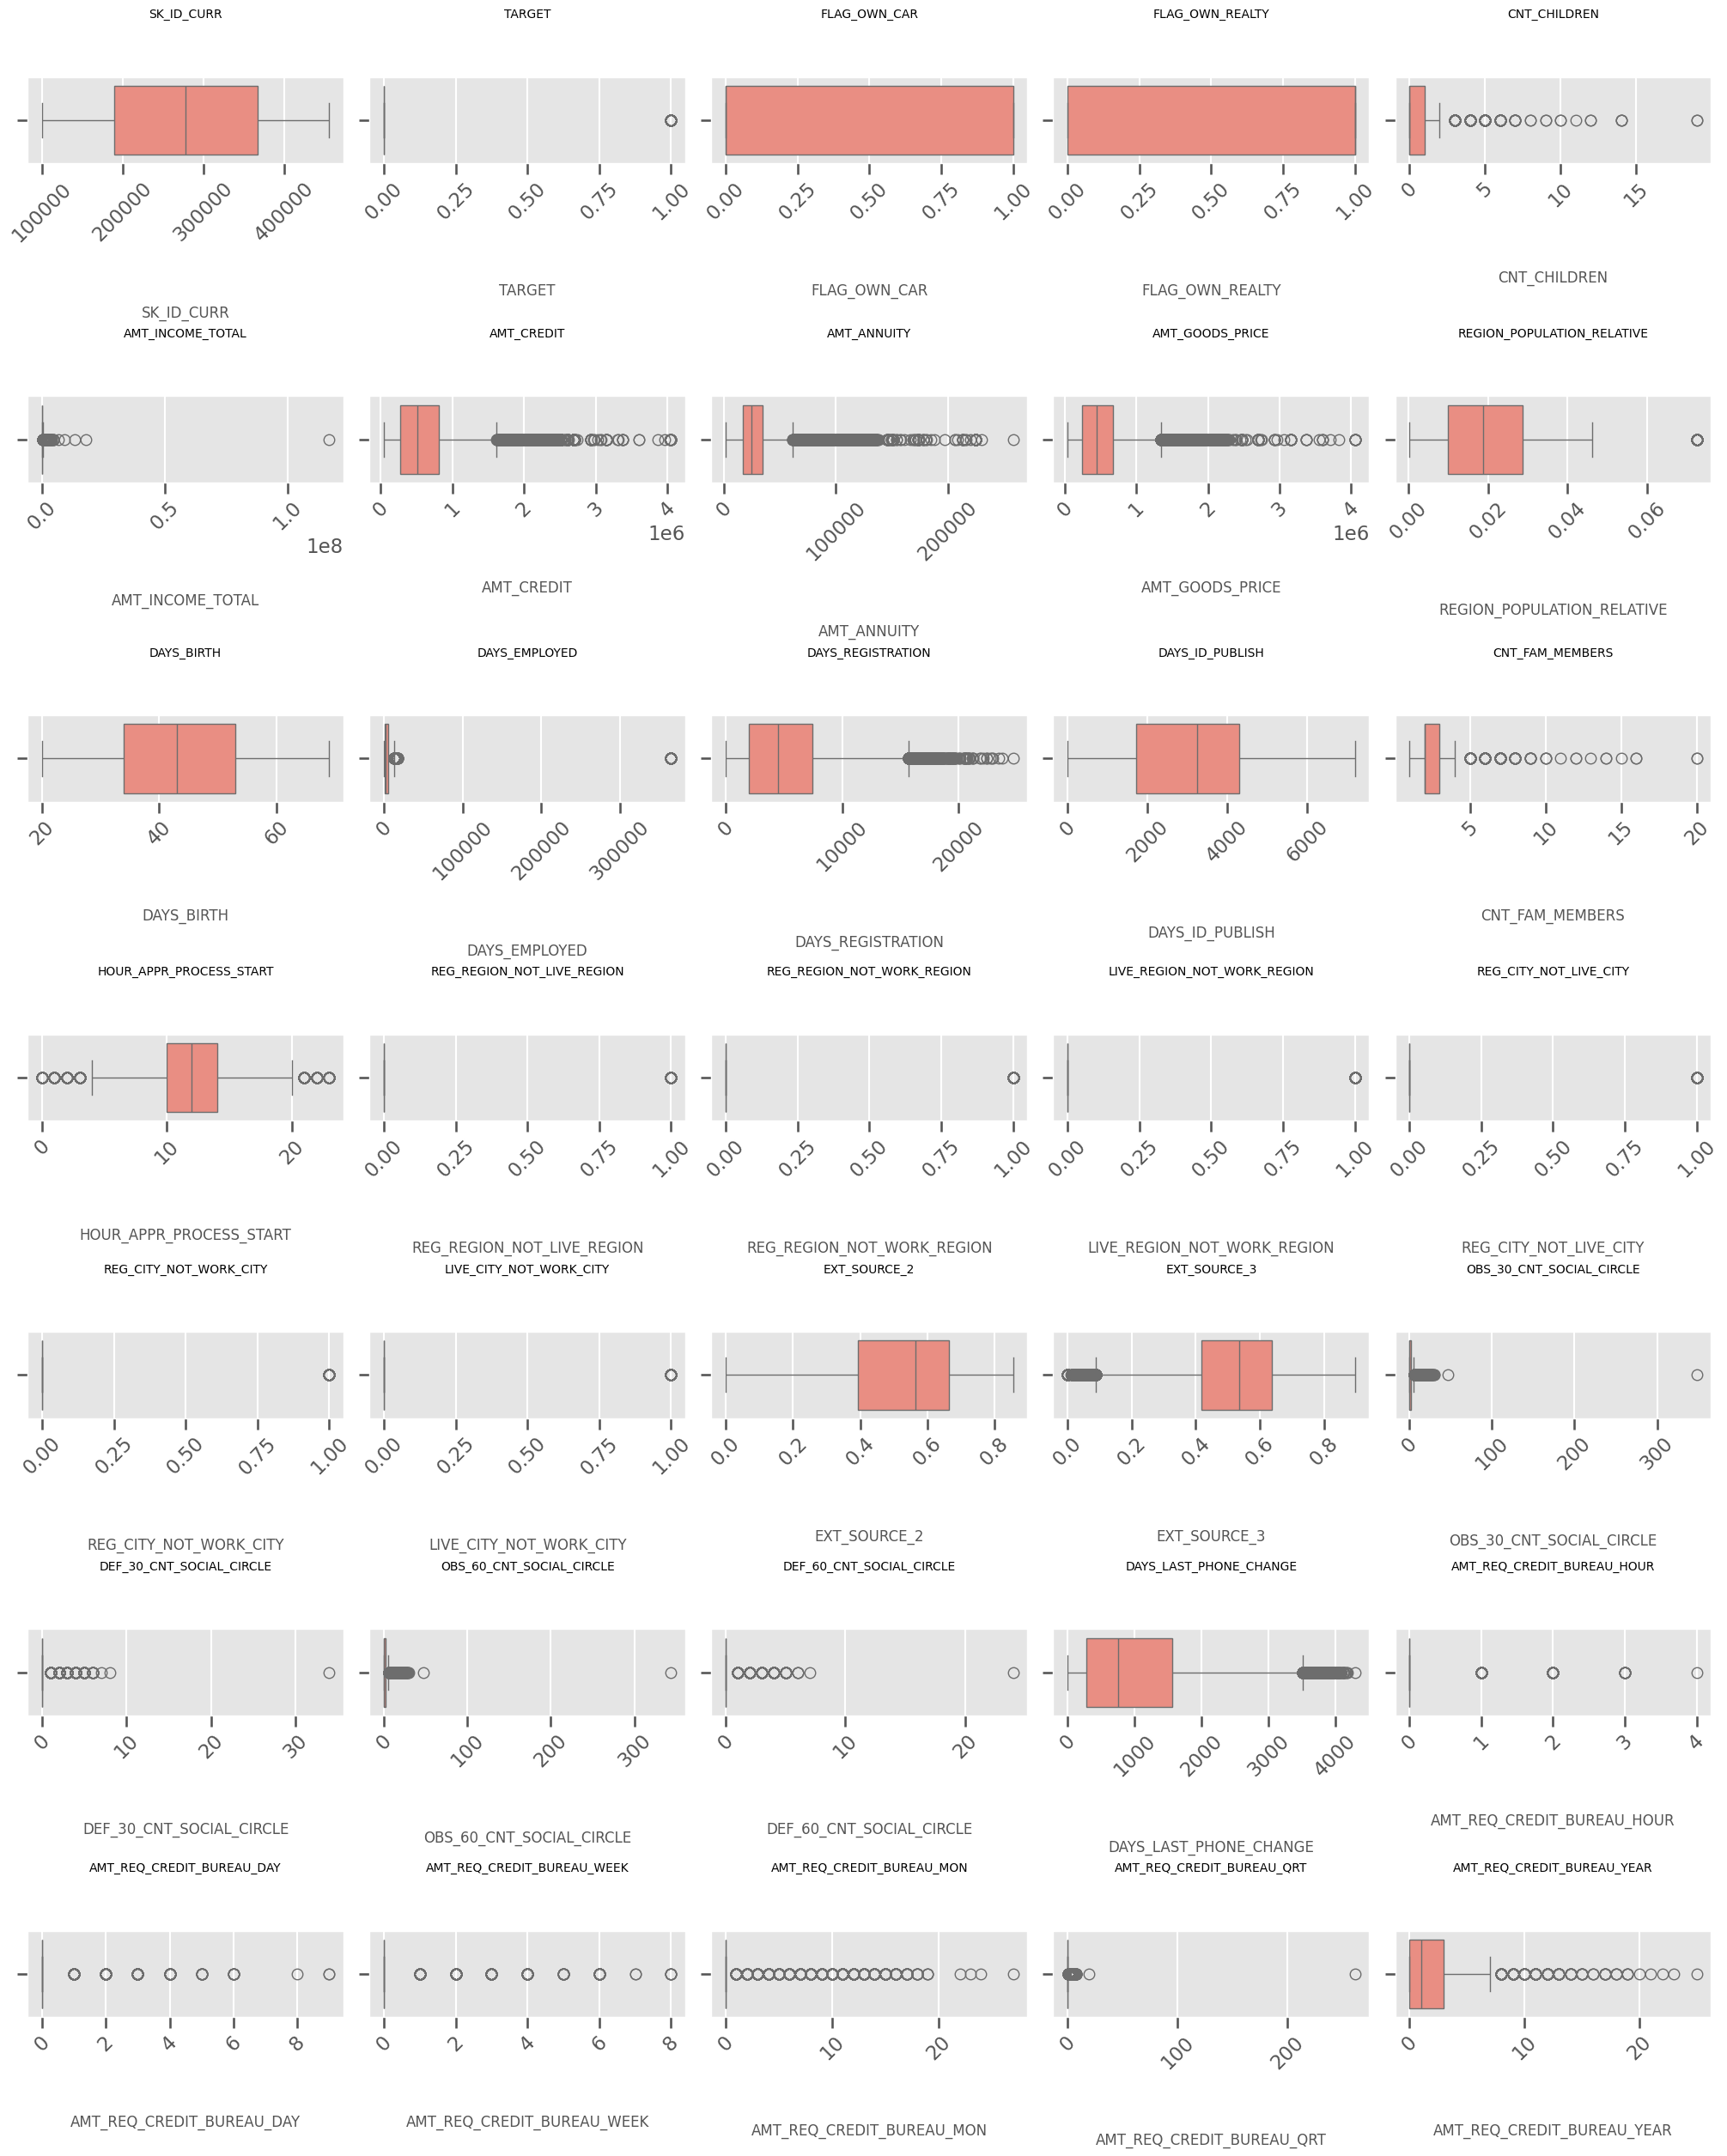

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar tamaño total de la figura
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 25), constrained_layout=True)

# Ajustar márgenes y espaciado interno
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.5)

# Dibujar boxplots y mejorar visibilidad
for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(data=df1, x=column, ax=ax, color='salmon')
    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas si fueran categóricas

# Mostrar la figura
plt.show()


## Análisis:

- **`CNT_CHILDREN`** presenta valores atípicos, con clientes que tienen más de 5 hijos.
- El rango intercuartílico (IQR) de **`AMT_INCOME_TOTAL`** es muy estrecho y contiene una gran cantidad de valores atípicos.
- El tercer cuartil de **`AMT_CREDIT`** es considerablemente mayor que el primero, lo que indica que la mayoría de los **montos de crédito de los préstamos** de los clientes se encuentran en el tercer cuartil. También hay una gran cantidad de valores atípicos en esta variable.
- El tercer cuartil de **`AMT_ANNUITY`** es ligeramente mayor que el primero, y también contiene muchos valores atípicos.
- El tercer cuartil de **`AMT_GOODS_PRICE`**, **`DAYS_REGISTRATION`** y **`DAYS_LAST_PHONE_CHANGE`** es mayor en comparación con el primer cuartil, y en todos los casos hay una gran cantidad de valores atípicos.
- El IQR de **`DAYS_EMPLOYED`** es muy estrecho. La mayoría de los valores atípicos se encuentran por debajo de 25,000 y existe un valor atípico extremo en 375,000.
- En el boxplot de **`CNT_FAM_MEMBERS`** se observa que la mayoría de los clientes tienen 4 miembros en su familia. Sin embargo, también hay valores atípicos.
- **`DAYS_BIRTH`**, **`DAYS_ID_PUBLISH`**, **`EXT_SOURCE_2`** y **`EXT_SOURCE_3`** no presentan valores atípicos.
- Los boxplots de **`DAYS_EMPLOYED`**, **`OBS_30_CNT_SOCIAL_CIRCLE`**, **`DEF_30_CNT_SOCIAL_CIRCLE`**, **`OBS_60_CNT_SOCIAL_CIRCLE`**, **`DEF_60_CNT_SOCIAL_CIRCLE`**, **`AMT_REQ_CREDIT_BUREAU_HOUR`**, **`AMT_REQ_CREDIT_BUREAU_DAY`**, **`AMT_REQ_CREDIT_BUREAU_WEEK`**, **`AMT_REQ_CREDIT_BUREAU_MON`**, **`AMT_REQ_CREDIT_BUREAU_QRT`** y **`AMT_REQ_CREDIT_BUREAU_YEAR`** son muy estrechos y contienen muchos valores atípicos.
- **`FLAG_OWN_CAR`**: No presenta primer ni tercer cuartil, y los valores están dentro del IQR, por lo que se puede concluir que la mayoría de los clientes **poseen un automóvil**.
- **`FLAG_OWN_REALTY`**: Tampoco presenta primer ni tercer cuartil, y sus valores están dentro del IQR, lo cual indica que la mayoría de los clientes **poseen una casa o apartamento**.


# 4. Verificación del desequilibrio de datos en la variable objetivo

## 4.1 Dividiendo el dataframe

In [174]:
Target0 = df1.loc[df1["TARGET"]==0]
Target1 = df1.loc[df1["TARGET"]==1]

**4.1.1 Calculando porcentaje de desequilibrio**

In [175]:
round(len(Target0)/len(Target1),2)

11.39

**4.2.2 PIE CHART**

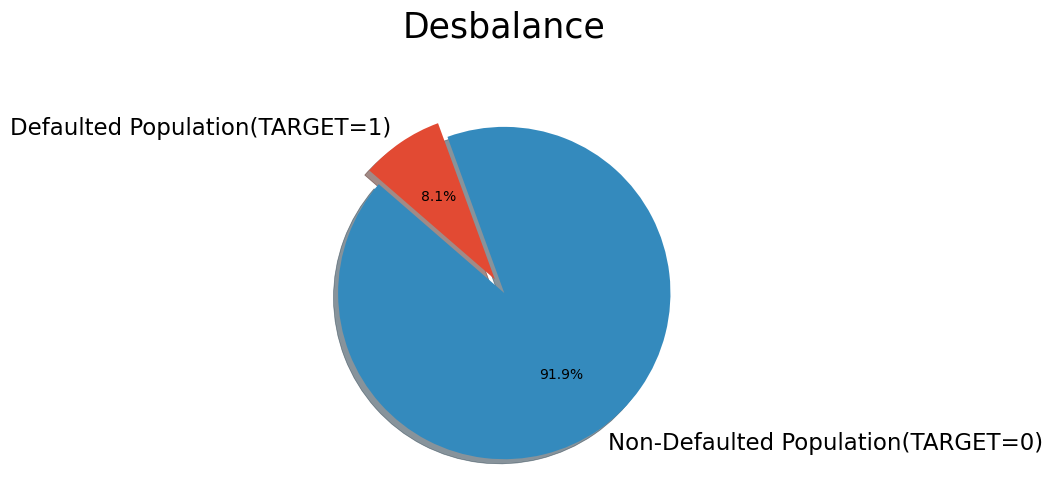

In [179]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defaulted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('Desbalance',fontsize=25)
plt.show()

## Análisis:

- El DataFrame `df1`, que contiene los datos de las solicitudes, presenta un alto desequilibrio. **La población que incumplió con el pago representa el 8.1% y la población que no incumplió representa el 91.9%**. La proporción es de **`11.3`**.

# 5. Análisis univariado de columnas categóricas con respecto a la variable objetivo

## 5.1 Distribución de género según Target 0 y Target 1

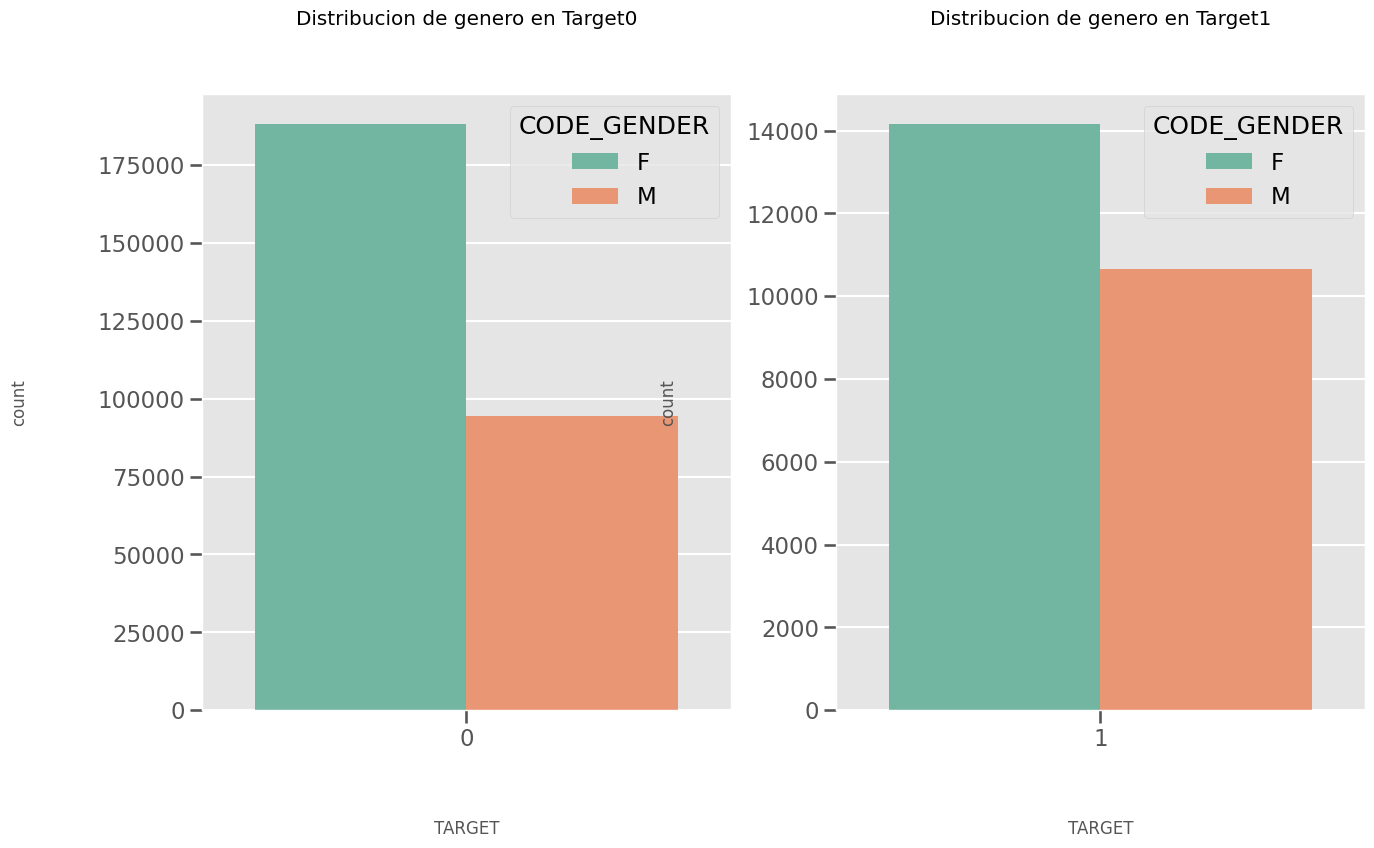

In [180]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Distribucion de genero en Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Distribucion de genero en Target1")

plt.show()

## Análisis:

- Hay más mujeres que hombres en ambos grupos (no morosos y morosos).

### En el grupo no moroso (TARGET = 0):

- Las mujeres representan la mayoría, con más de 180,000 registros.
- Los hombres están cerca de 90,000.
- Esto muestra que hay más mujeres que pagaron sus préstamos.

### En el grupo moroso (TARGET = 1):

- Hay más mujeres que hombres también, pero la diferencia es menor.
- Mujeres: ~14,000 / Hombres: ~11,000
- Esto sugiere que, aunque las mujeres también incumplen, la proporción es más equilibrada entre géneros en este grupo.


## 5.2 Distribución de la edad

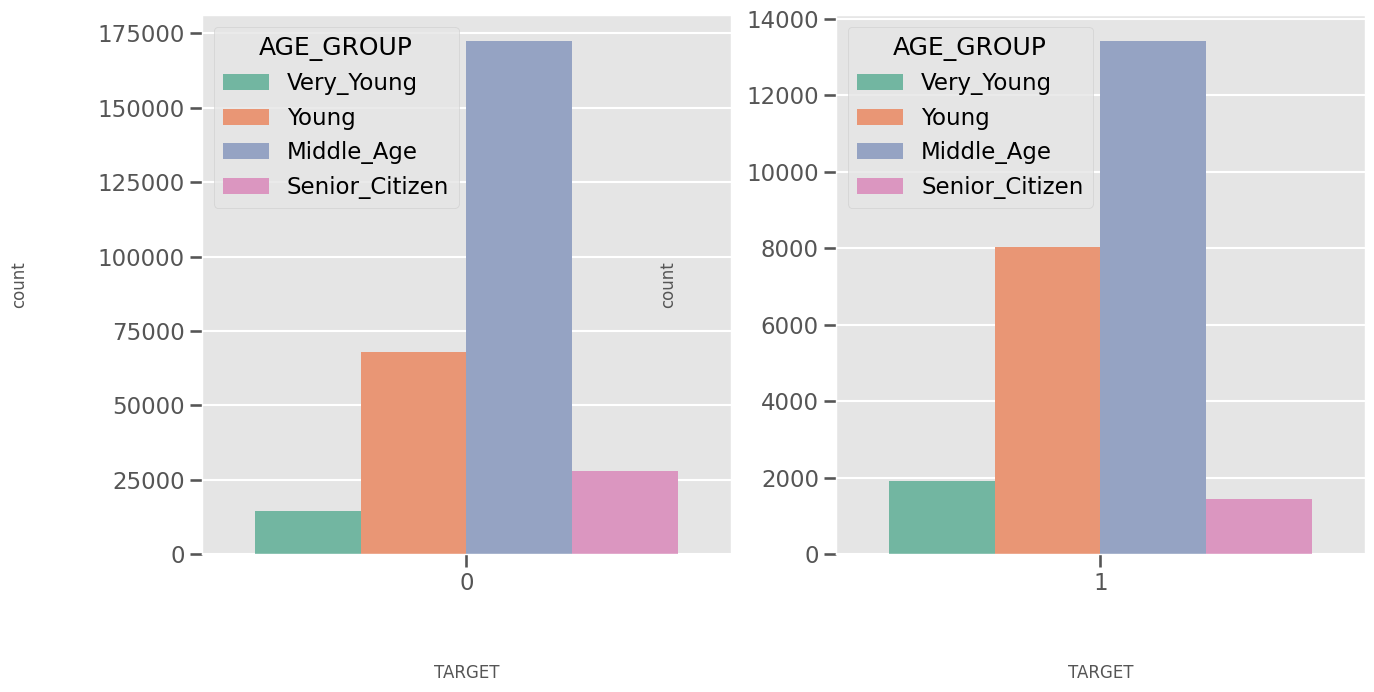

In [181]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

## Análisis:

- El grupo de **edad media (35-60 años)** parece haber solicitado más préstamos que cualquier otro grupo etario, tanto en el caso de clientes morosos como no morosos.

- Además, el grupo de **edad media** es el que enfrenta mayores dificultades para pagar.

- Por otro lado, los **adultos mayores (60-100 años)** y los **muy jóvenes (19-25 años)** presentan menos dificultades de pago en comparación con los demás grupos de edad.

## 5.3  Distribución de la Organización basada en  Target 0 y Target 1

<Figure size 4000x500 with 0 Axes>

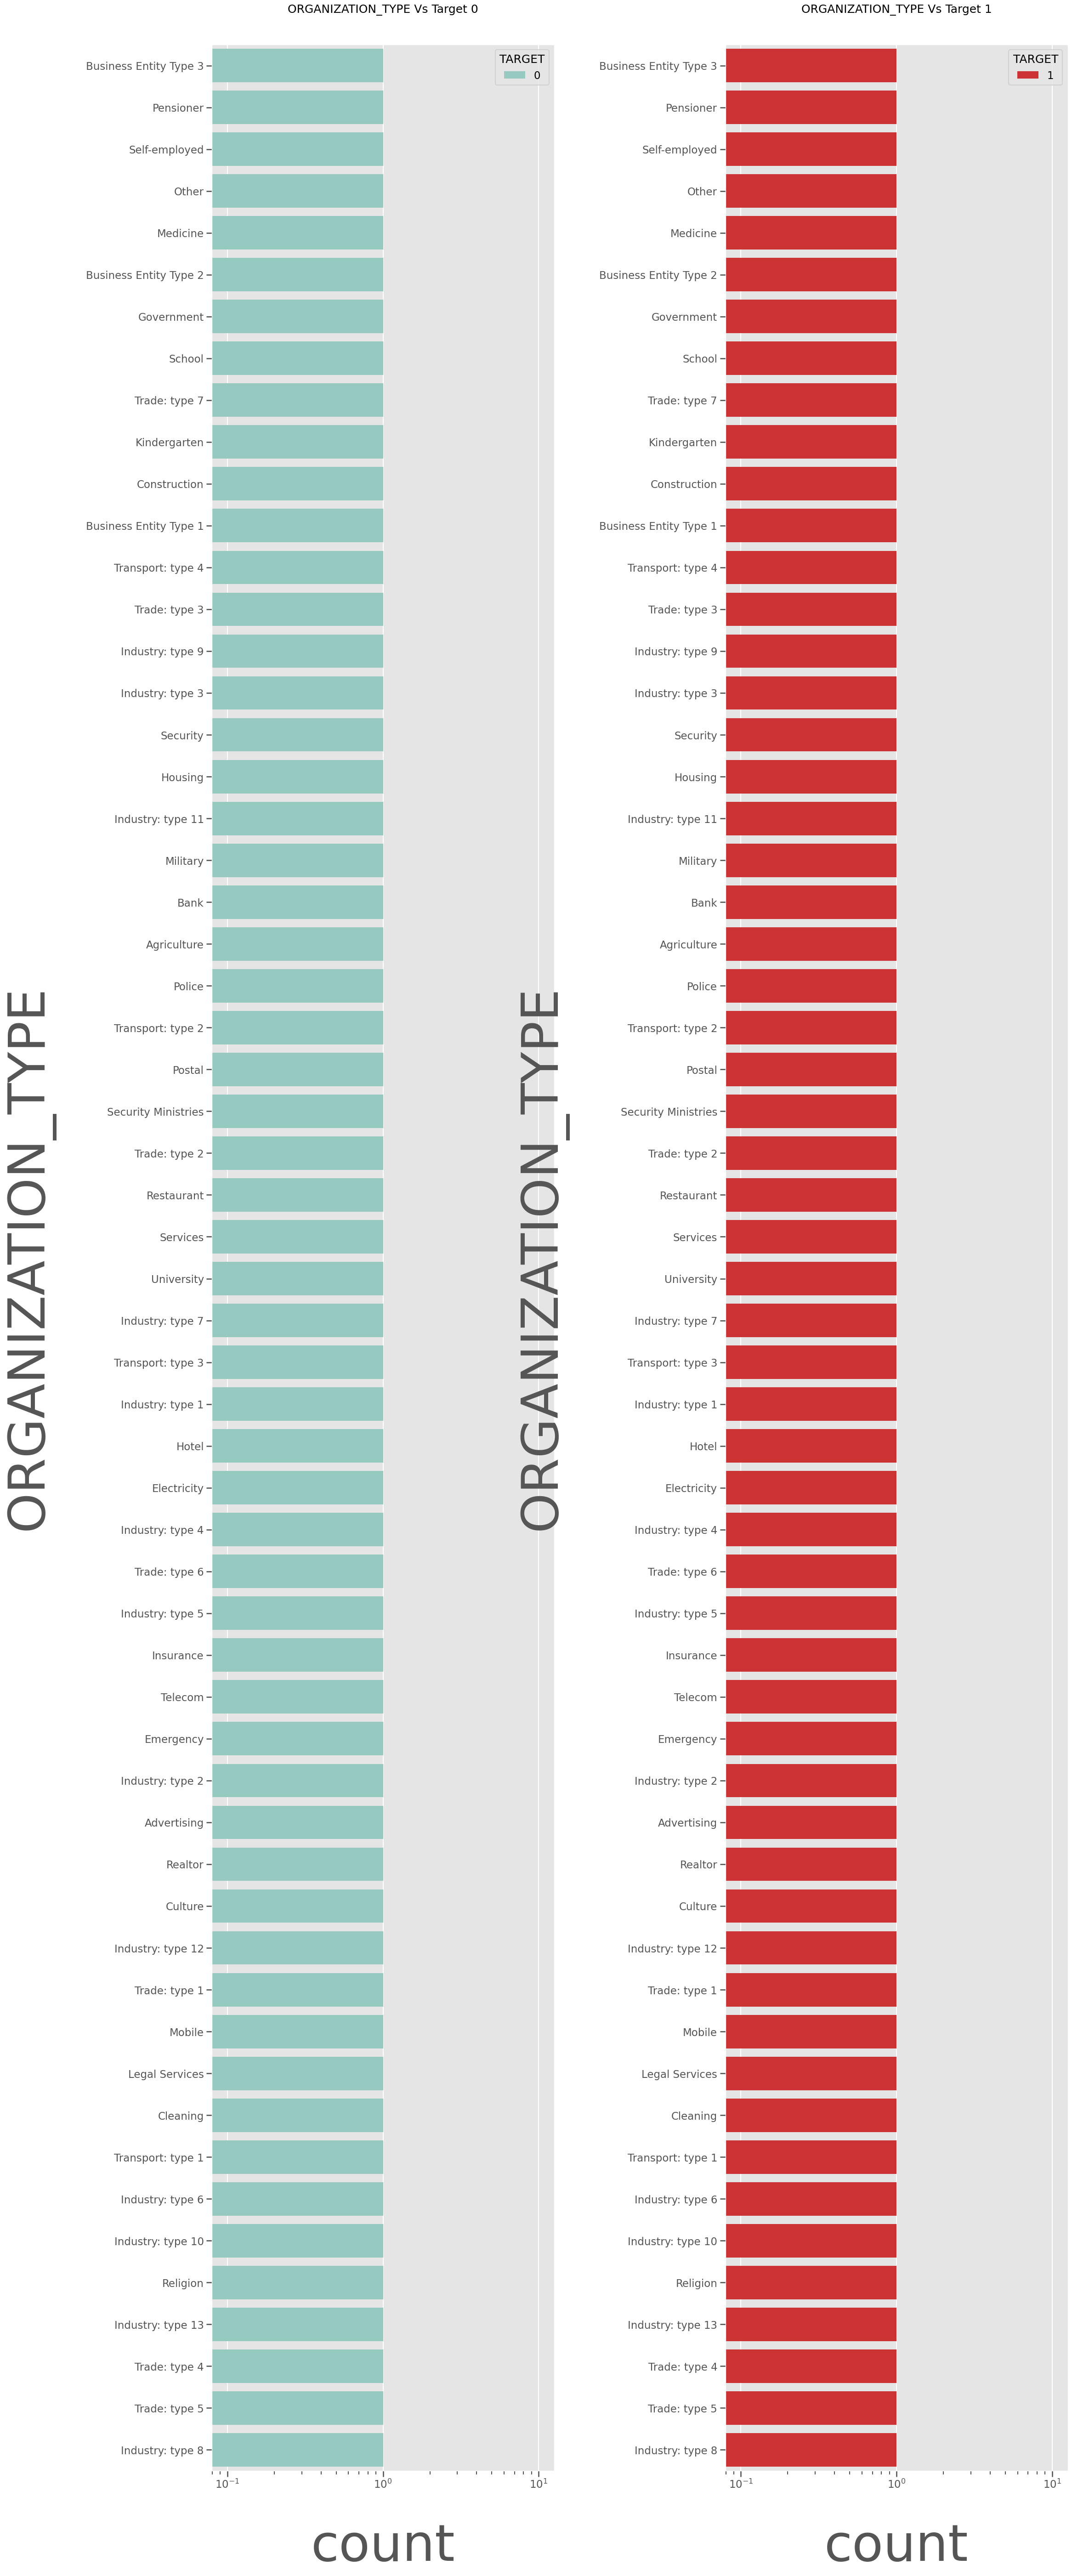

In [182]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                               
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                            
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

## Análisis:

- ___(Tanto clientes morosos como no morosos)___ con `ORGANIZATION_TYPE` **`Business Entity Type 3, Self-employed, Other, Medicine, Government, Business Entity Type 2`** solicitaron más préstamos en comparación con otros tipos de organización.

- ___(Tanto clientes morosos como no morosos)___ con `ORGANIZATION_TYPE` **`Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8`** solicitaron menos préstamos en comparación con otros tipos de organización.

## 5.4 De forma similar para las siguientes columnas categóricas

['NAME_CONTRACT_TYPE',  
 'NAME_TYPE_SUITE',  
 'NAME_INCOME_TYPE',  
 'NAME_EDUCATION_TYPE',  
 'NAME_FAMILY_STATUS',  
 'NAME_HOUSING_TYPE',  
 'OCCUPATION_TYPE',  
 'WEEKDAY_APPR_PROCESS_START',  
 'AMT_INCOME_TYPE',  
 'AMT_CREDIT_TYPE']

### Sería tedioso escribir código para cada una de ellas. Por lo tanto, se creará una función y un ___`bucle for`___ para graficar cada columna con títulos específicos.

### 5.4.1 Creación de la función

In [186]:
def categorical_plot(var):
    plt.figure(figsize=(40, 20))

    plt.rcParams['axes.labelpad'] = 50

    # Gráfico para TARGET = 0
    plt.subplot(1, 2, 1)
    sns.countplot(x=var, data=Target0, palette='Set3', hue='TARGET')
    plt.xlabel(var, fontsize=30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize=30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    # Gráfico para TARGET = 1
    plt.subplot(1, 2, 2)
    sns.countplot(x=var, data=Target1, palette='Set1', hue='TARGET')
    plt.xlabel(var, fontsize=30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize=30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show()


**5.4.2 Filtrando columnas de texto de df1**

In [184]:

categorical_col = list(df1.select_dtypes(include= 'category').columns) 


# Las siguientes columnas las removeremos pues ya hicimos un análisis 

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col 

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

**5.4.3 Usando un bucle for para mostrar la distribución de todas las columnas al mismo tiempo**

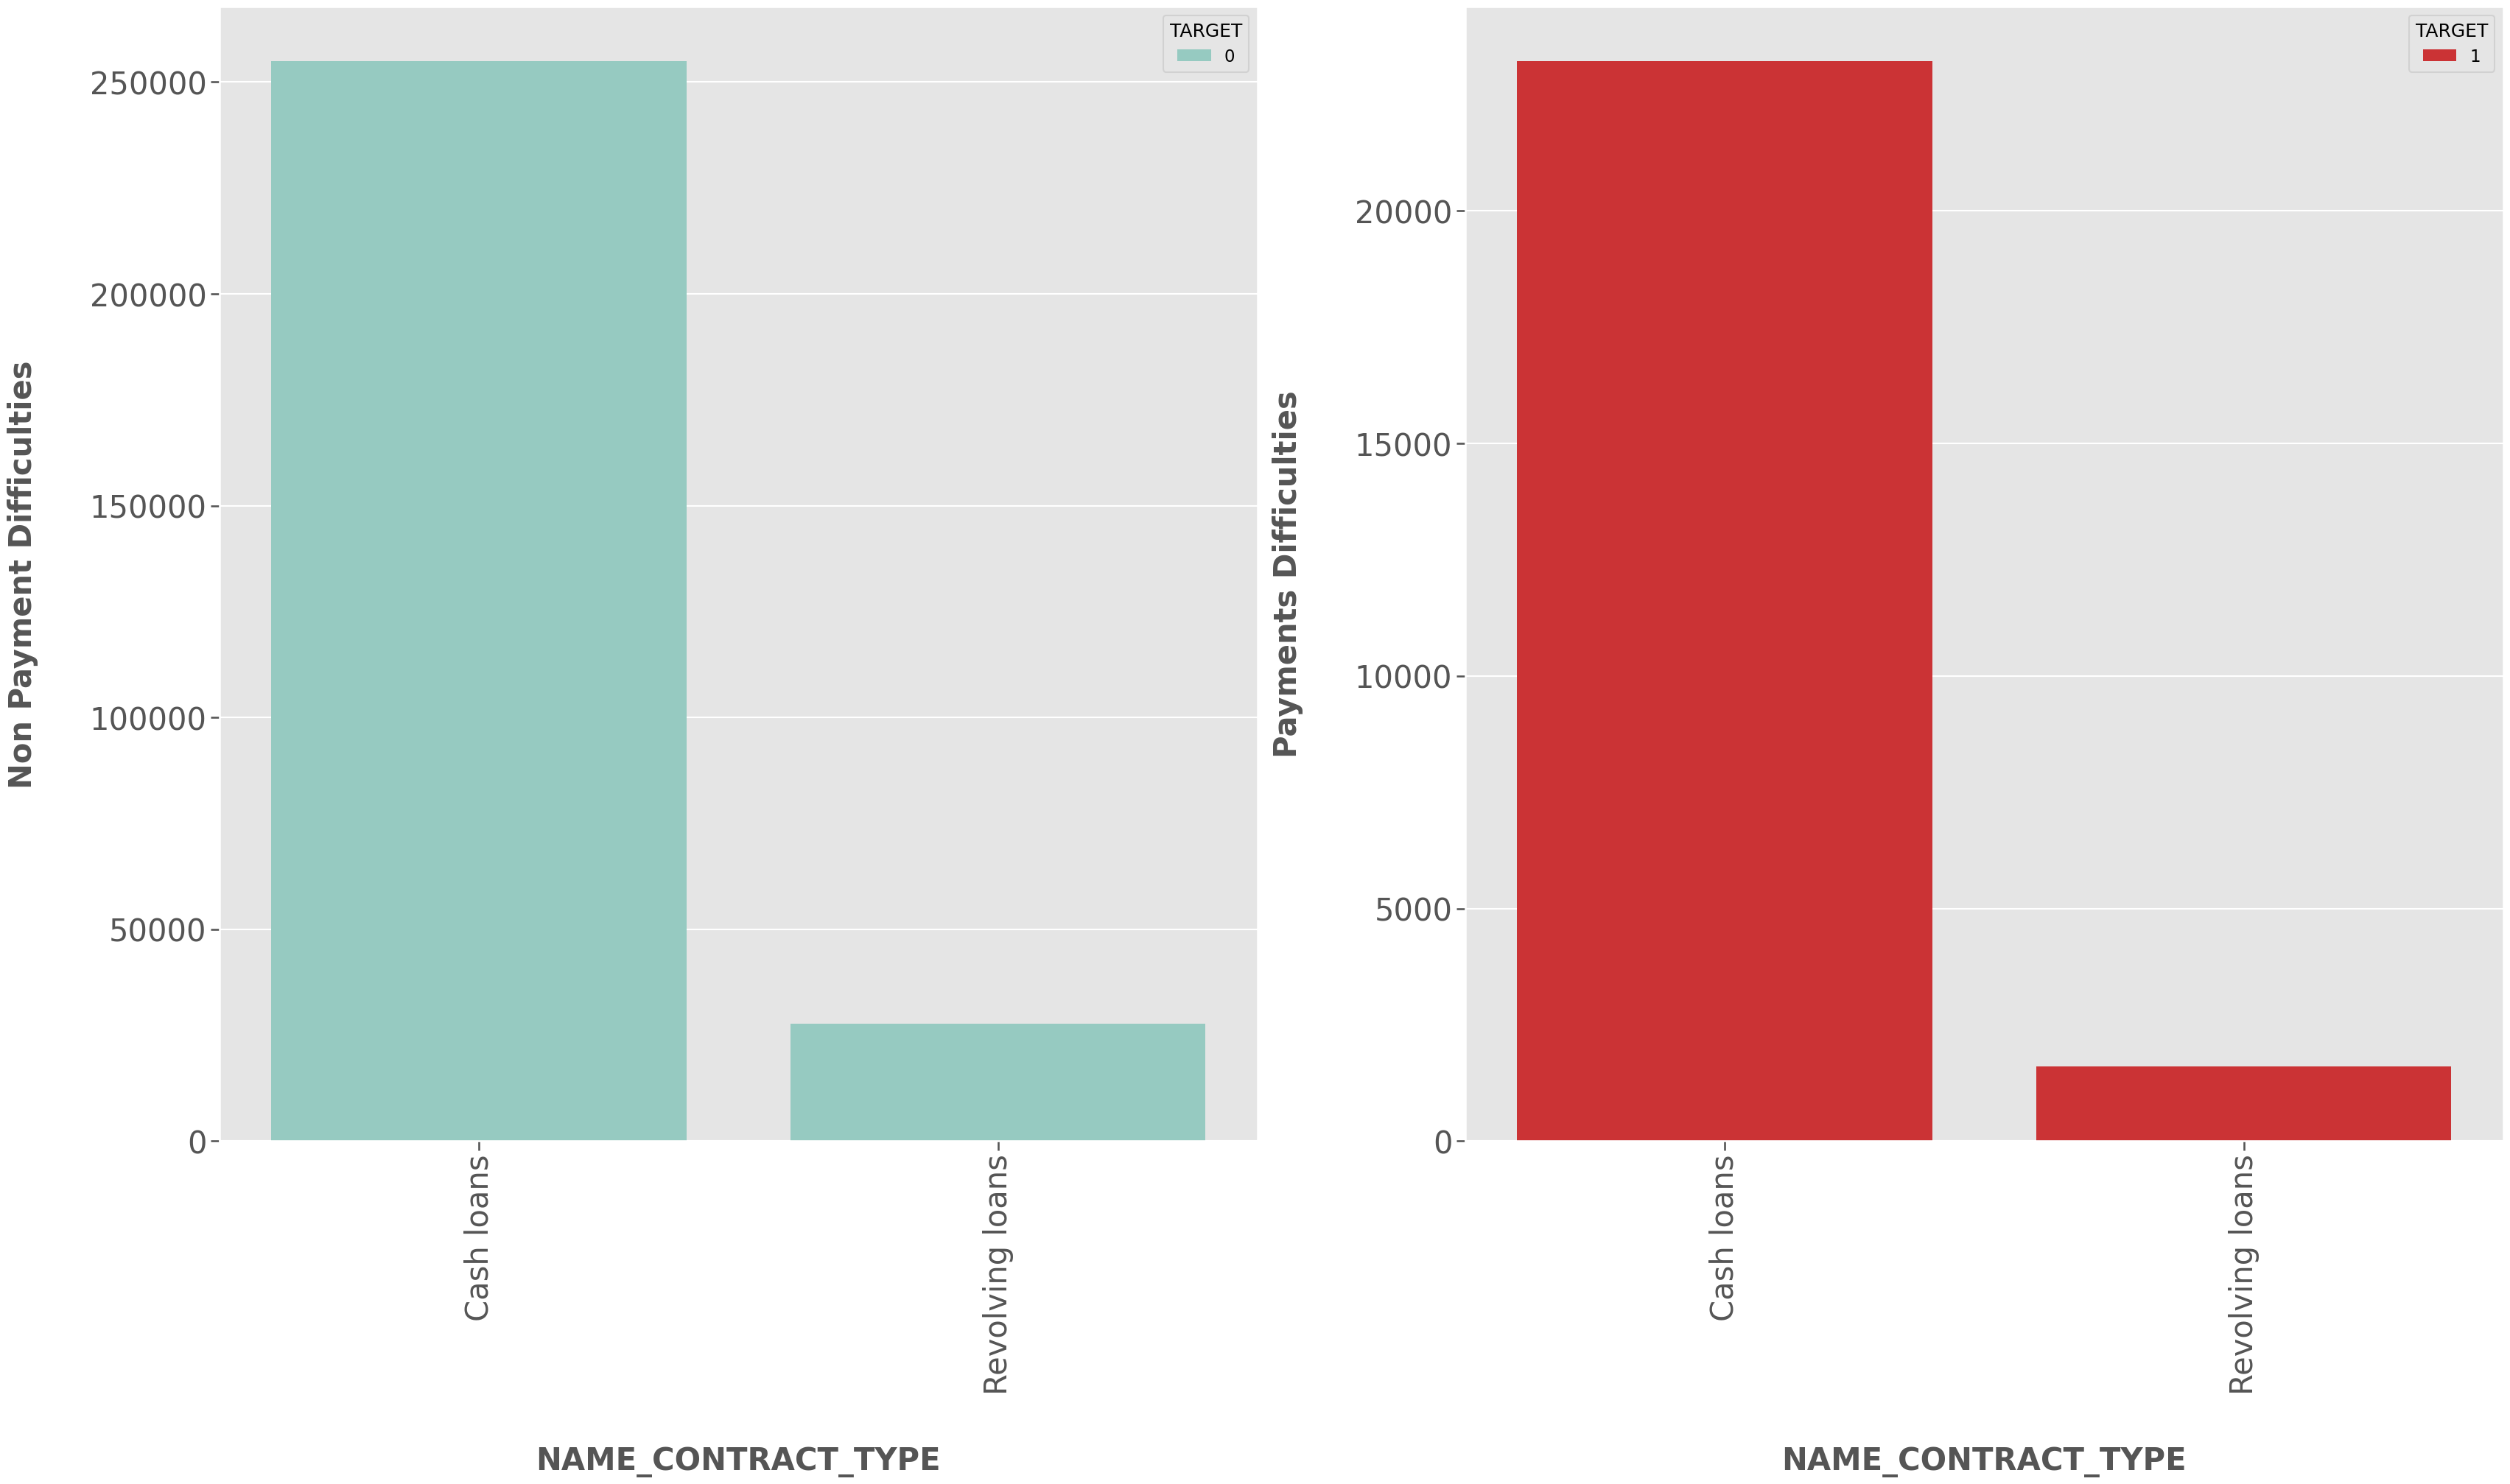

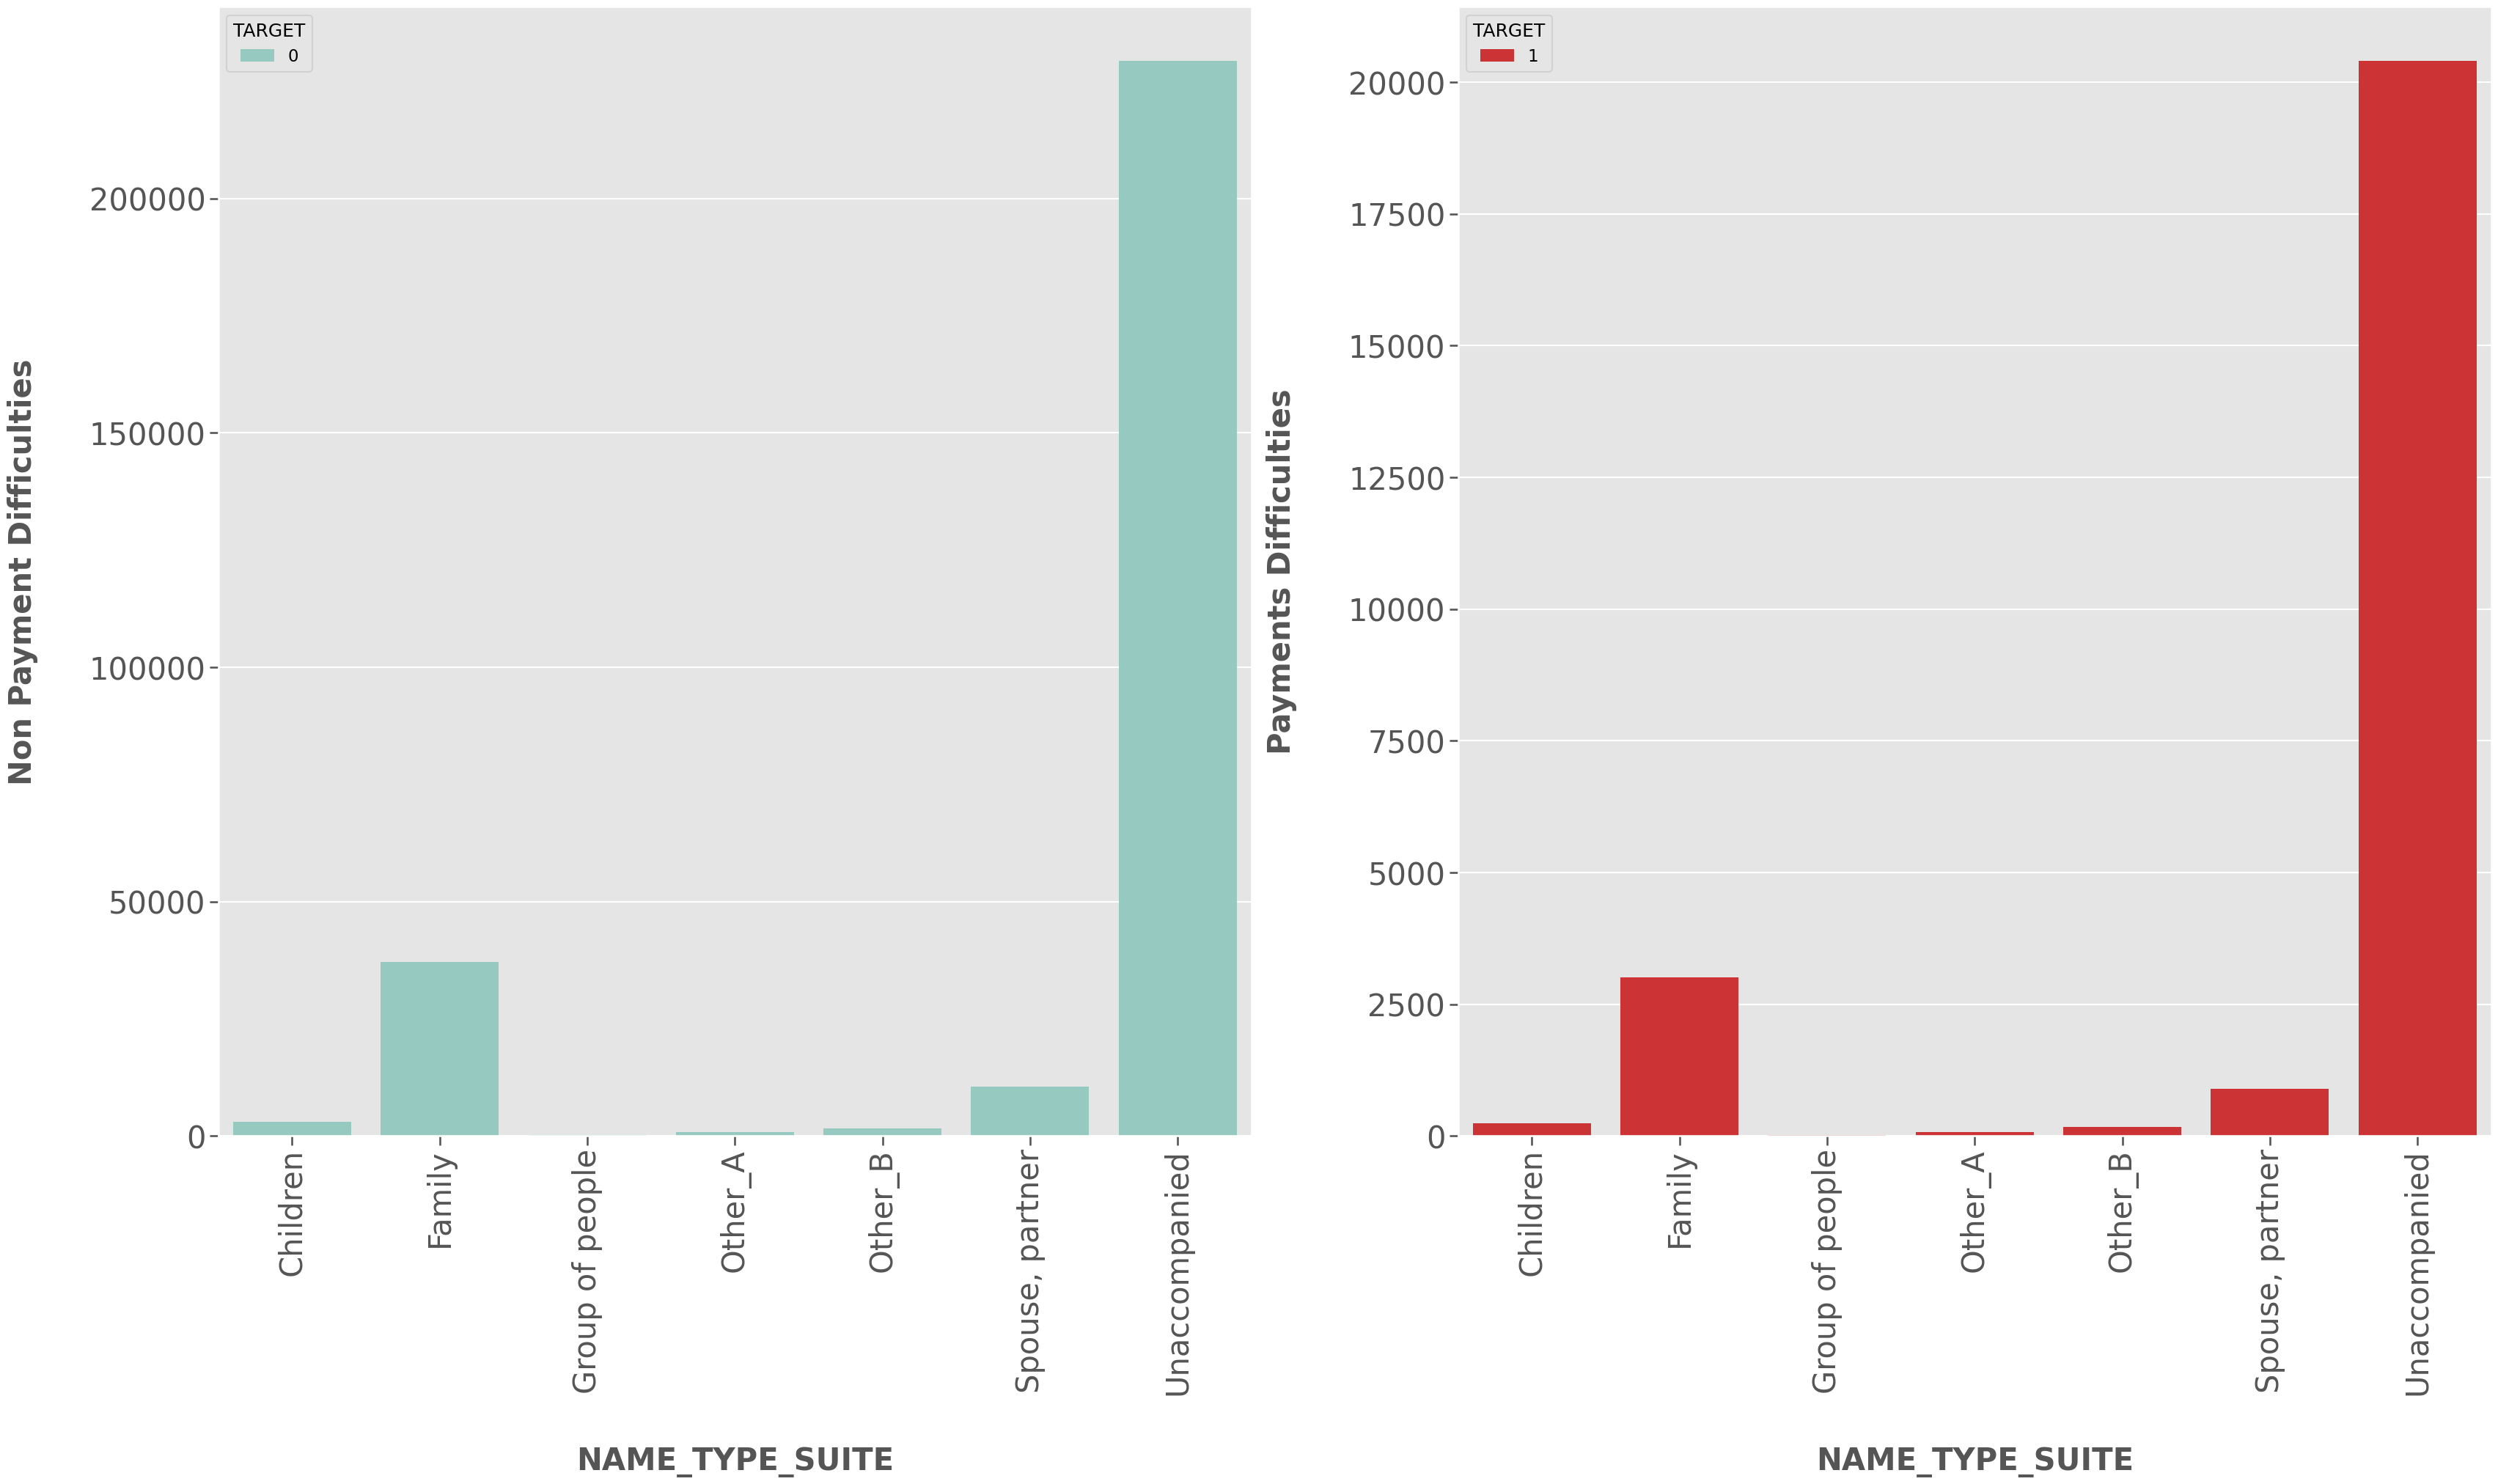

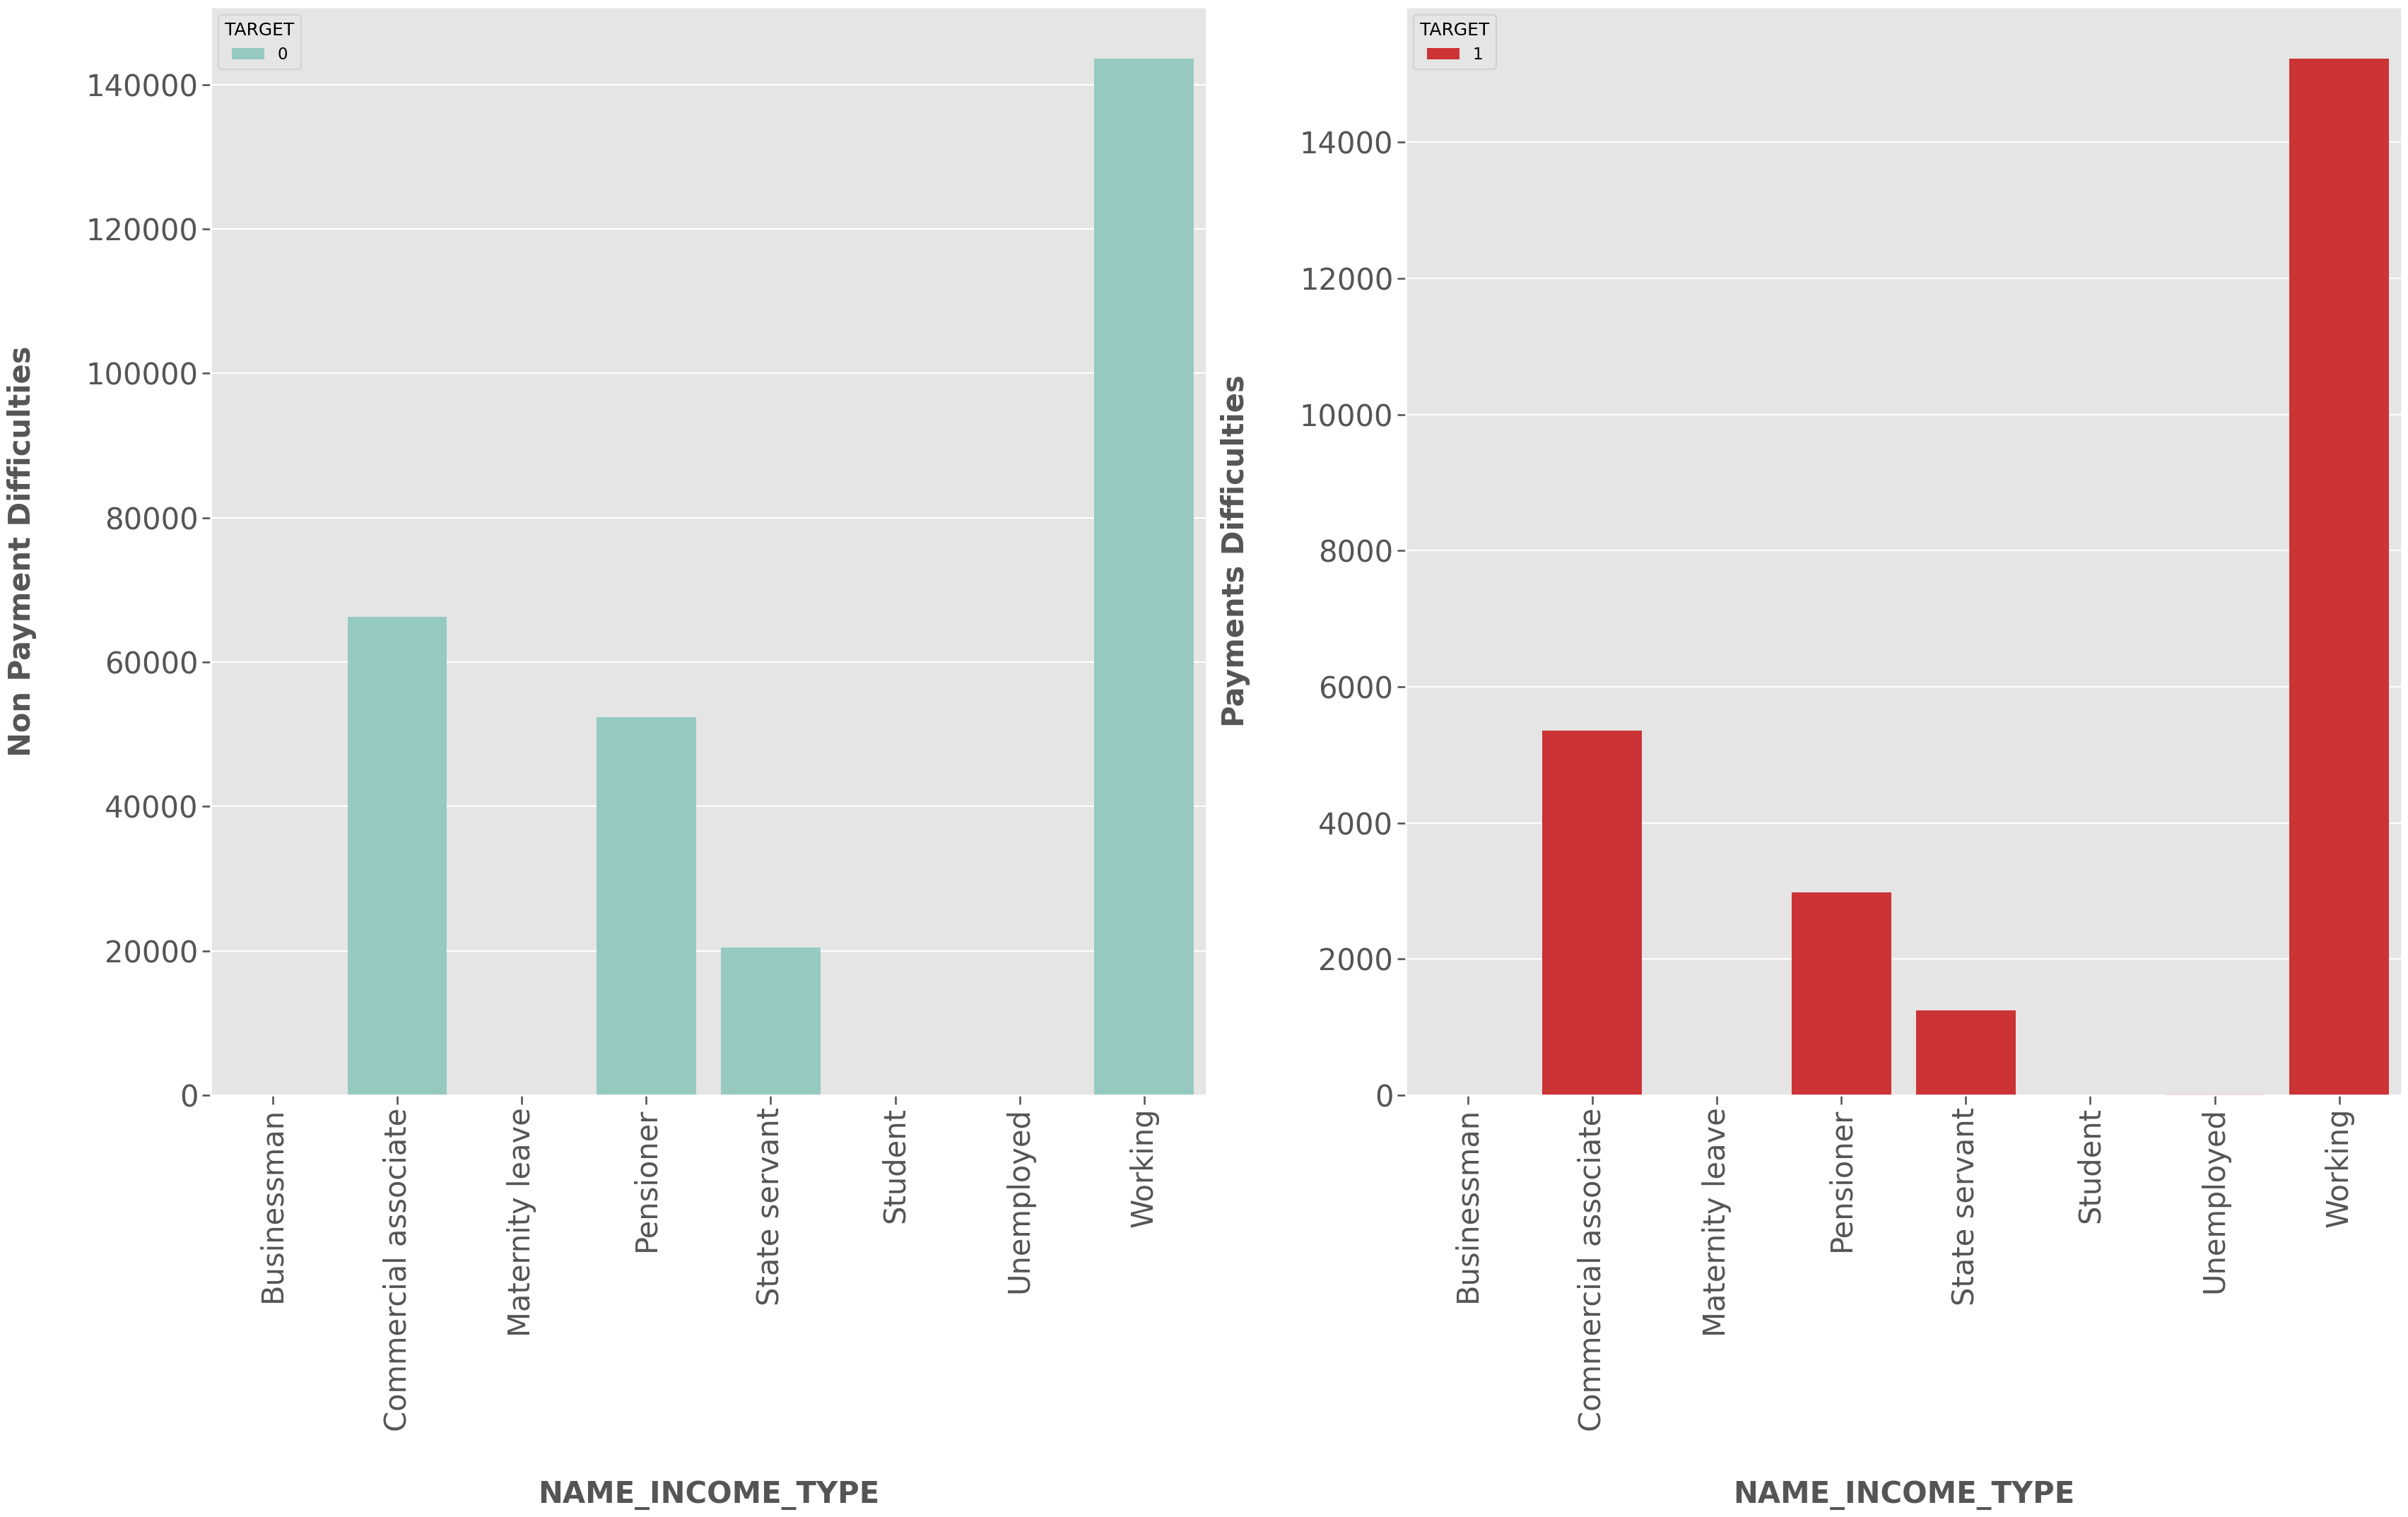

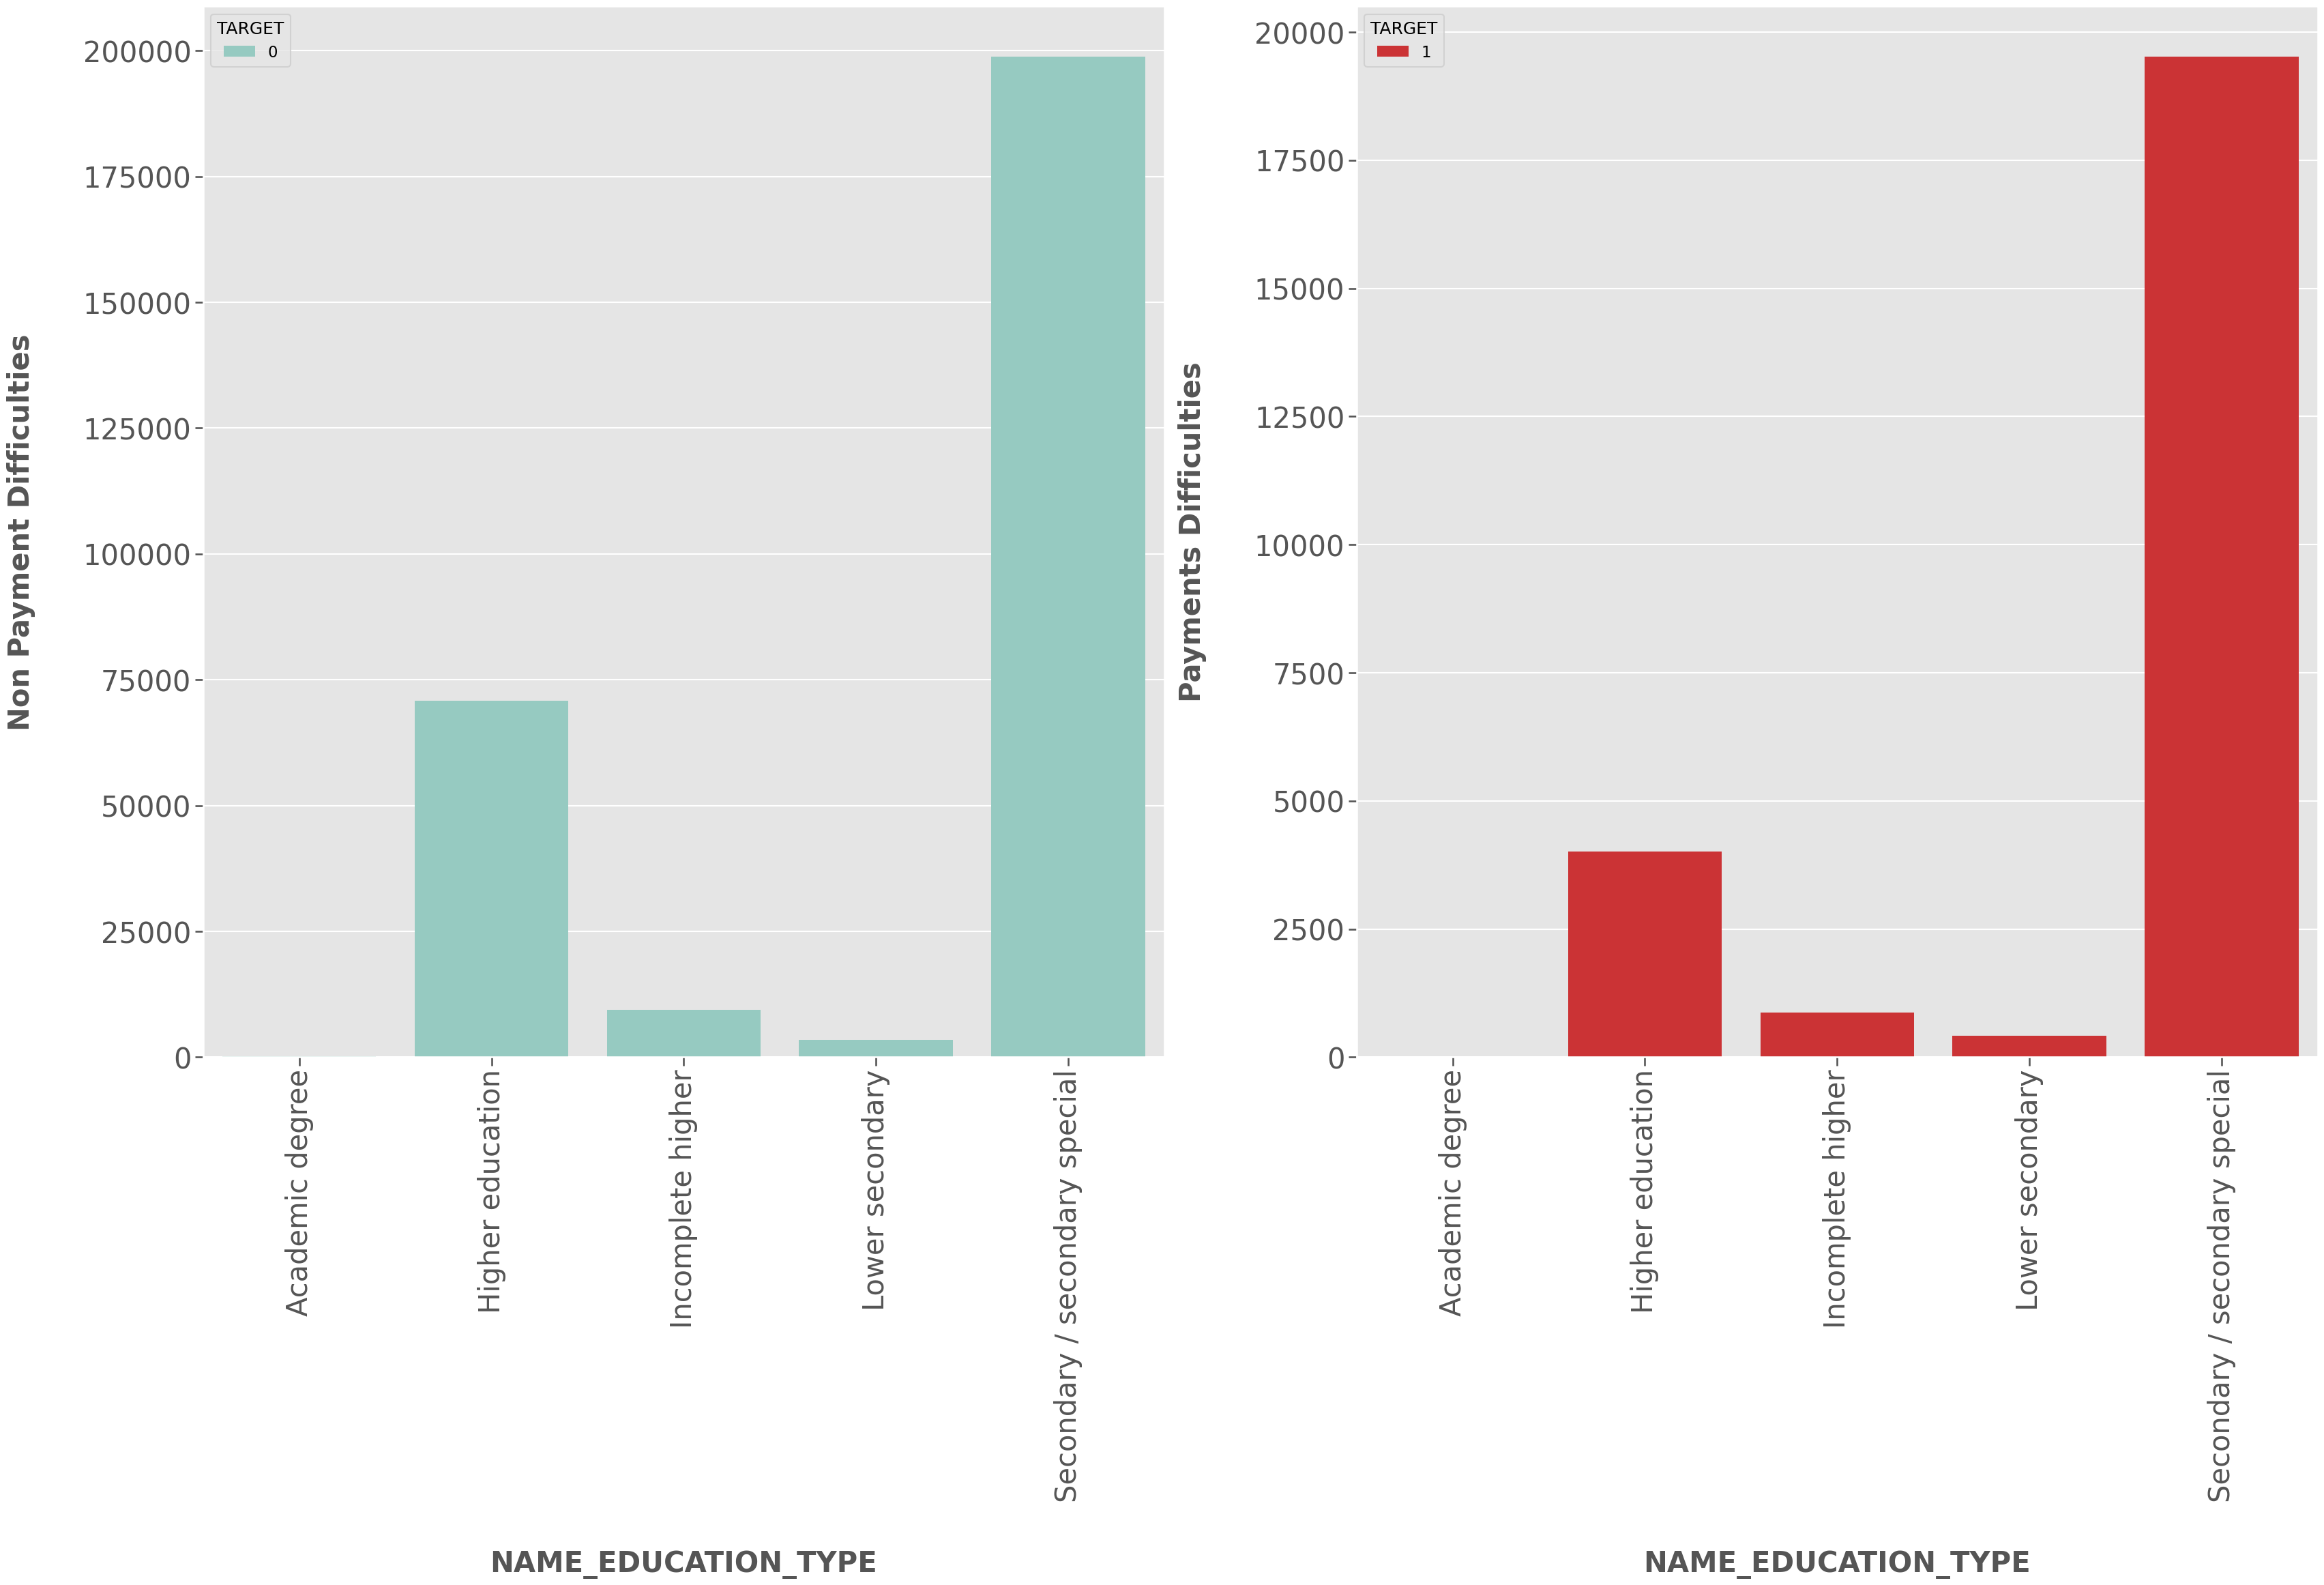

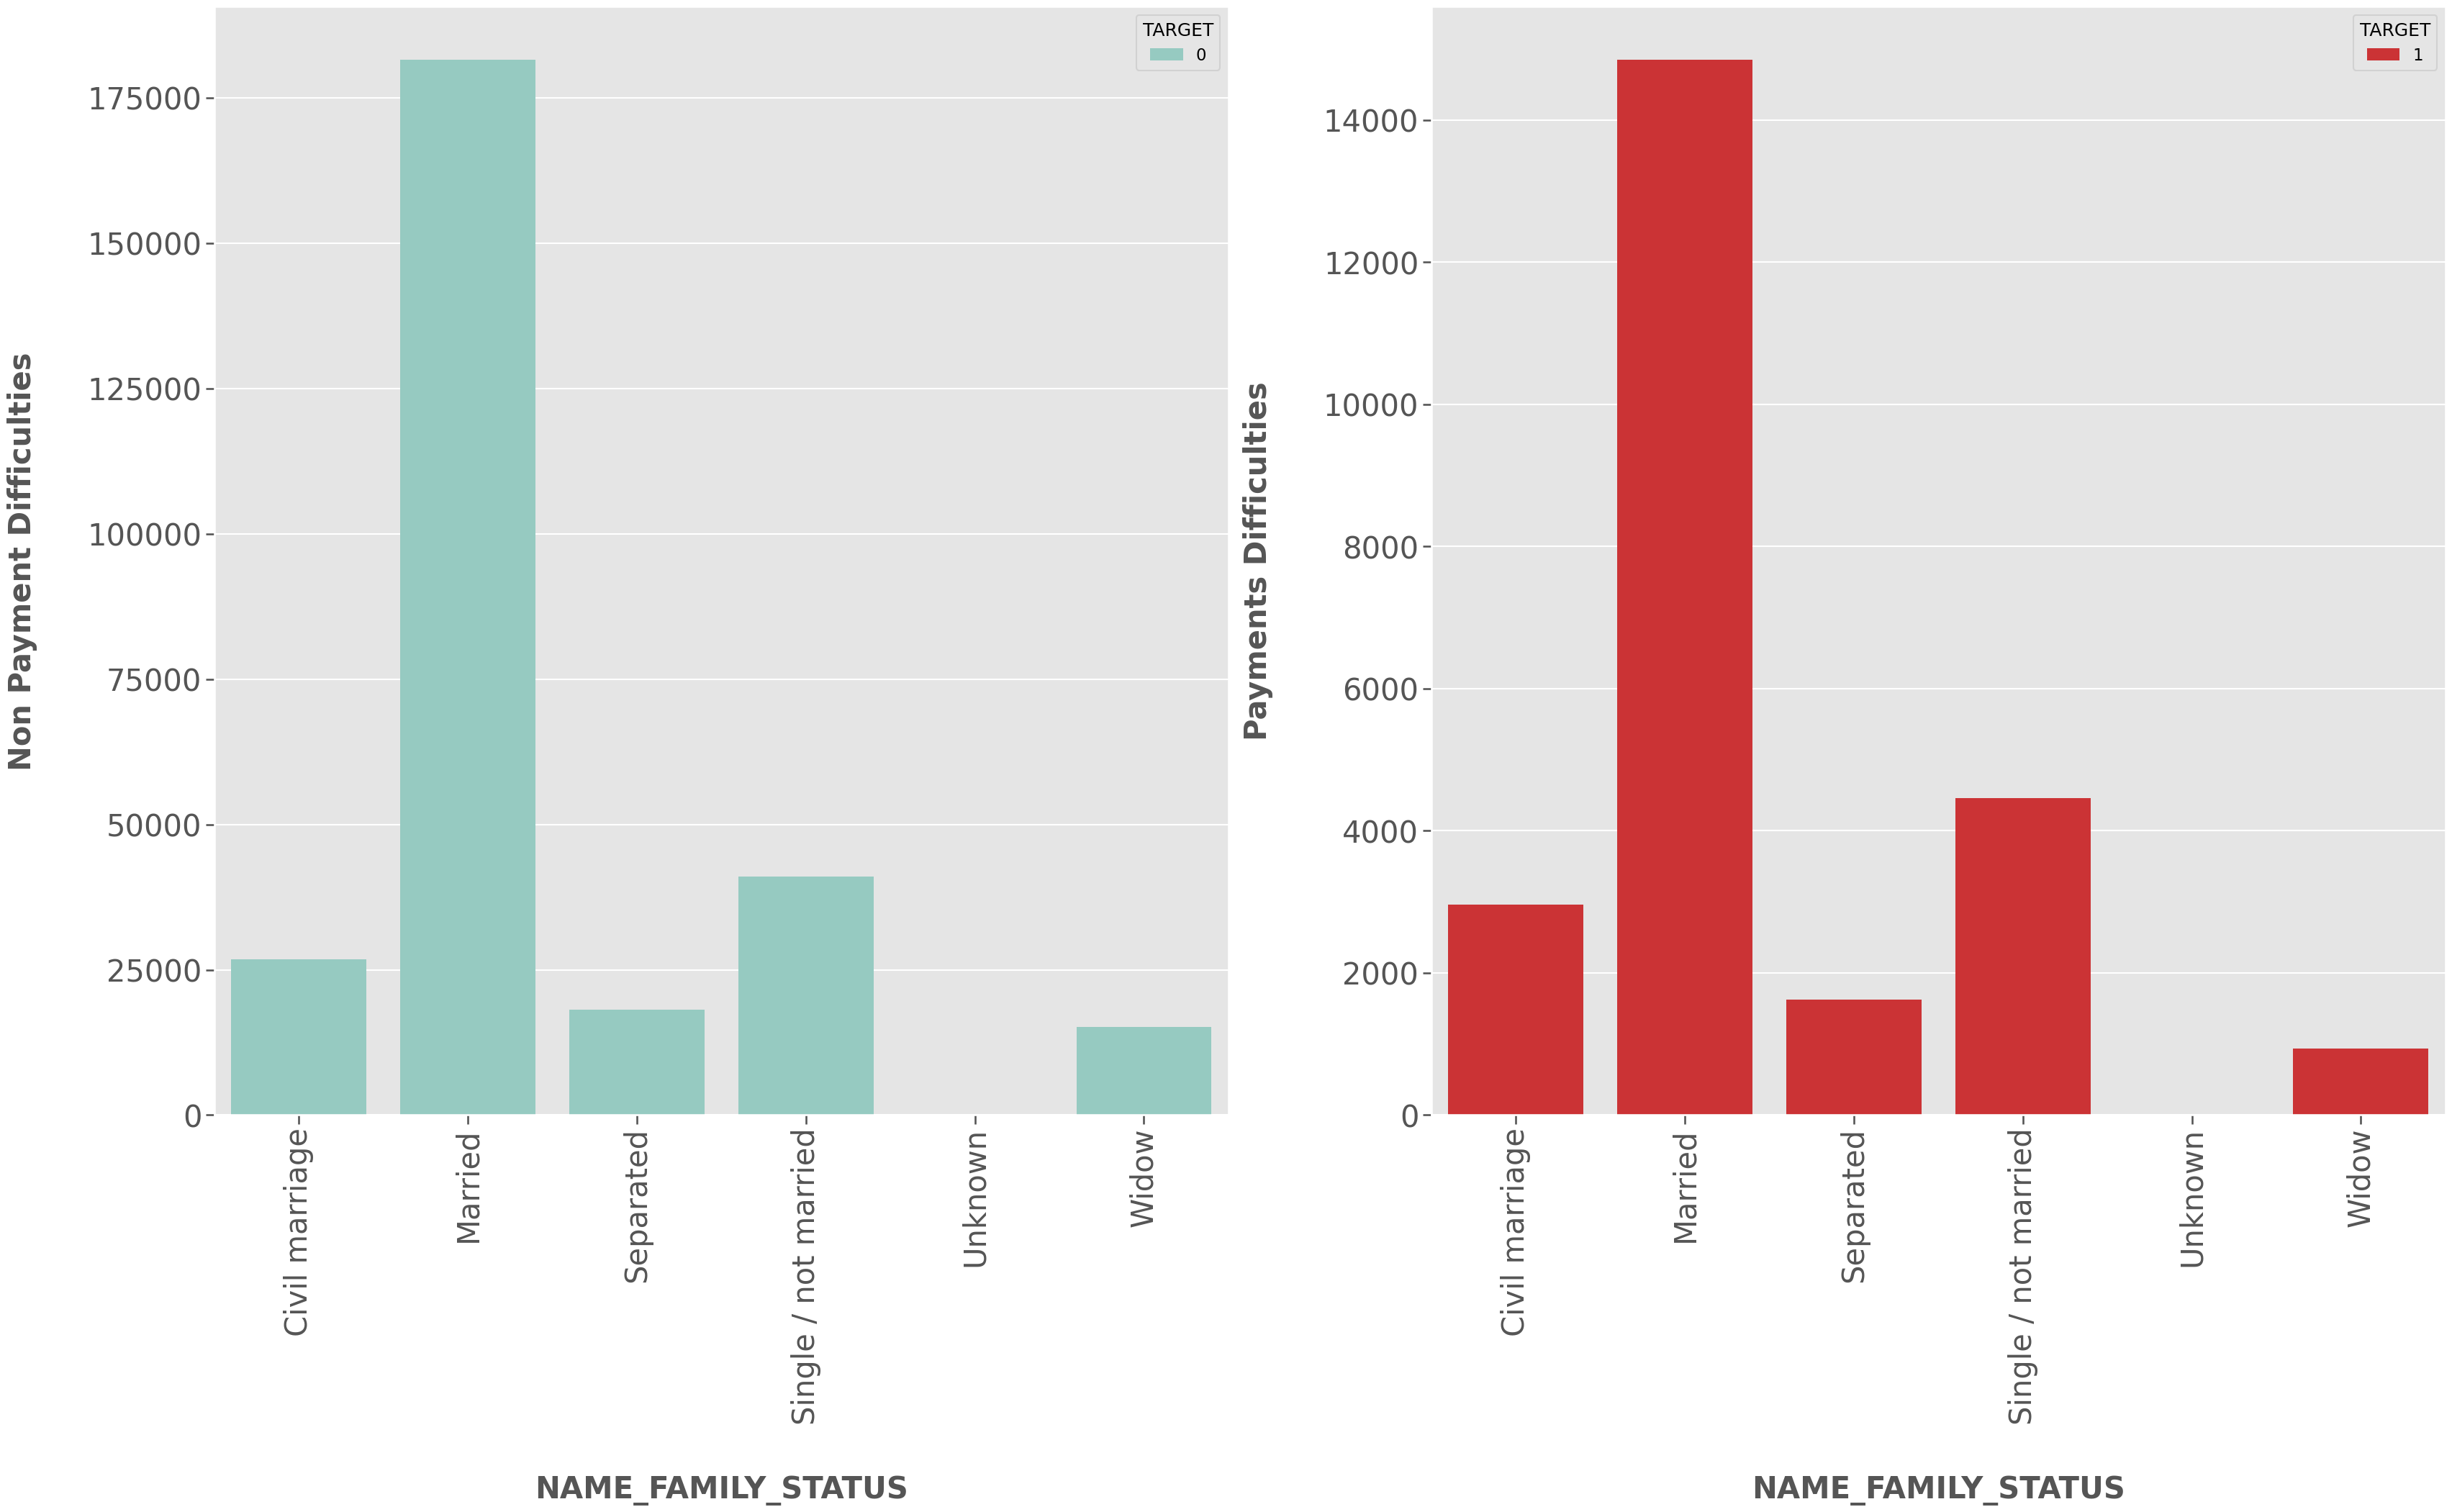

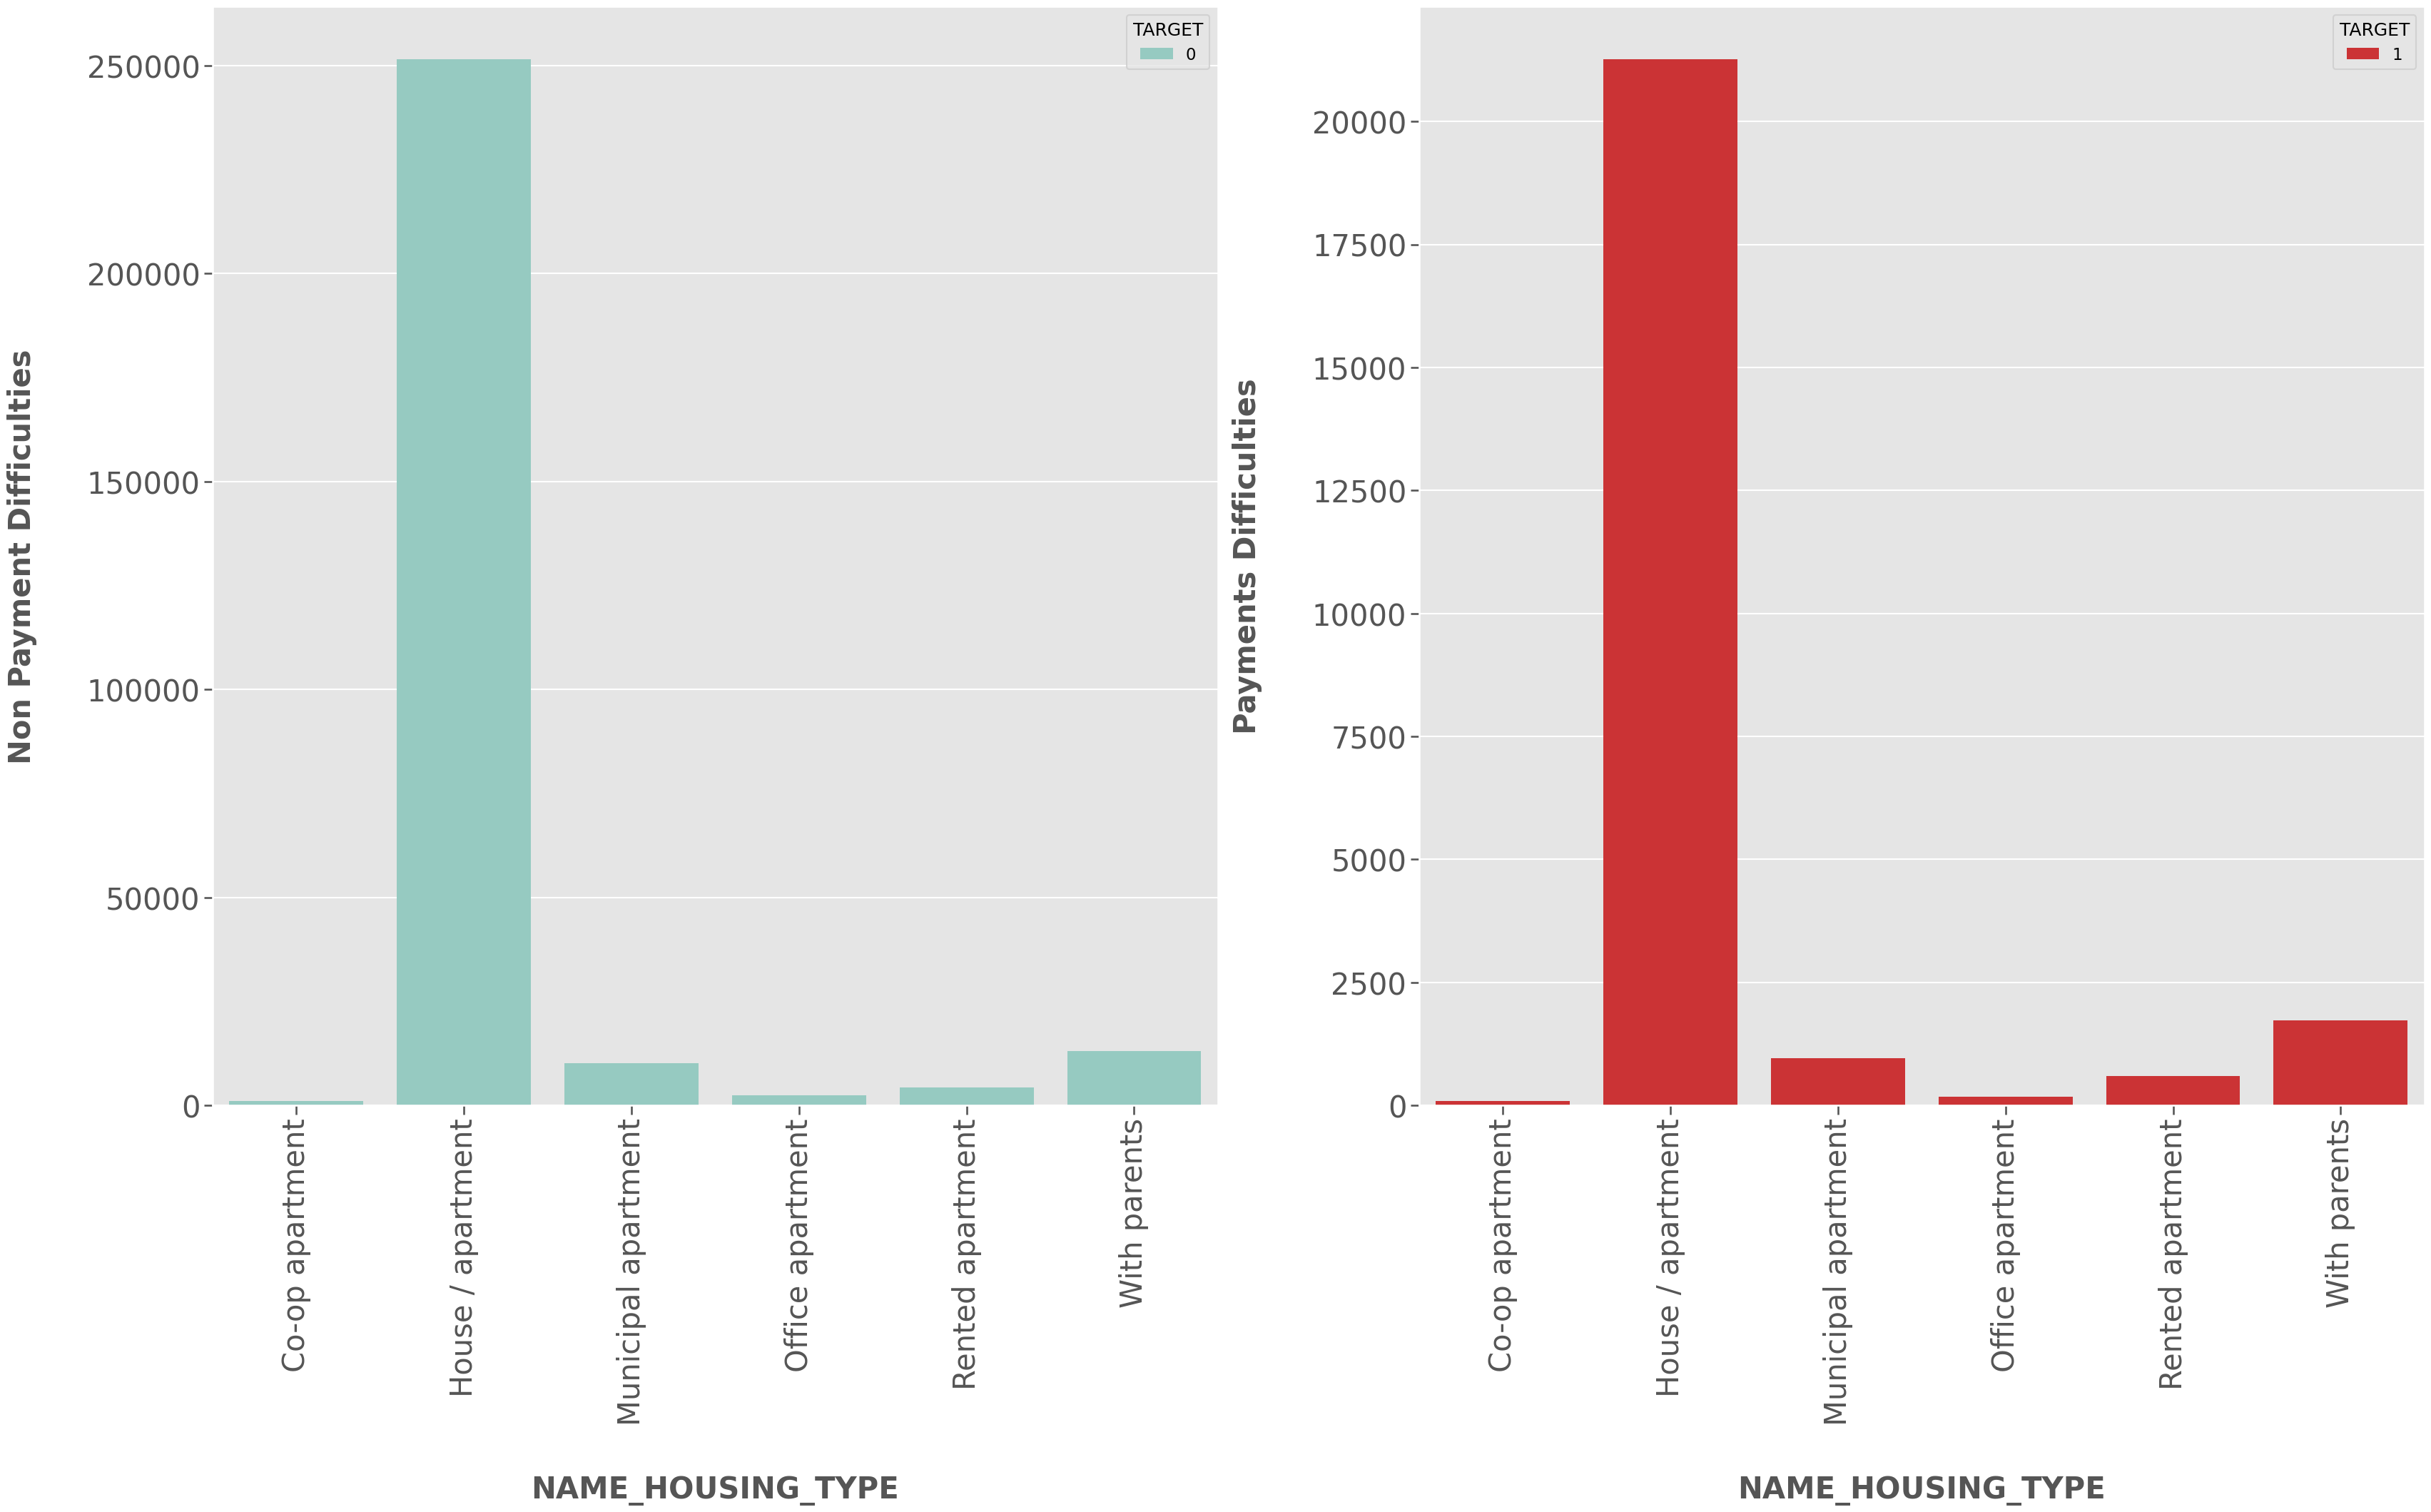

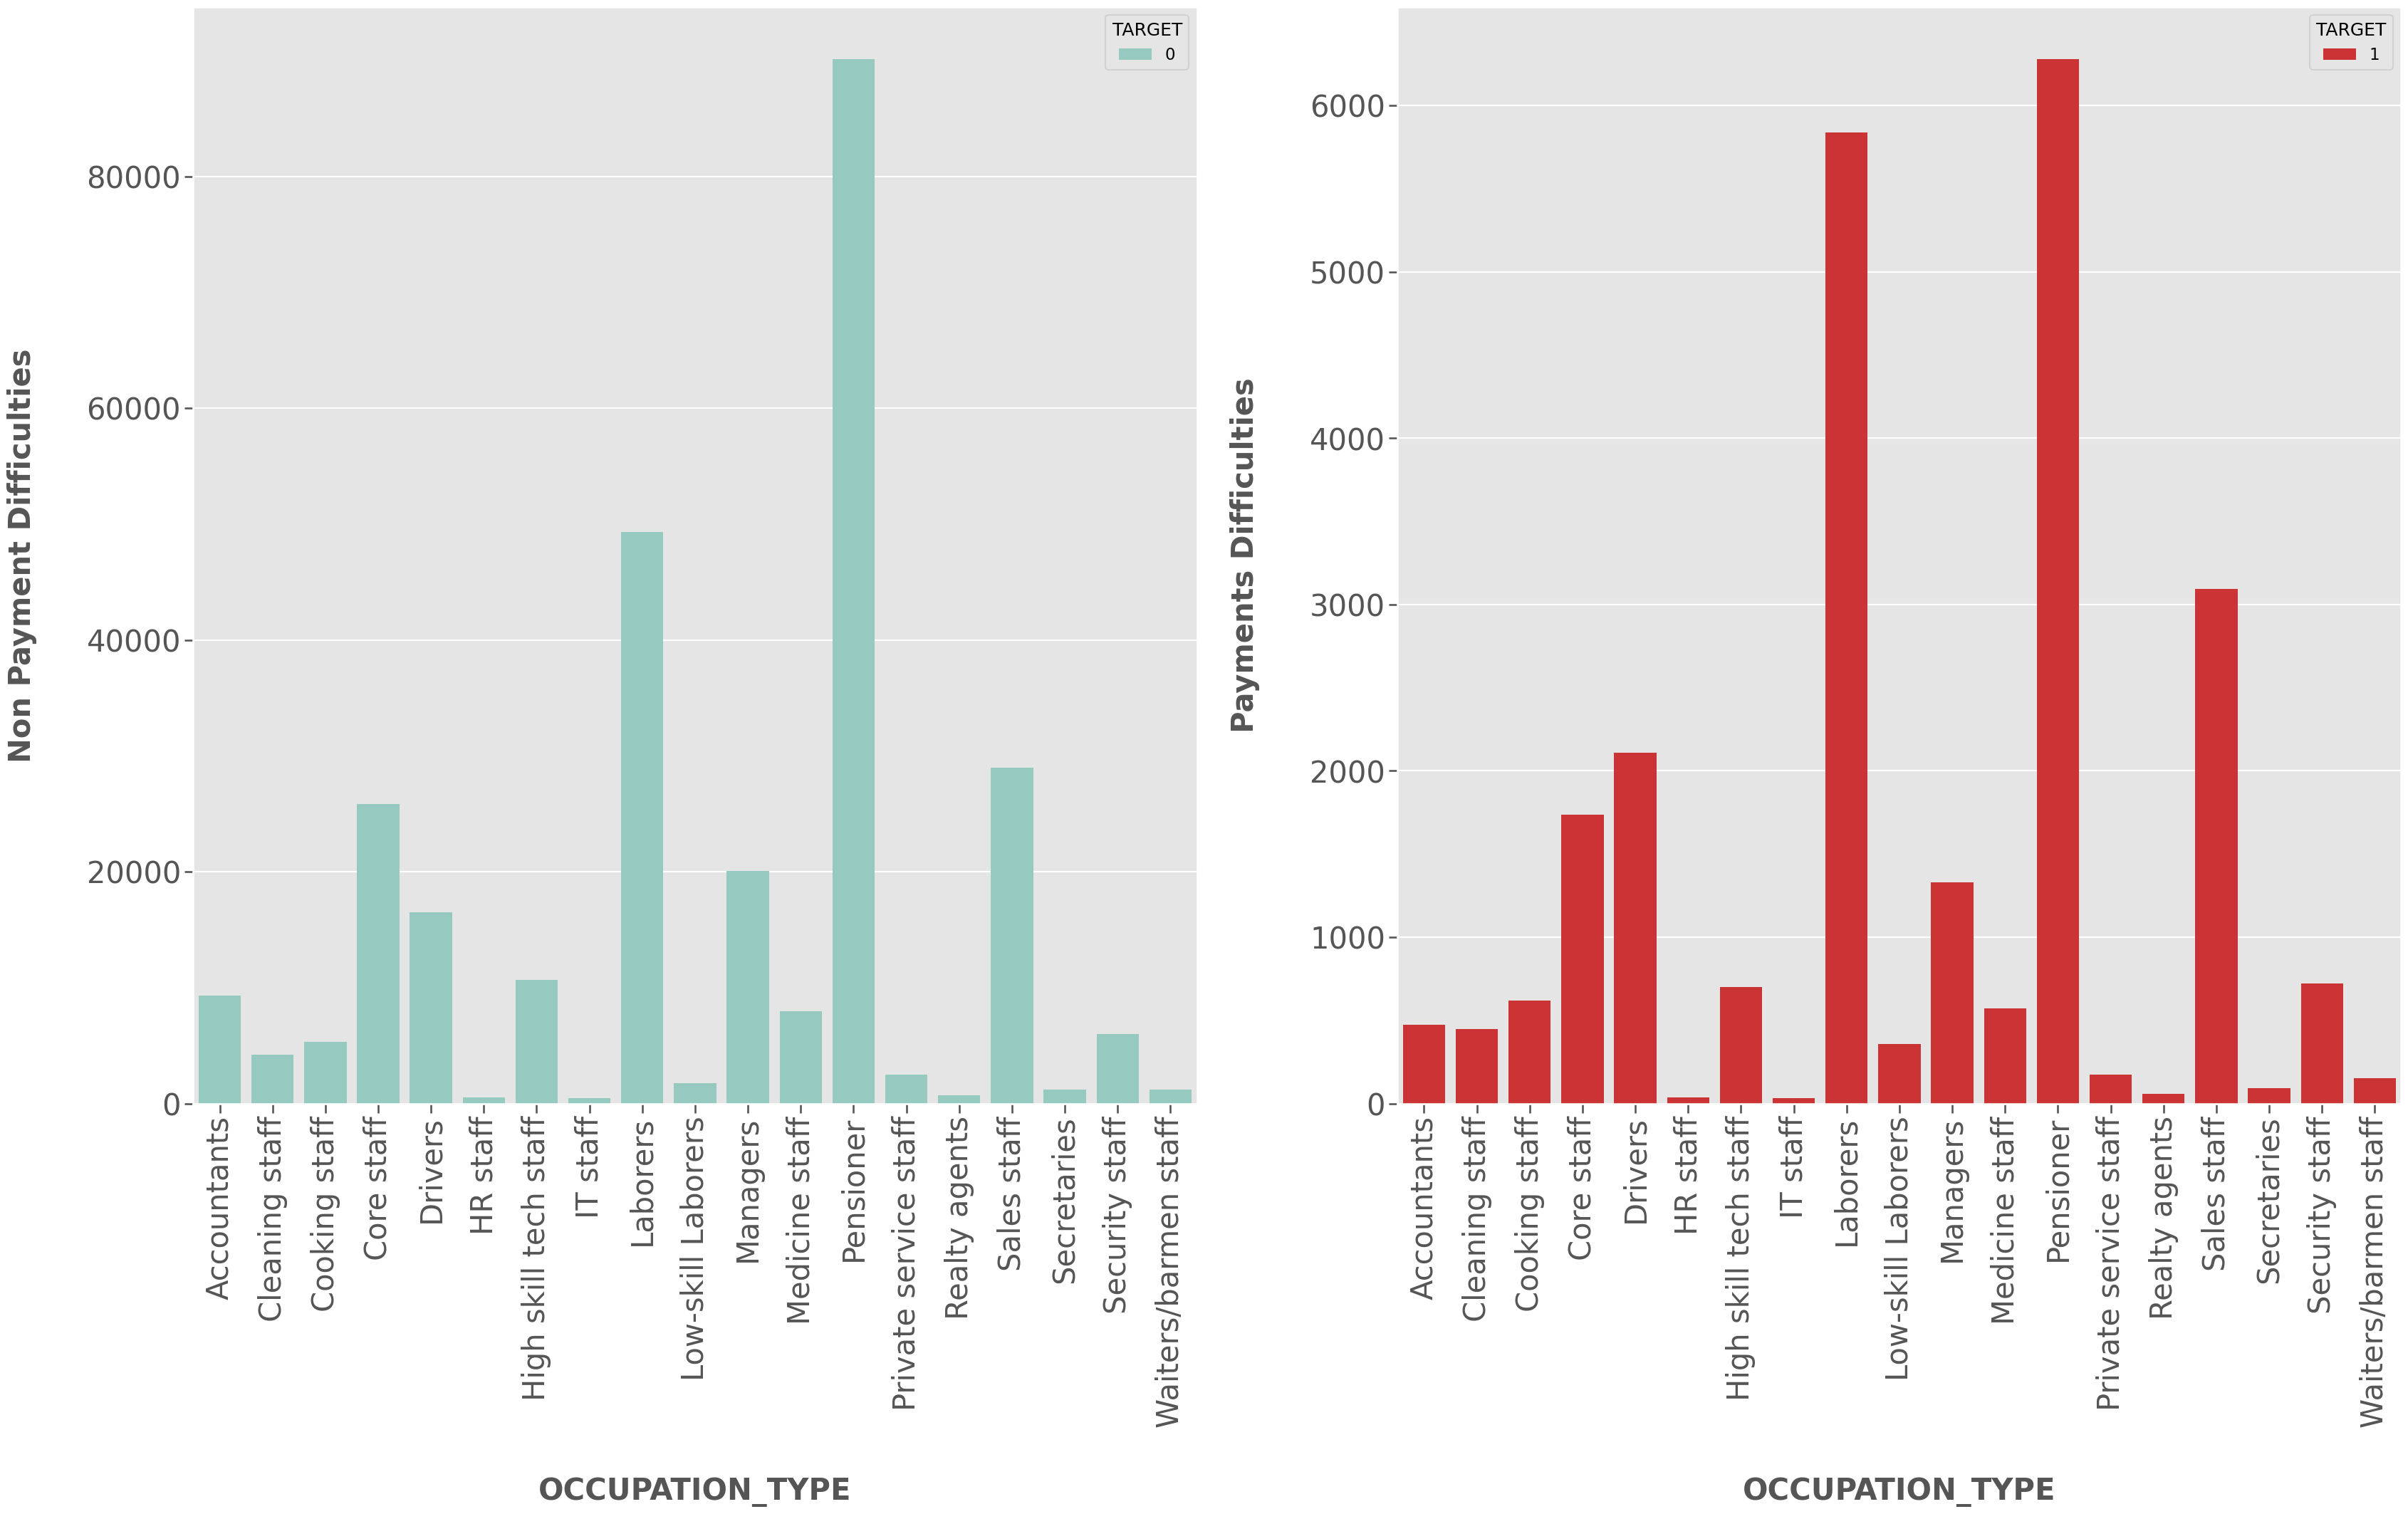

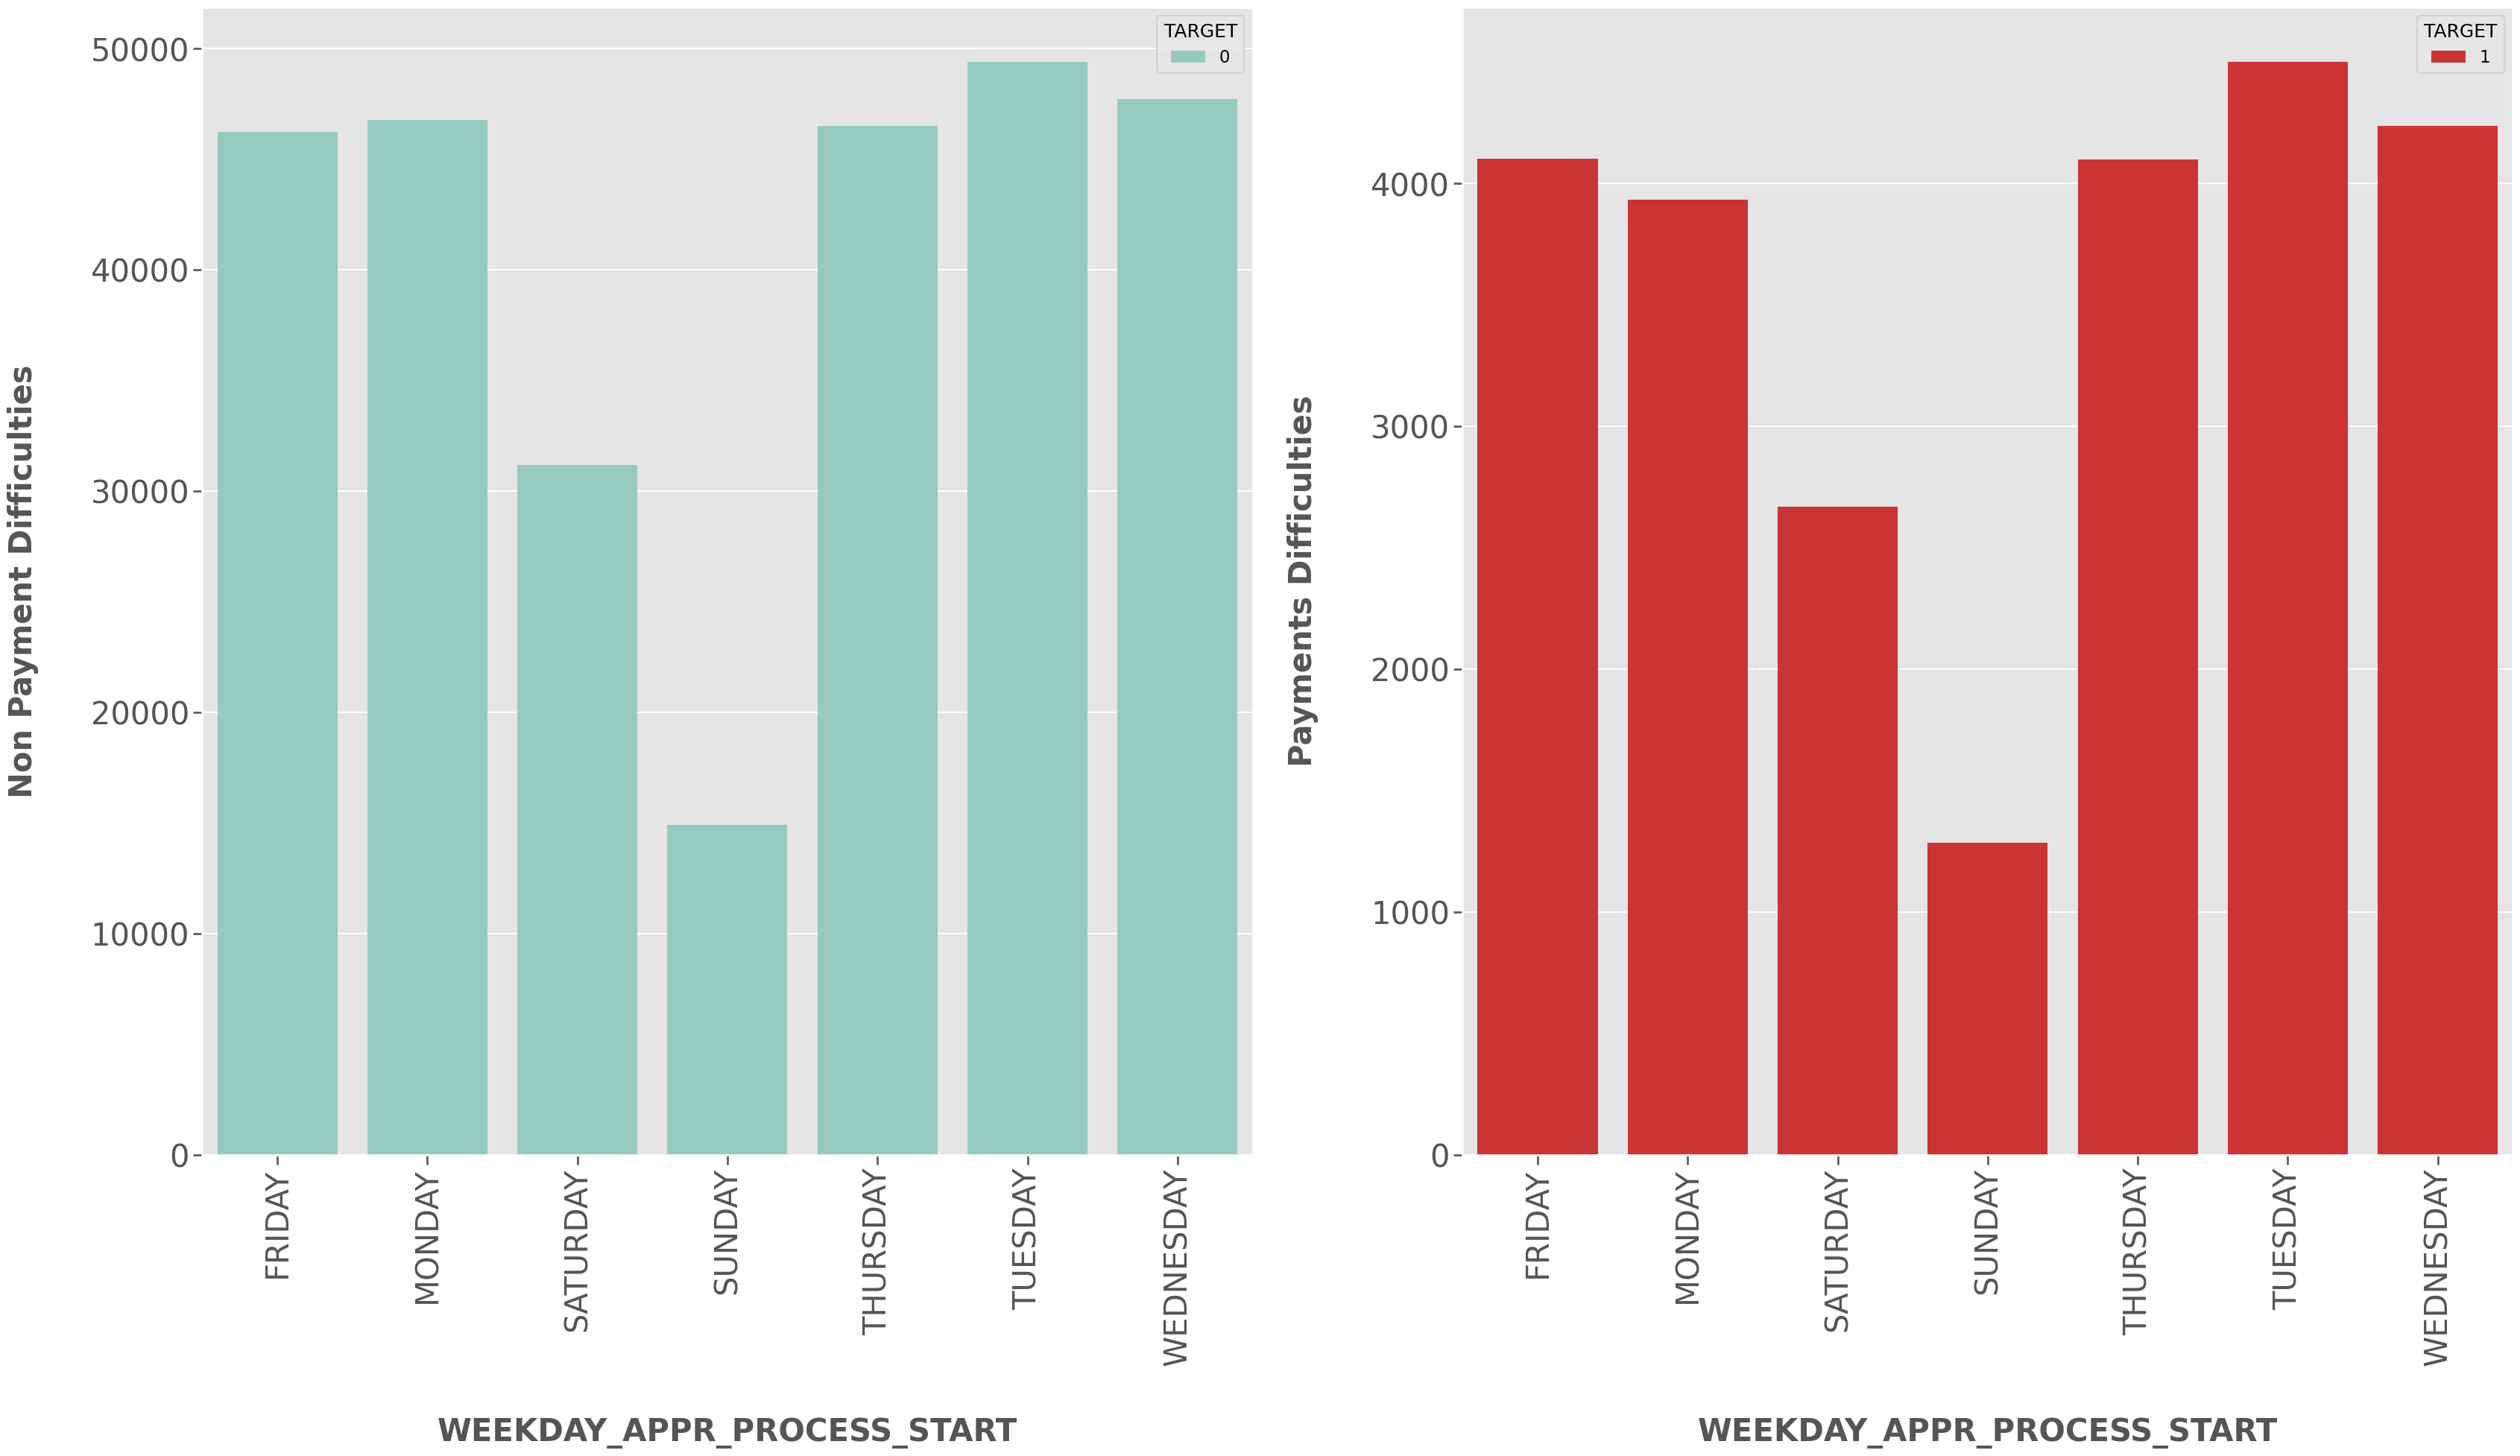

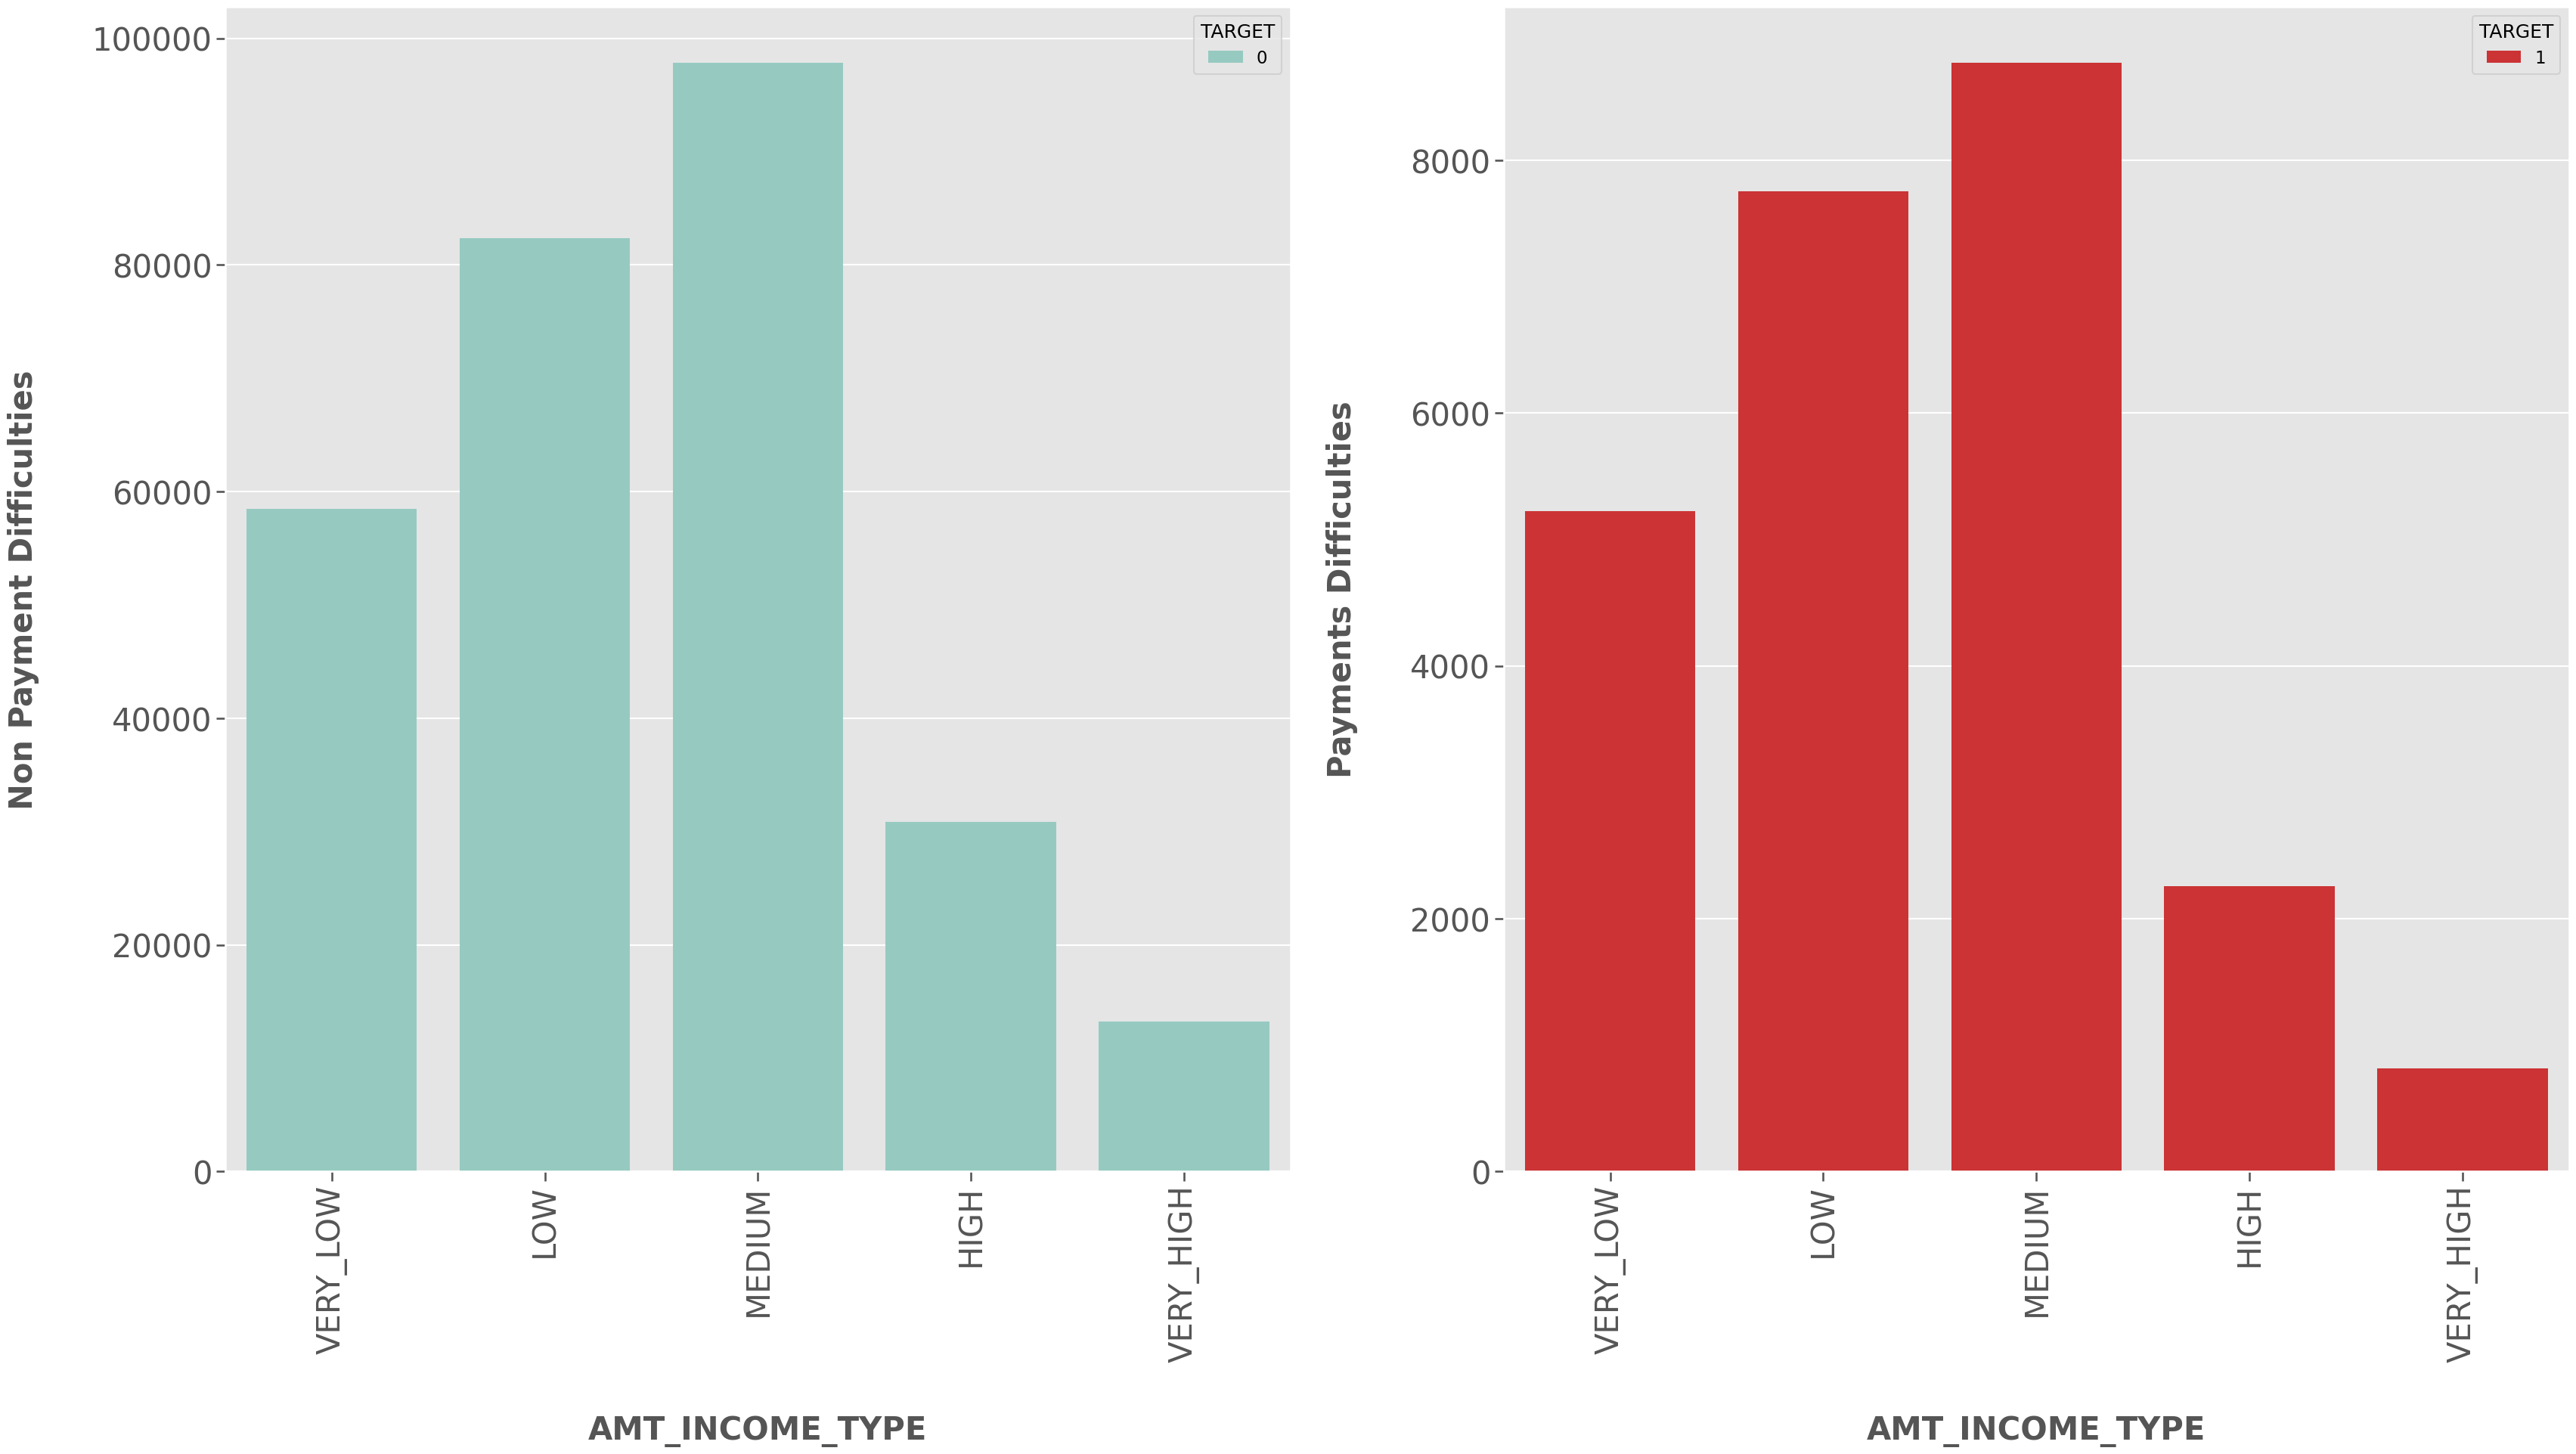

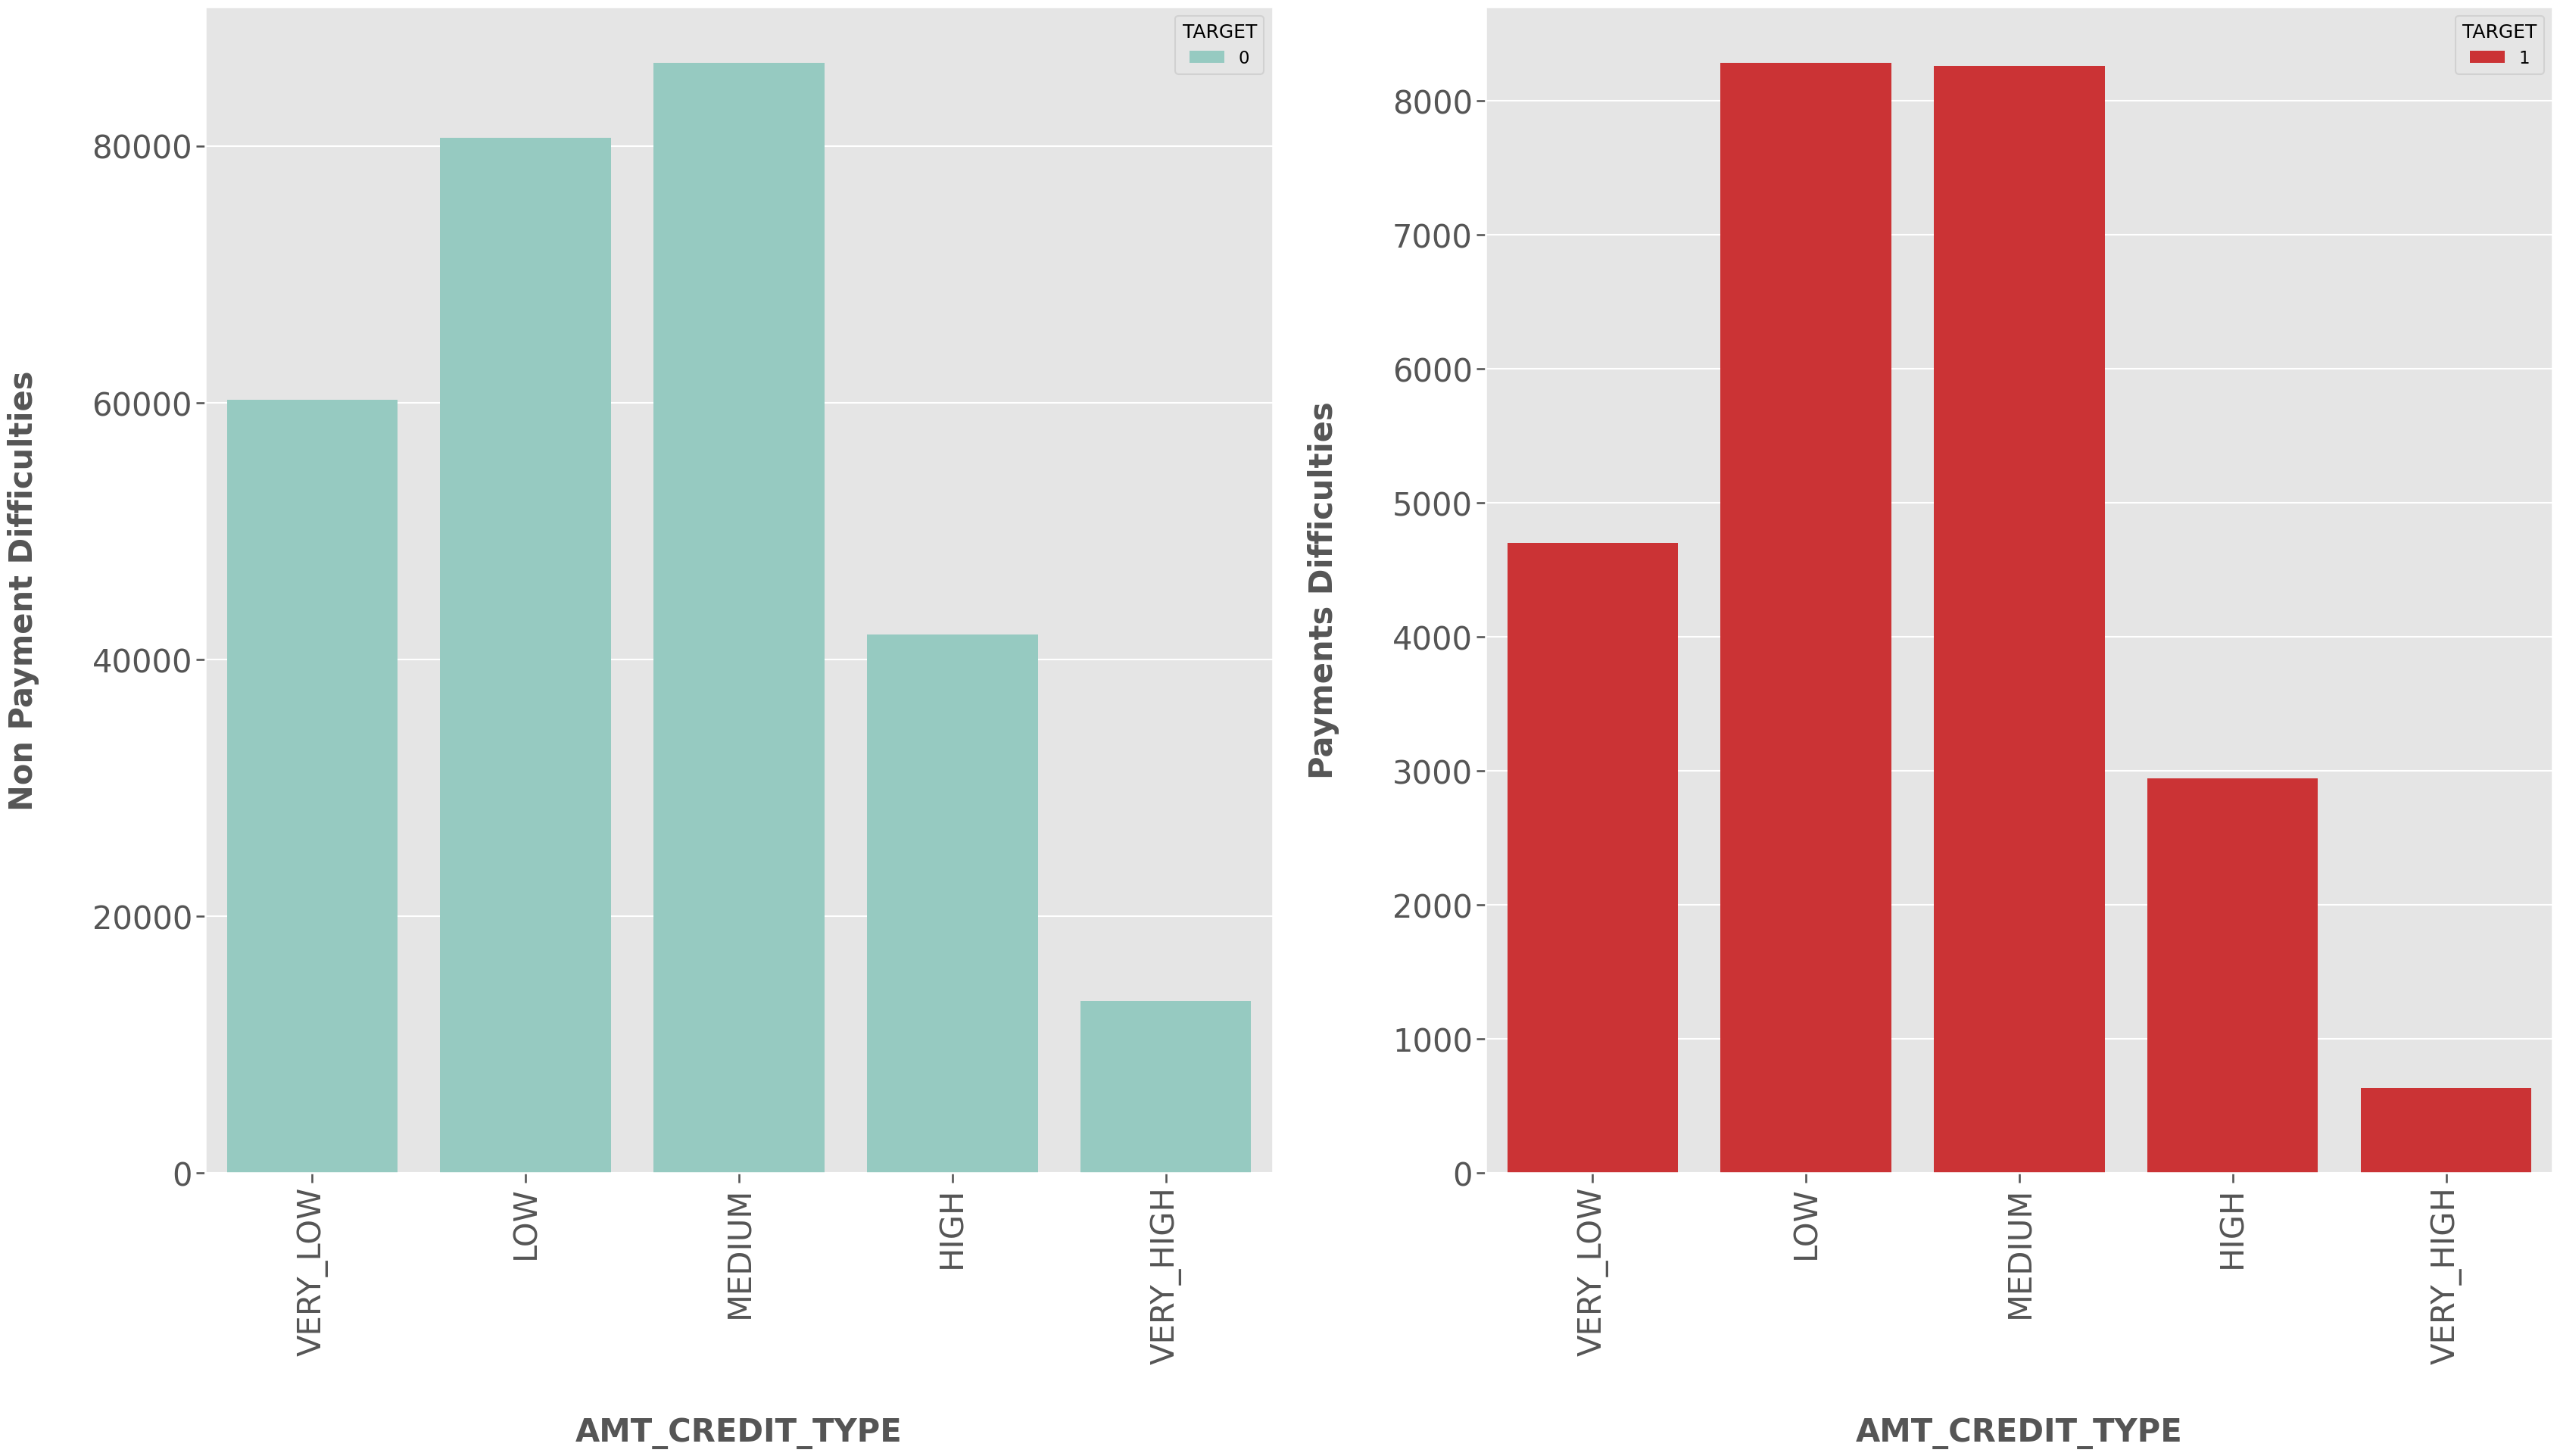

In [187]:
for cat in categorical_col:
    categorical_plot(cat)

## Análisis:

1. `NAME_CONTRACT_TYPE`:
> - **La mayoría de los clientes** solicitaron un `Cash Loan`, mientras que una **proporción muy pequeña** solicitó un `Revolving Loan`, tanto en morosos como en no morosos.

2. `NAME_INCOME_TYPE`:
> - Los clientes que obtienen ingresos como **trabajadores**, **asociados comerciales** o **pensionados** son los que más solicitan préstamos, siendo la categoría más alta la de `trabajadores`.
> - **Empresarios, estudiantes y personas desempleadas** son menos propensos a solicitar préstamos.
> - La categoría de **trabajadores** presenta un alto riesgo de incumplimiento.
> - Los **empleados públicos (State Servants)** presentan un riesgo mínimo de incumplimiento.

3. `NAME_EDUCATION_TYPE`:
> - Los clientes con educación `Secundaria o Especializada en Secundaria` son más propensos a solicitar préstamos.
> - También son los que presentan **mayor riesgo de incumplimiento**. Las demás categorías educativas presentan riesgo mínimo.

4. `NAME_FAMILY_STATUS`:
> - Los **clientes casados** parecen ser los que más solicitan préstamos, tanto en morosos como en no morosos.
> - En el caso de los morosos, los clientes con estado civil **soltero** tienen **menor riesgo**.
> - Las personas **viudas** presentan un **riesgo mínimo** de incumplimiento.

5. `NAME_HOUSING_TYPE`:
> - Según el gráfico de barras, la mayoría de los clientes **poseen una casa o viven en un apartamento**, tanto los morosos como los no morosos.

6. `OCCUPATION_TYPE`:
> - Los pensionados son quienes más han solicitado préstamos, tanto en morosos como en no morosos.
> - Los **pensionados**, seguidos por los **trabajadores manuales (laborers)**, presentan un alto riesgo de incumplimiento.

7. `WEEKDAY_APPR_PROCESS_START`:
> - No se observa una diferencia significativa en los días de inicio del proceso entre morosos y no morosos.

9. `AMT_INCOME_TYPE`:
> - Los clientes con **ingresos en el rango medio** son los que más solicitan préstamos, tanto en morosos como en no morosos.
> - Los clientes con ingresos `bajos` y `medios` presentan **mayor riesgo de incumplimiento**.

10. `AMT_CREDIT_TYPE`:
> - La mayoría de los clientes solicitaron un **monto de crédito medio** tanto en morosos como en no morosos.
> - Los clientes que solicitan montos de crédito `altos` o `bajos` tienen **mayor riesgo de incumplimiento**.


# 6. Análisis univariado de columnas numéricas con respecto a la variable objetivo

## 6.1 Creando función de análisis

## ¿Qué es el análisis multivariado?

El análisis multivariado es una técnica estadística que permite examinar **simultáneamente más de dos variables** para entender las relaciones entre ellas y cómo, en conjunto, pueden influir en un resultado o variable dependiente.

A diferencia del análisis univariado (que estudia una sola variable) o bivariado (que examina dos), el análisis multivariado **considera múltiples dimensiones** al mismo tiempo, lo que lo hace especialmente útil para problemas complejos como la predicción, clasificación o segmentación de datos.

### ¿Para qué se utiliza?

- Identificar **patrones** y **relaciones ocultas** entre variables.
- Construir **modelos predictivos más precisos**.
- Analizar el impacto combinado de varios factores sobre una variable objetivo.
- **Reducir la dimensionalidad** del conjunto de datos sin perder información relevante.

### Ejemplo práctico:

En lugar de analizar cómo la edad por sí sola afecta el impago (`TARGET`), un análisis multivariado permitiría examinar **cómo la combinación de edad + ingreso + estado civil + tipo de vivienda influye en conjunto** sobre el riesgo de incumplimiento del préstamo.

### Ejemplos de técnicas multivariadas:

- **Regresión múltiple**
- **Análisis de componentes principales (PCA)**
- **Clustering (agrupamiento) como K-means**
- **Árboles de decisión y redes neuronales**
- **Análisis discriminante**

Este tipo de análisis es fundamental en campos como la ciencia de datos, la inteligencia artificial, el marketing analítico, la medicina, la economía y muchas otras disciplinas que trabajan con grandes volúmenes de información.




In [188]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();
    

### 6.1.1 Anualidad del préstamo según Target 0 y Target 1

Es una función dos gráficos de distribución (histogramas con densidad) de la columna numérica indicada por col, comparando clientes que pagaron el préstamo (Target0) y clientes que no lo pagaron (Target1).

Un histograma de densidad es útil cuando se quiere comparar formas de distribución, visualizar tendencias, o superponer varias curvas sin que el tamaño del grupo afecte la interpretación (por ejemplo, comparar poblaciones con diferente número de registros).

La densidad de probabilidad representa qué tan probable es encontrar un valor en un determinado rango. No te dice cuántos valores hay exactamente, sino cómo se distribuyen proporcionalmente.

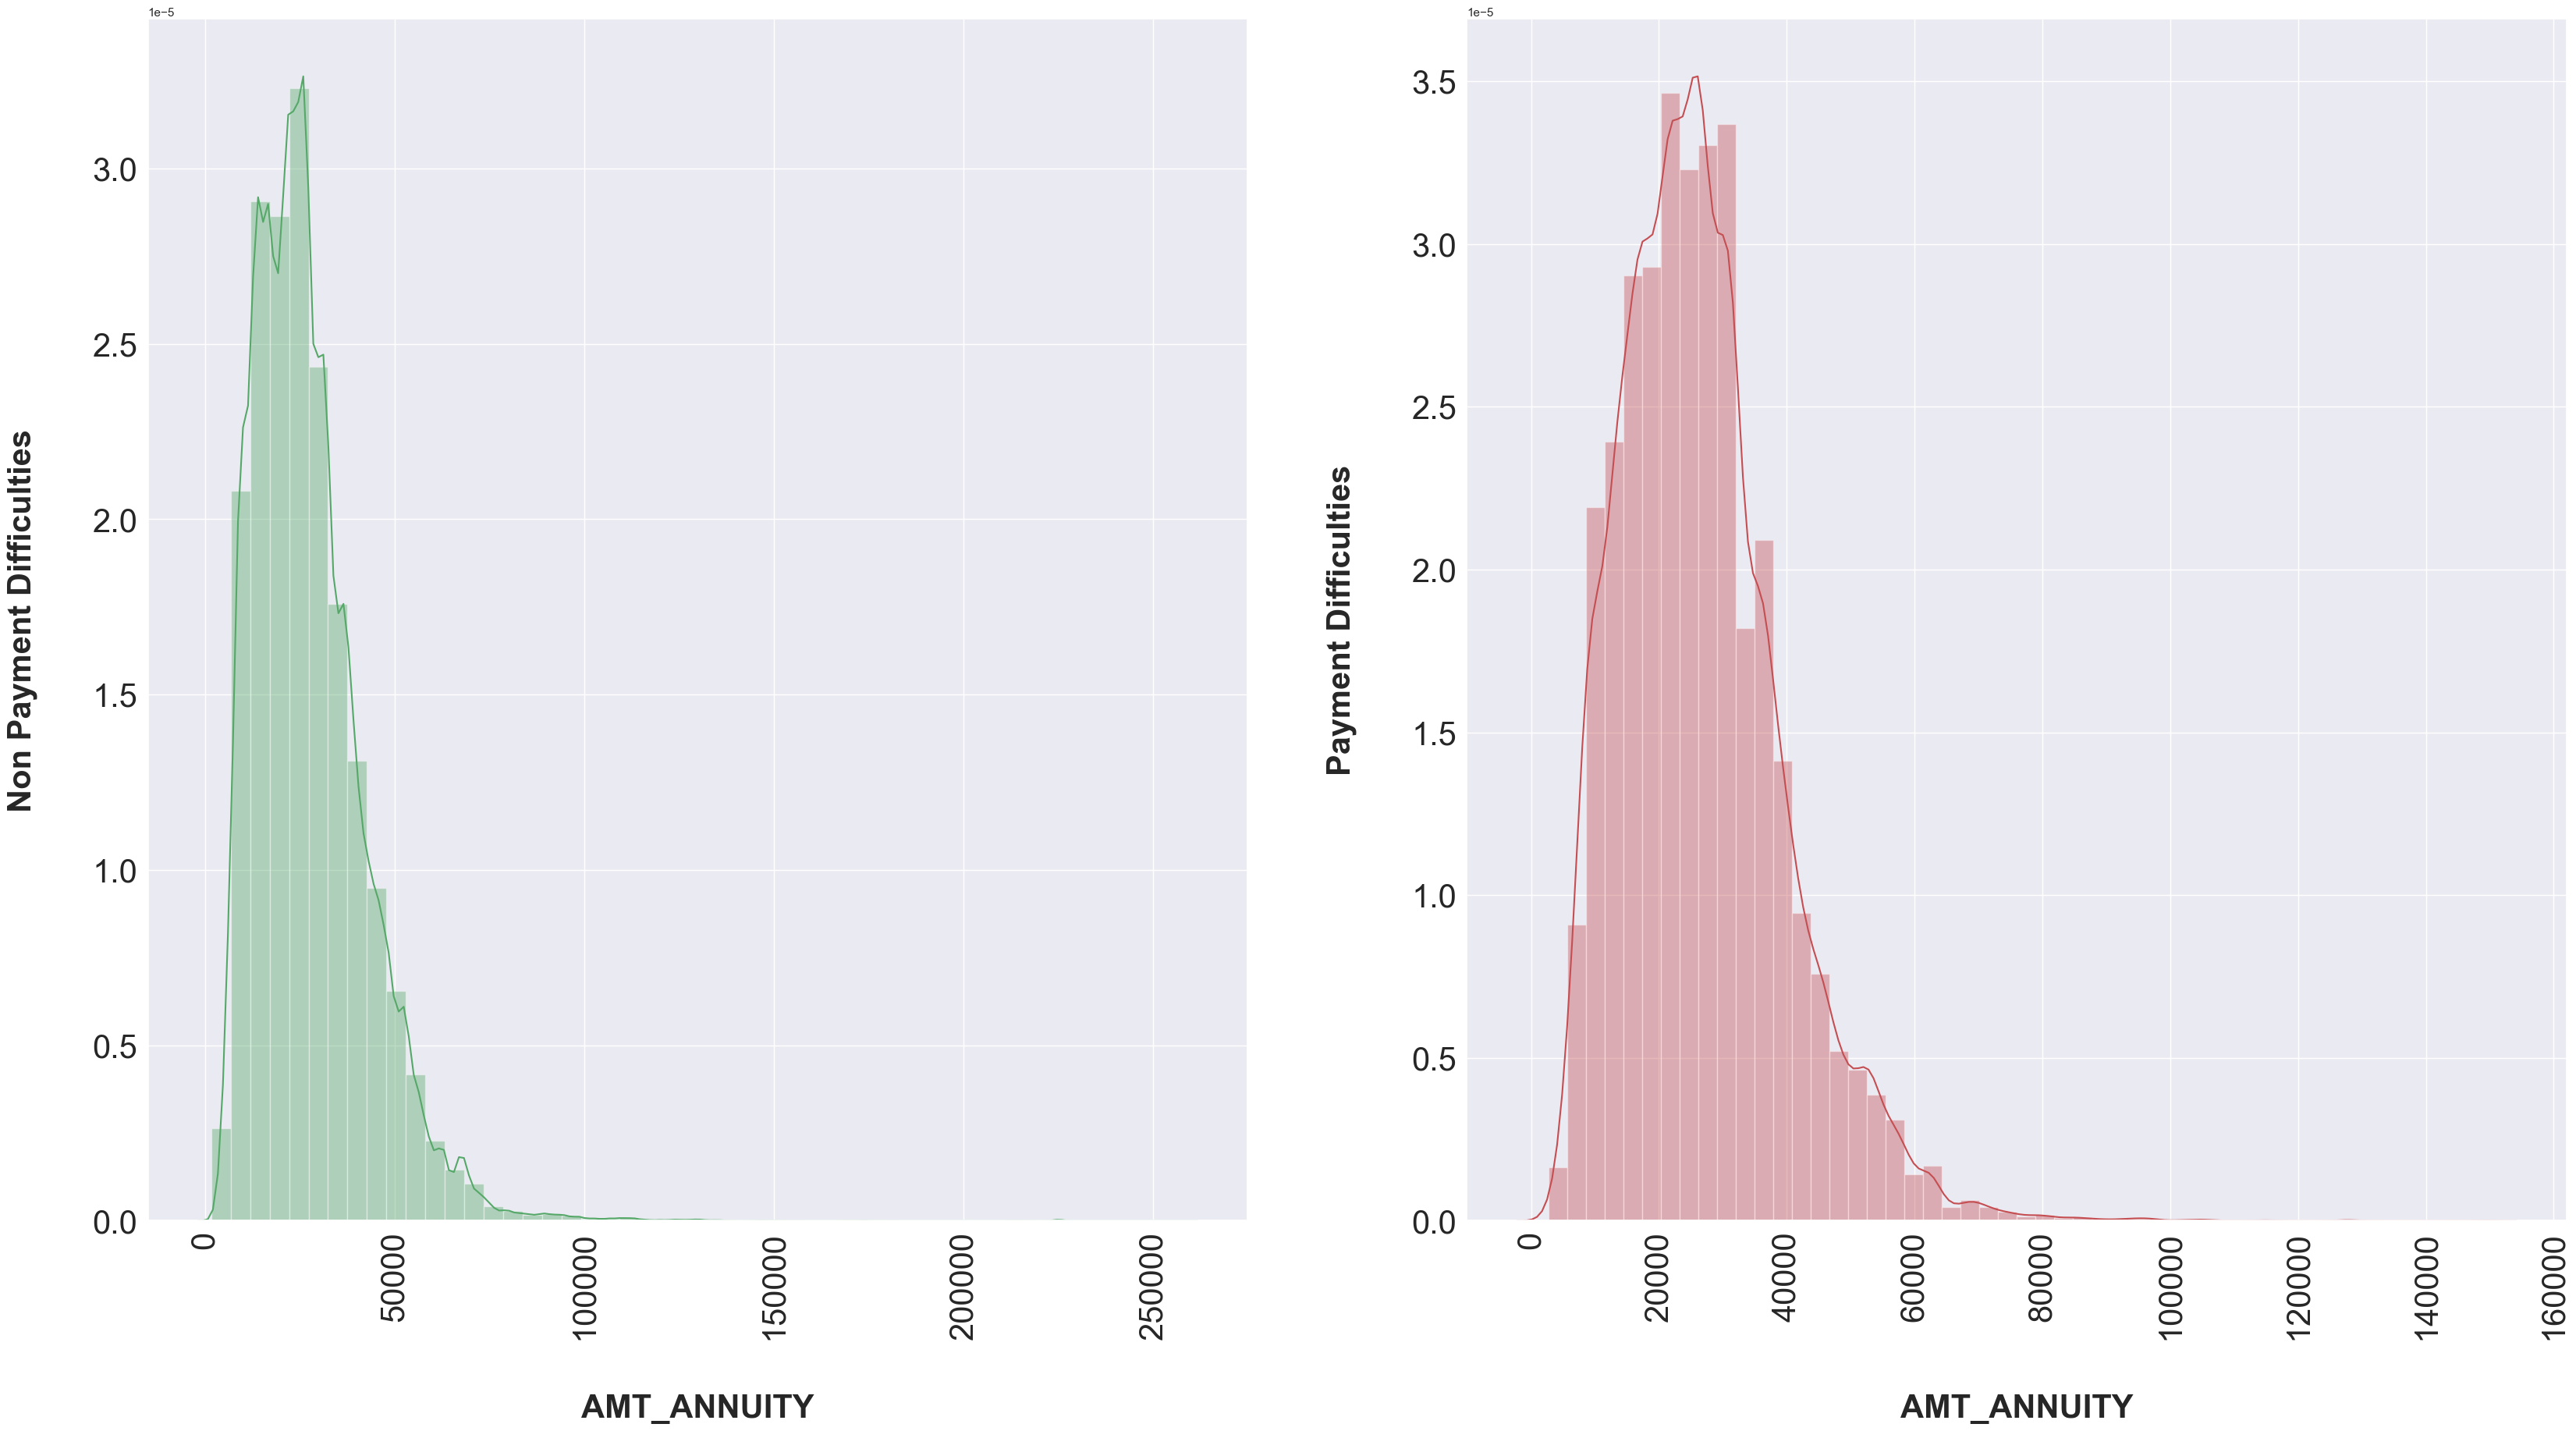

In [189]:
uni(col='AMT_ANNUITY')               

### 6.1.2 Cantidad del Crédito

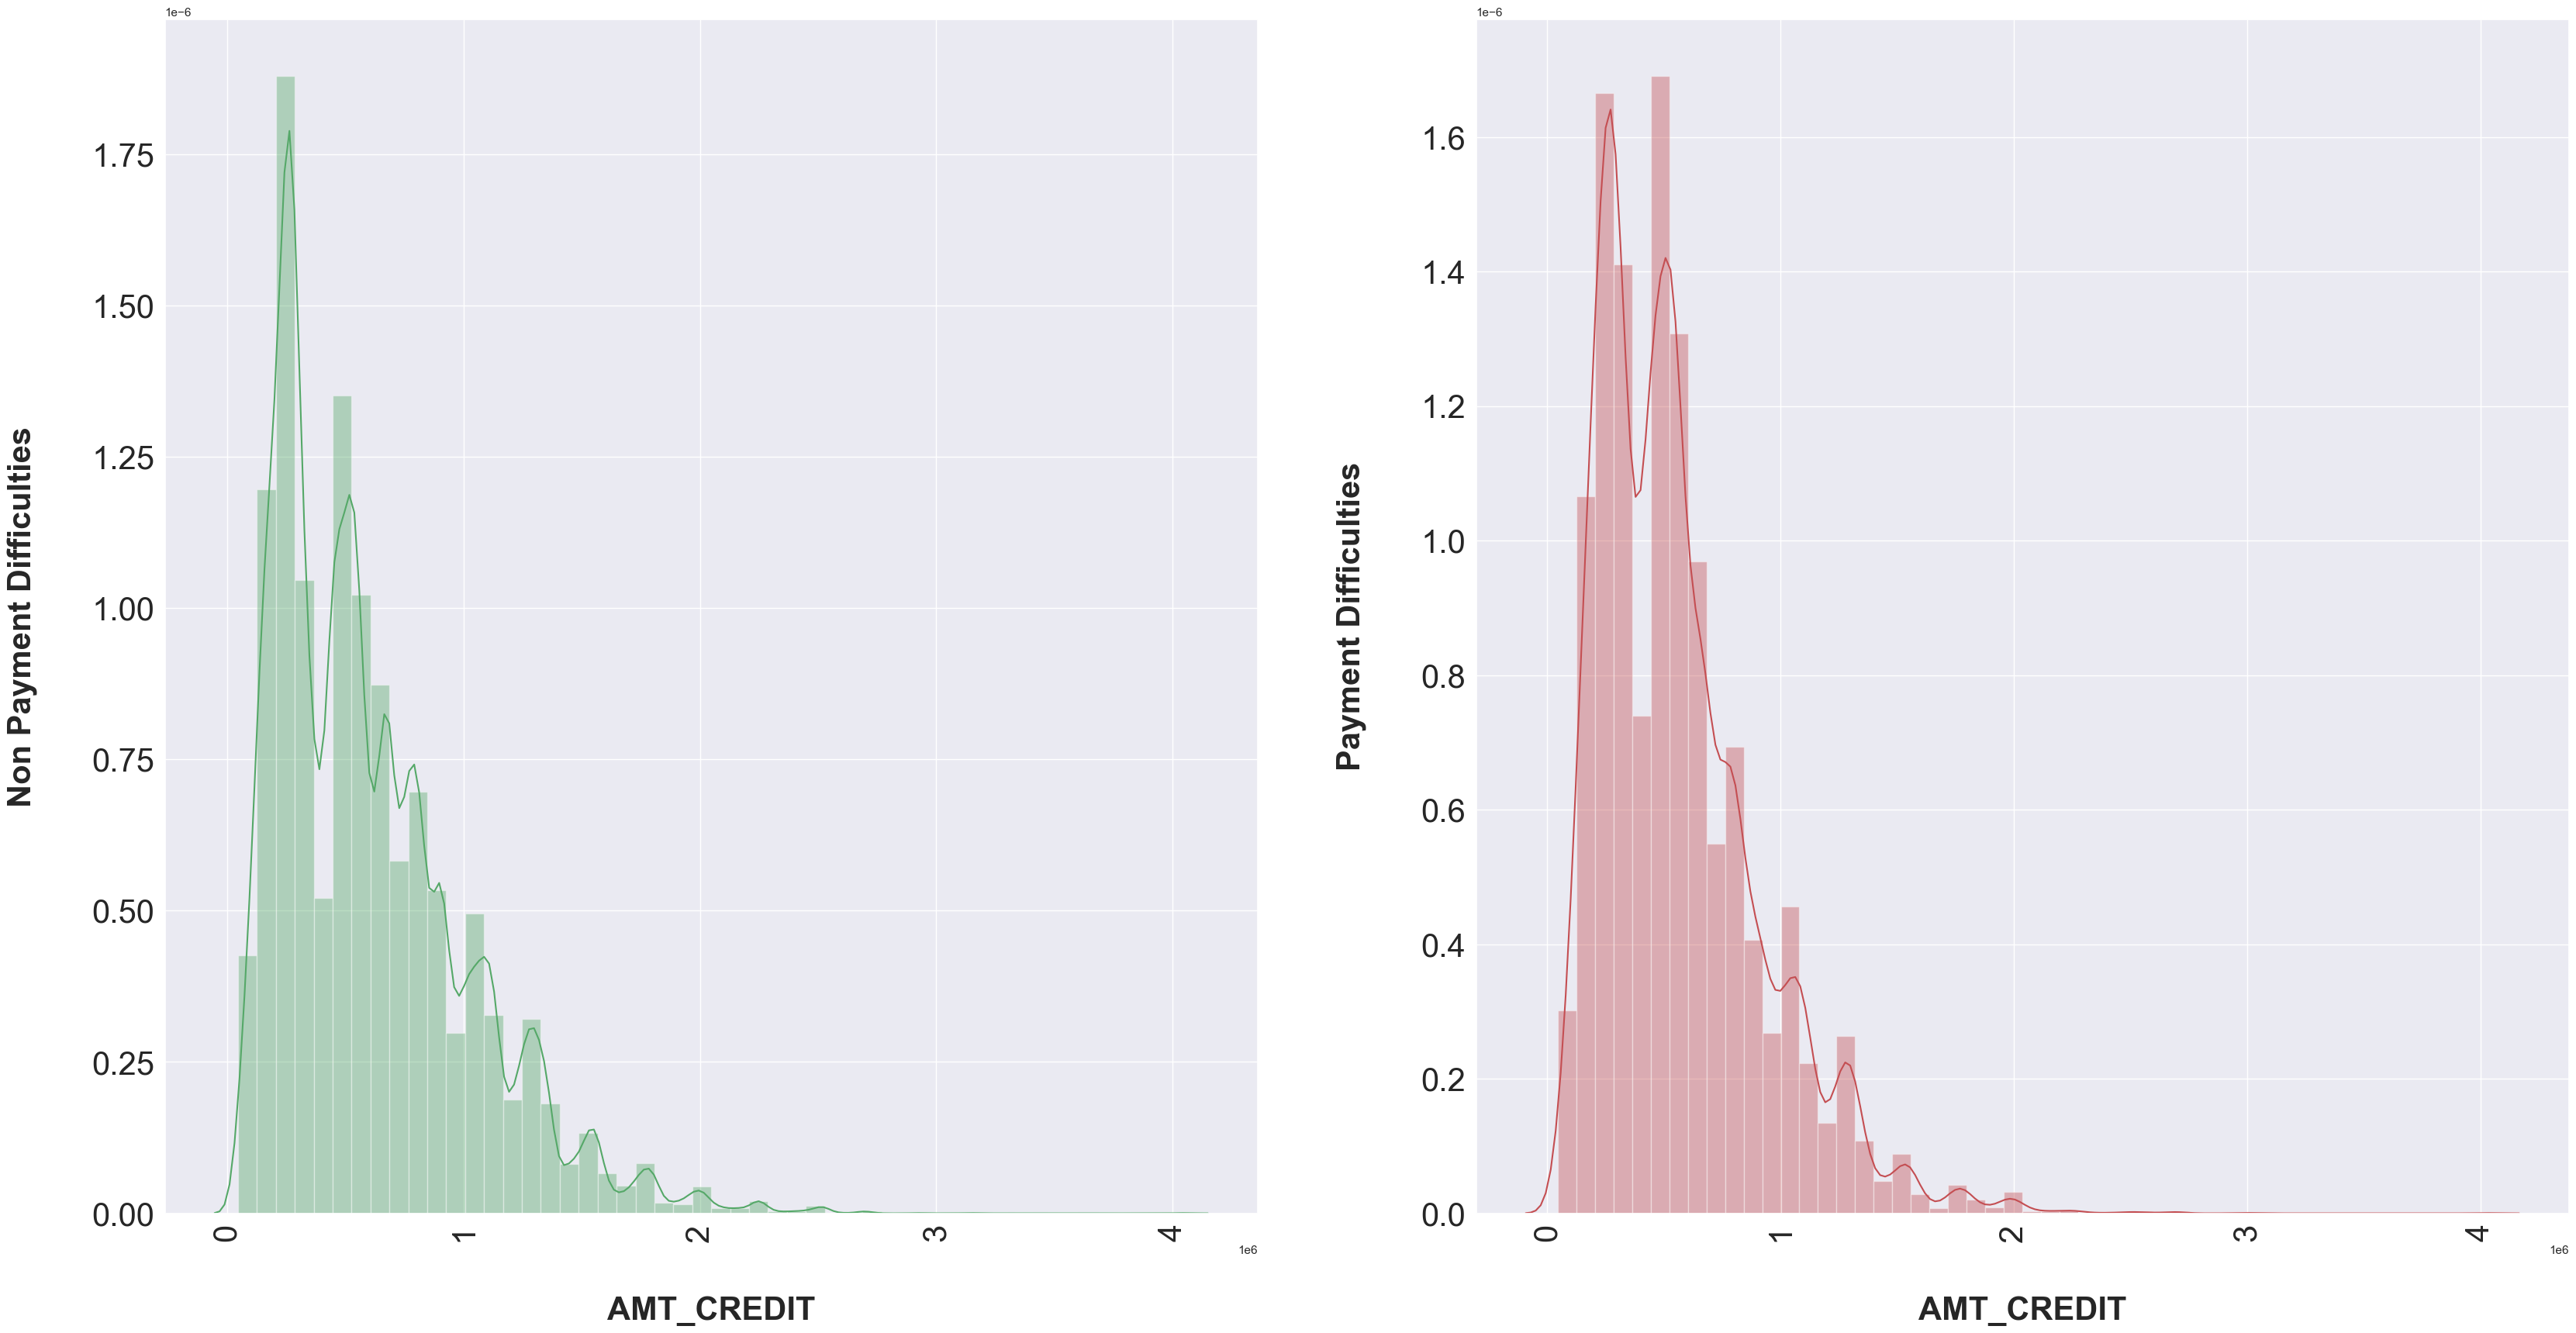

In [190]:
uni(col='AMT_CREDIT')           

### 6.1.3 AMT_GOODS_PRIC  Target 0 y Target 1

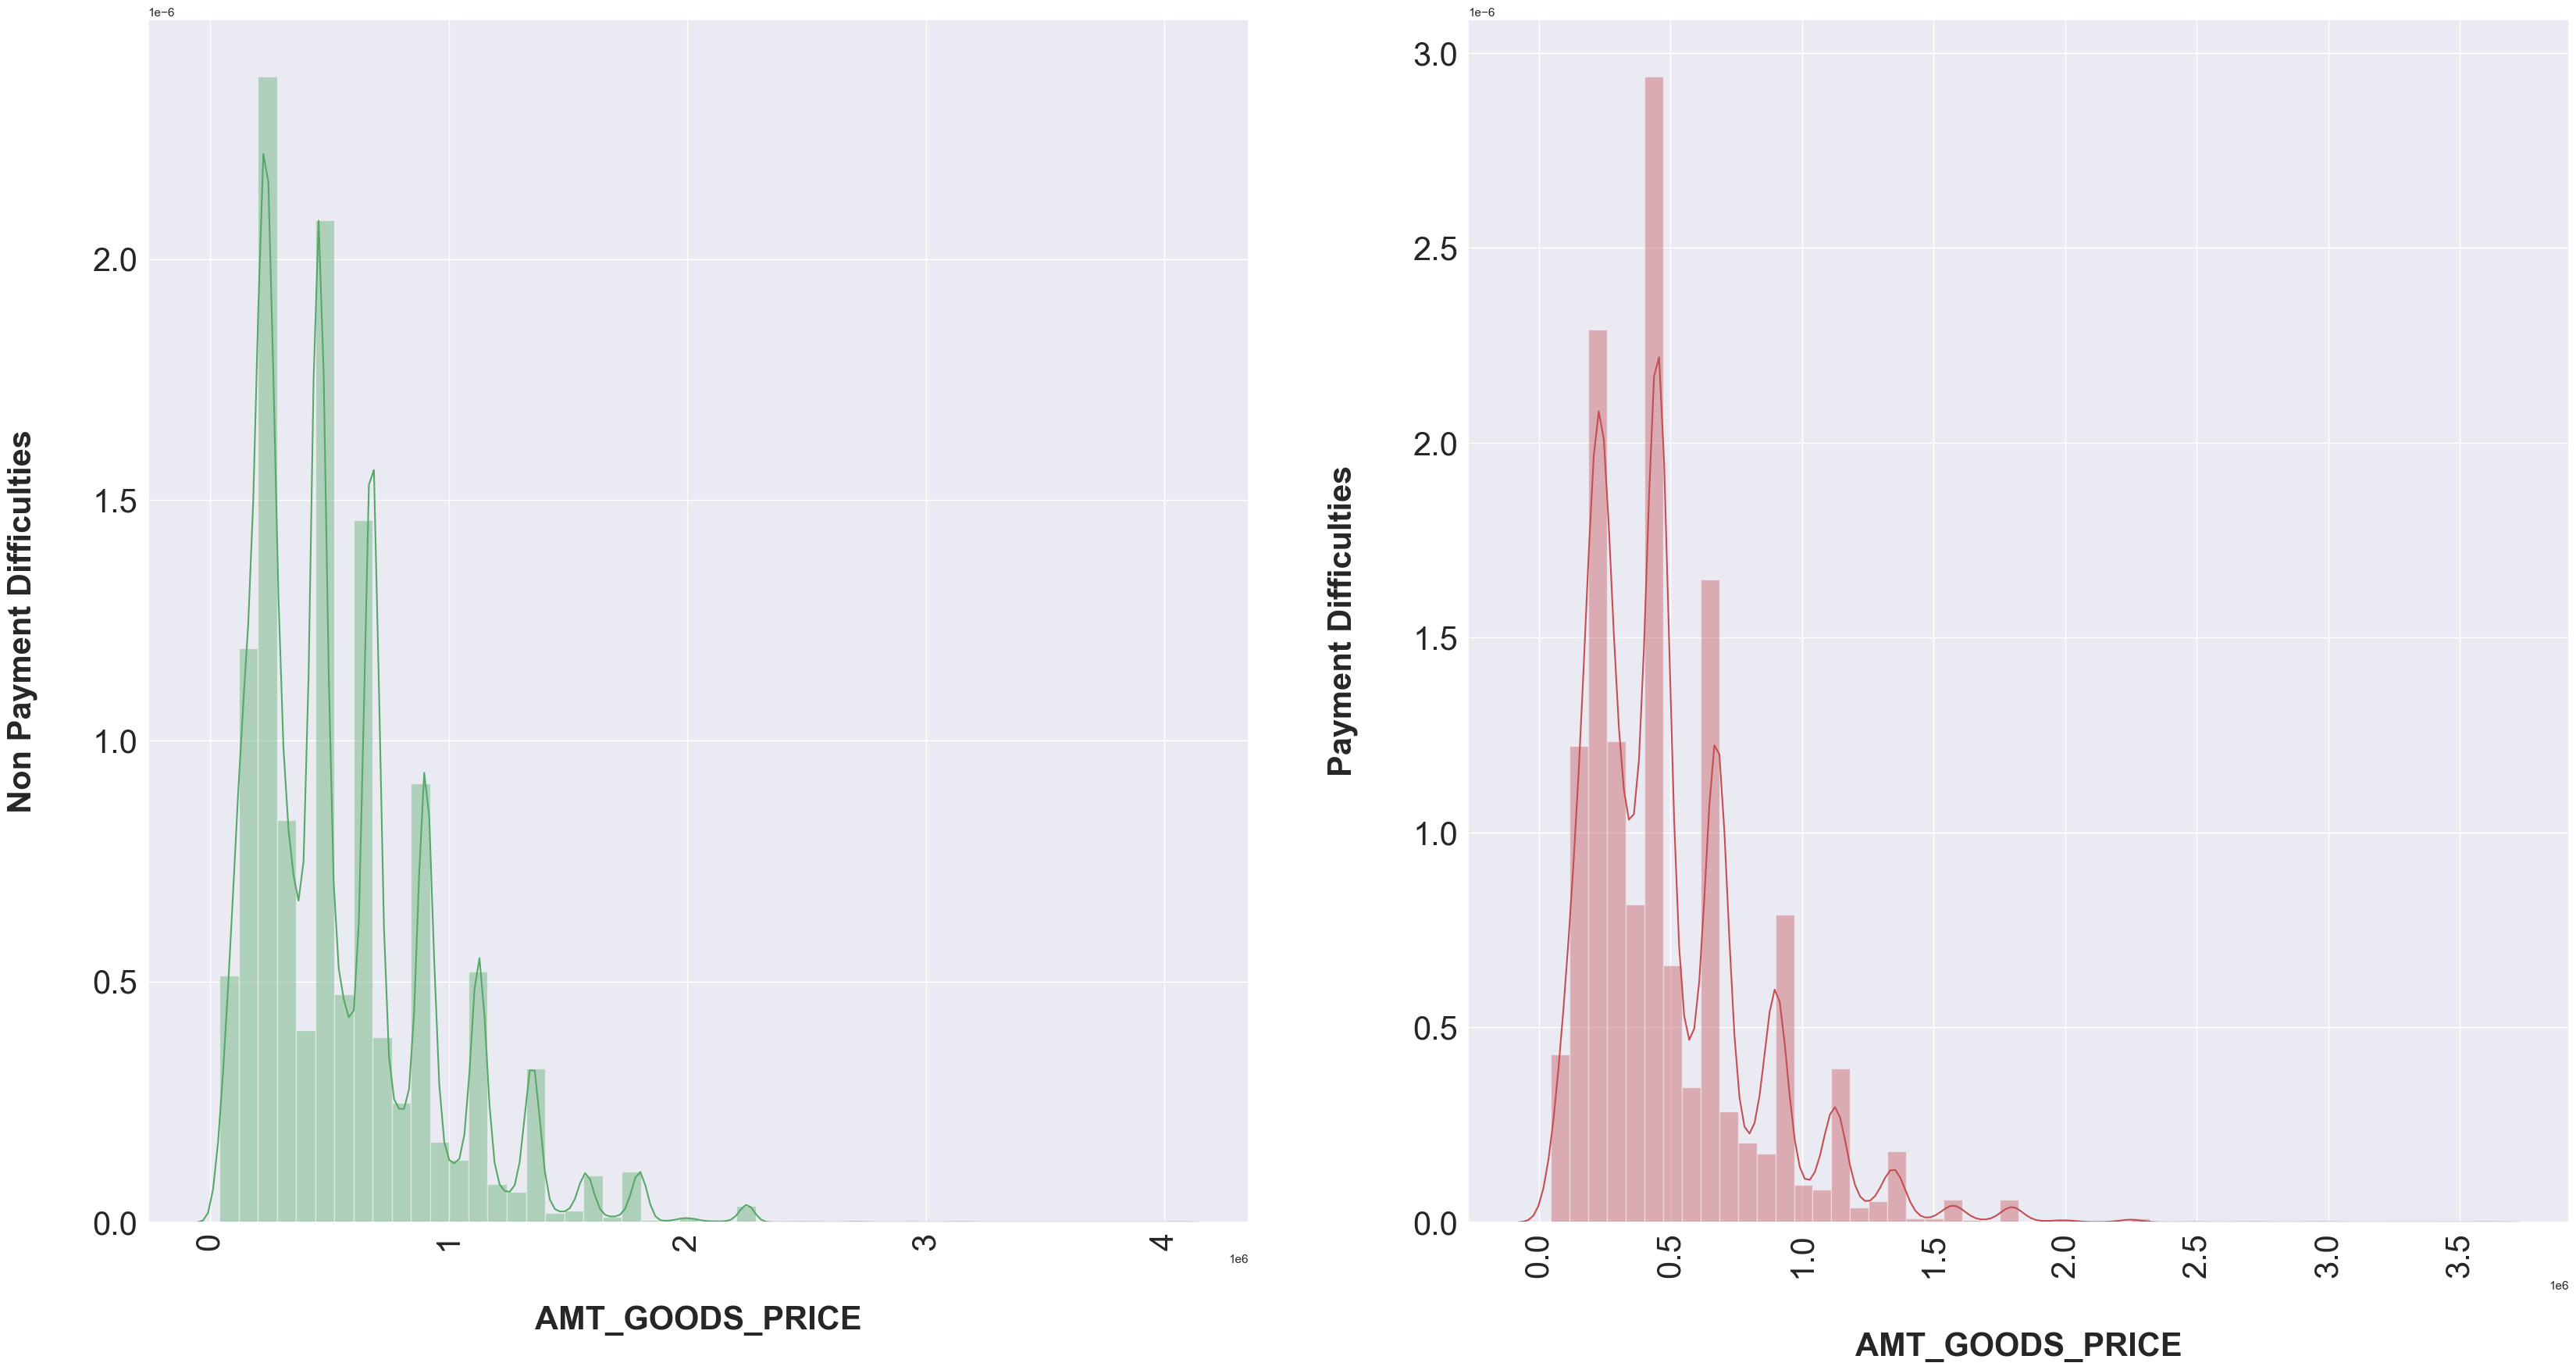

In [191]:
uni(col='AMT_GOODS_PRICE')          

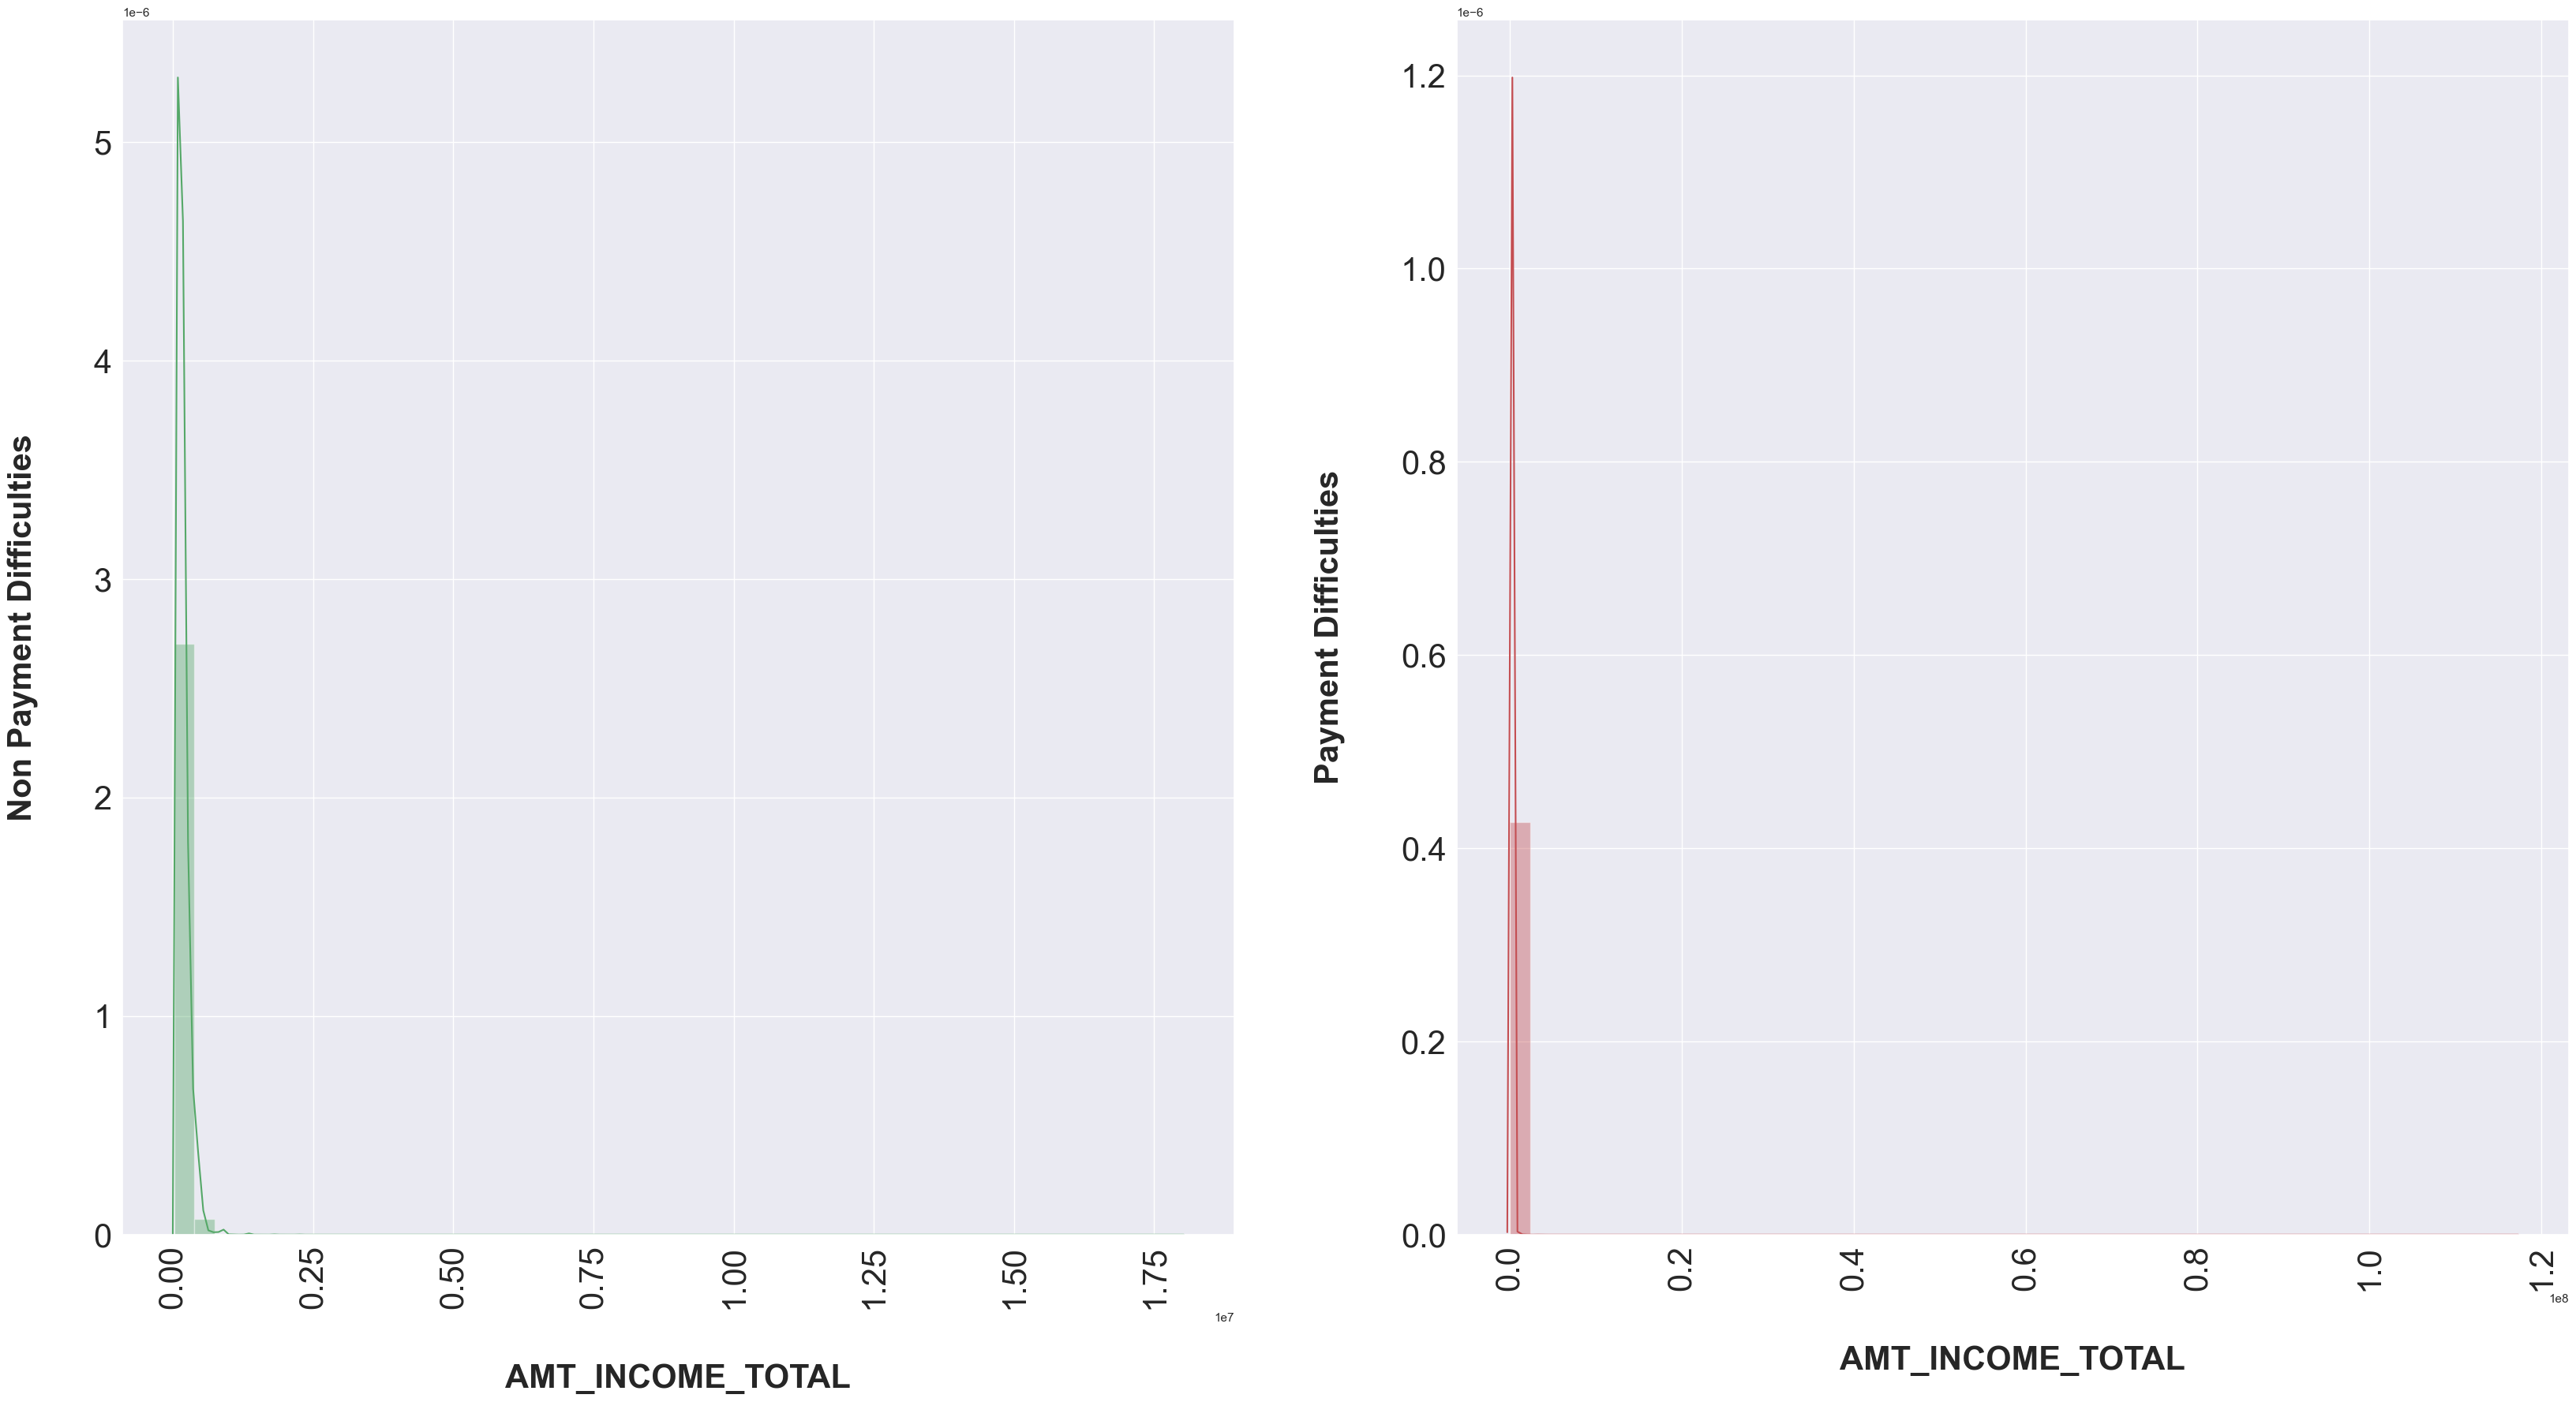

In [193]:
uni(col='AMT_INCOME_TOTAL') 

## Análisis:

- Las personas con `Target = 1` (morosos) presentan ingresos significativamente más dispersos en comparación con las personas con `Target = 0` (no morosos). El gráfico de distribución muestra claramente que las curvas de `AMT_INCOME_TOTAL`, `AMT_ANNUITY`, `AMT_CREDIT` y `AMT_GOODS_PRICE` tienen formas similares dentro de cada grupo de Target.

- Los gráficos también resaltan que las personas con dificultades para pagar sus préstamos tienden a diferenciarse en cuanto a su ingreso, el monto del préstamo, el precio de los bienes financiados y la anualidad.

- El gráfico de distribución muestra que la curva es más amplia para `Target = 1`, lo cual indica mayor variabilidad, mientras que para `Target = 0` la curva es más angosta y con bordes mejor definidos.



# 6. Análisis bivariado: Variables numéricas y categóricas frente a la variable objetivo

**6.0 Columnas requeridas**

In [ ]:
df1[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

## 6.1 . Target 0

### 6.1.1 Income_Amount   Vs   Eduacation_Status    Vs   FAMILY_Status  para Target 0

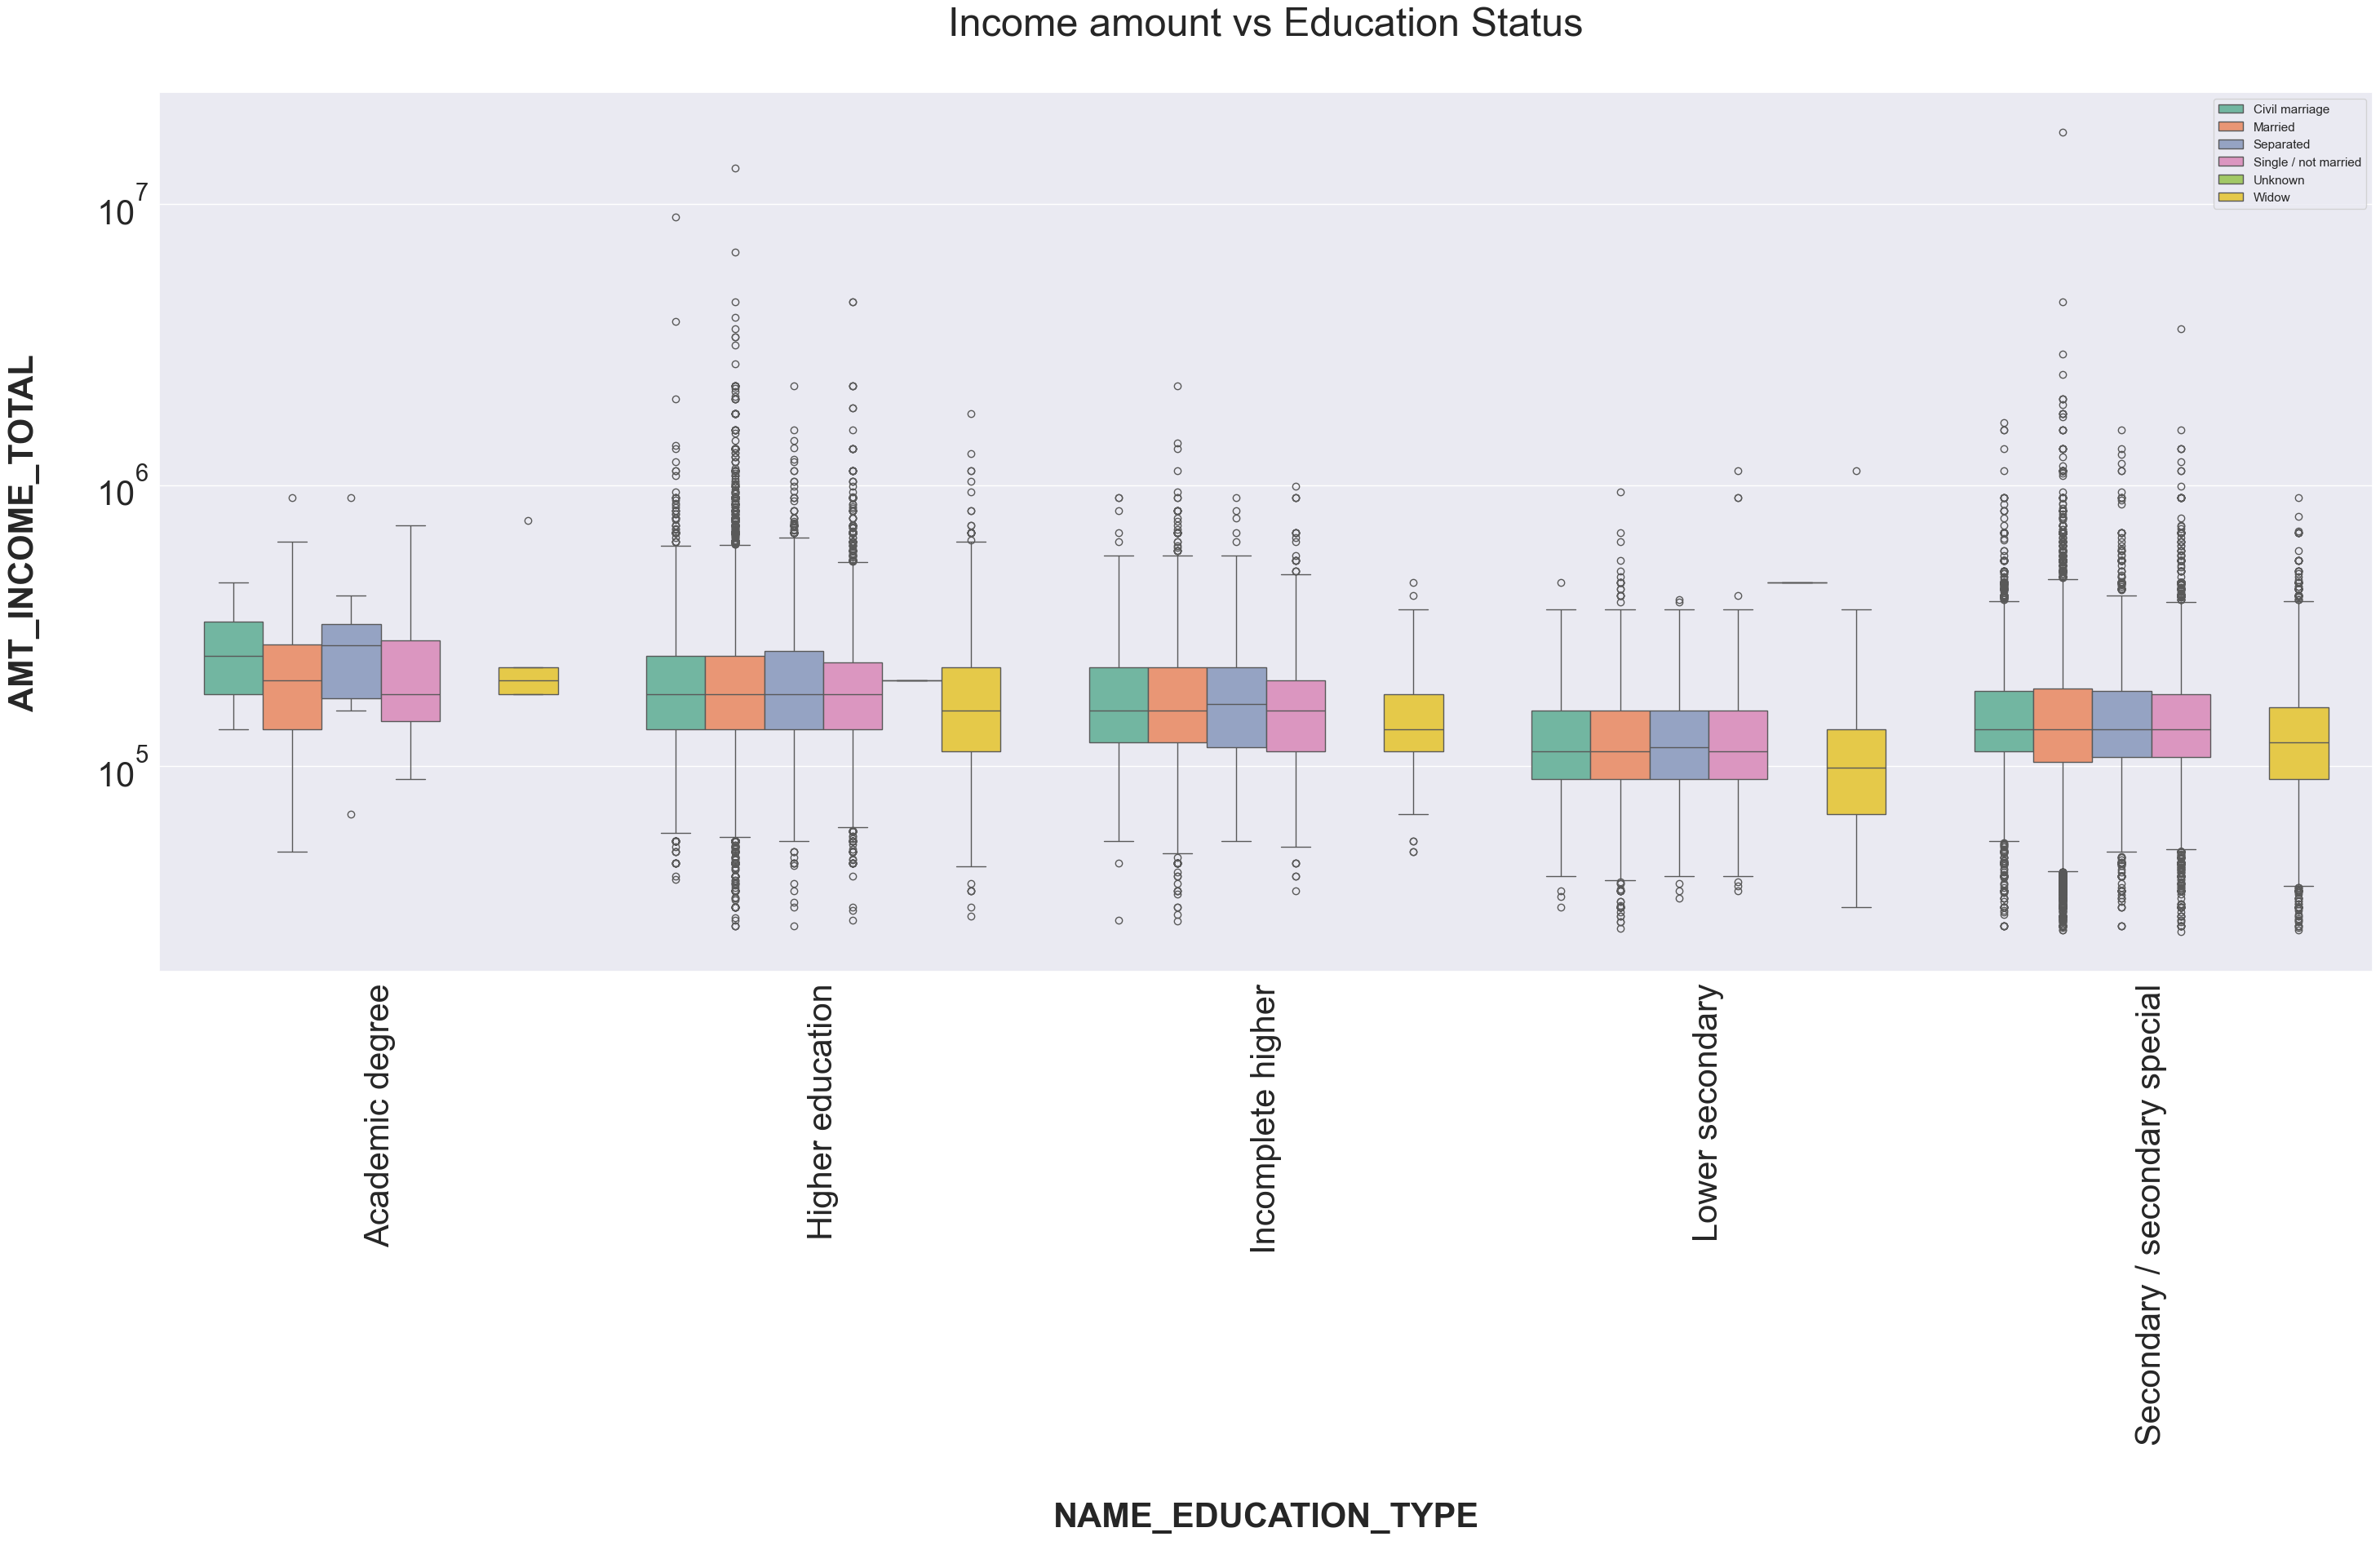

In [194]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Análisis:

- Las clientas viudas con título académico presentan **muy pocos valores atípicos** y no tienen primer ni tercer cuartil. Además, los clientes con cualquier tipo de estado civil que poseen un título académico presentan **menos valores atípicos** en comparación con otros niveles educativos.

- Los ingresos de los clientes con cualquier estado civil y con los demás niveles educativos se encuentran por debajo del primer cuartil, es decir, **el 25% inferior** de la distribución.

- Los clientes con educación **superior completa**, **superior incompleta**, **educación secundaria baja** y **secundaria/especializada** presentan un **mayor número de valores atípicos**.

- A partir de la figura anterior, se puede afirmar que algunos clientes con **educación superior completa tienden a tener los ingresos más altos en comparación con los demás**.

- Aunque algunos clientes que **no han completado su educación superior** también tienden a tener **ingresos altos**.

- Algunos clientes con **educación secundaria/especializada** también tienden a **tener ingresos altos**.


### 6.1.2 Credit Amount Vs Education status Vs  FAMILY_Status

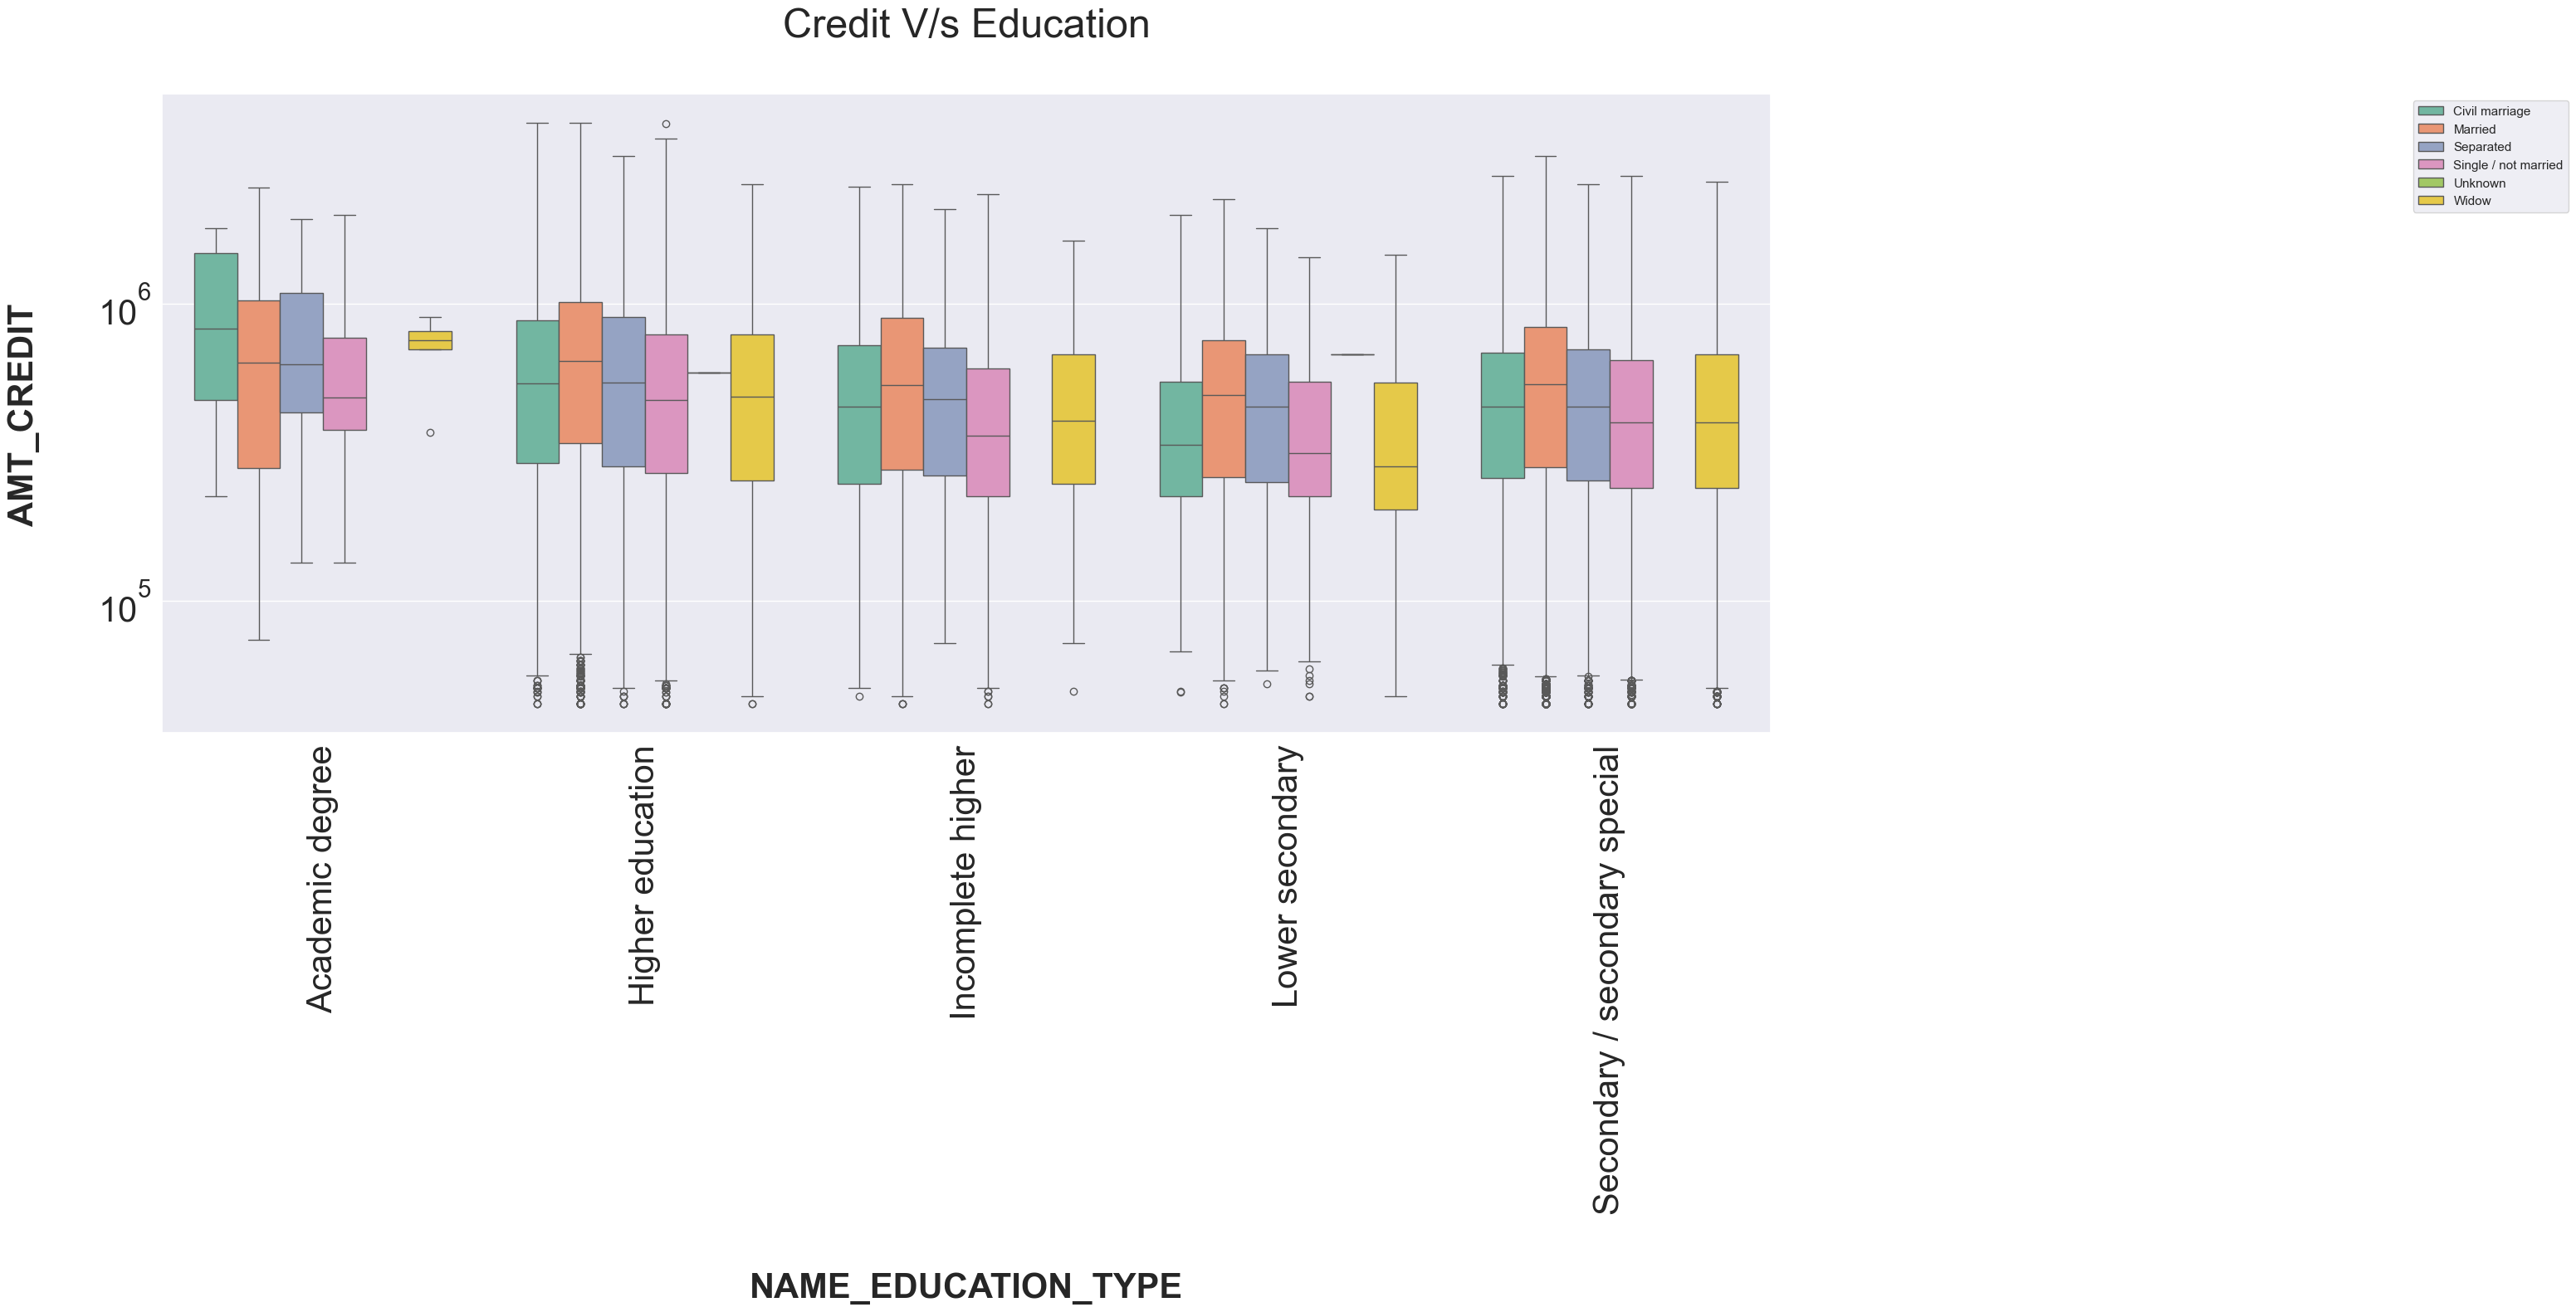

In [195]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      # Como los valores son demasiado grandes, es conveniente usar el logaritmo para un mejor análisis

plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Análisis:

- Los clientes con diferentes niveles de **educación**, excepto aquellos con **título académico**, presentan una gran cantidad de **valores atípicos**.

- La mayoría de la población, es decir, los **montos de crédito** de los clientes, se encuentran por debajo del **25%**.

- Los clientes con **título académico** y que además son **viudos** tienden a solicitar préstamos de **mayor monto**.

- Algunos clientes con **educación superior completa**, **educación superior incompleta**, **educación secundaria baja** y **educación secundaria/especializada** son más propensos a solicitar **montos altos de crédito**.

## 6.2.  Target 1

### 6.2.1 Income_Amount   Vs   Education_Status    Vs   FAMILY_Status  para Target 1

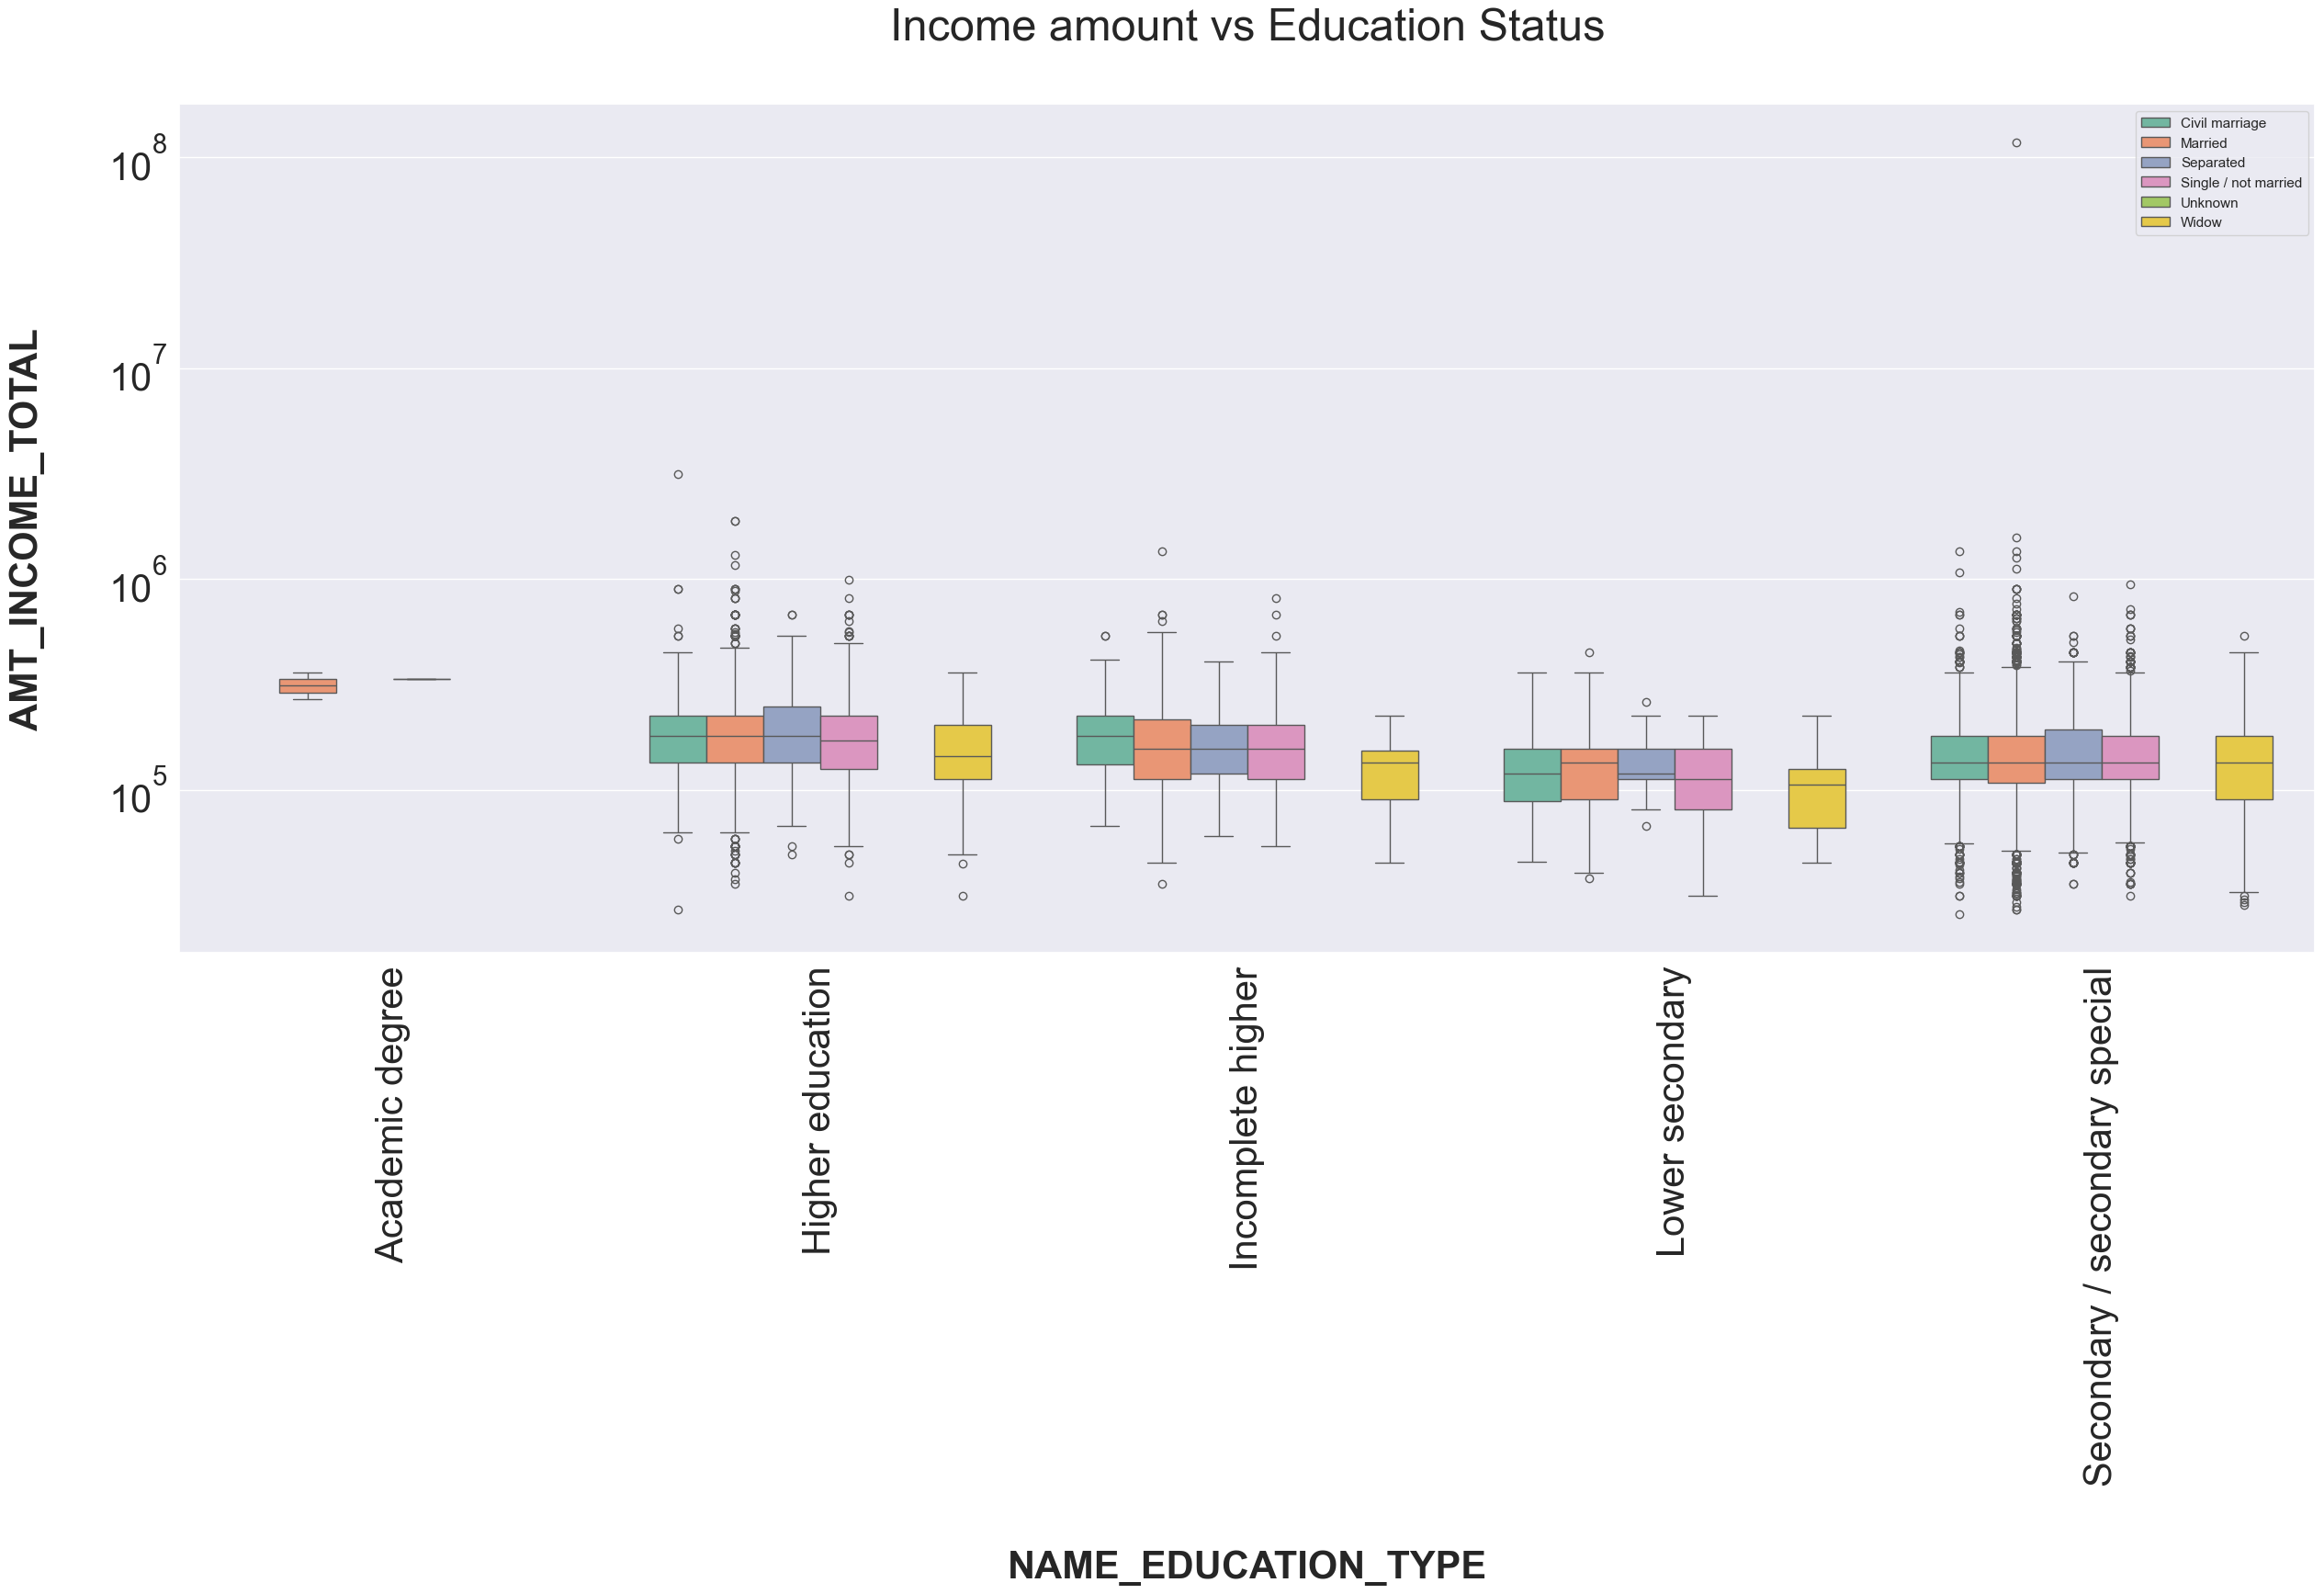

In [196]:
plt.figure(figsize=(30,12)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Análisis:

- El **monto de ingreso** de los clientes casados con título académico es mucho menor en comparación con otros grupos.

- Los clientes **morosos (Defaulters)** tienen ingresos relativamente más bajos en comparación con los **no morosos (Non-defaulters)**.

### 6.2.2 Credit Amount Vs Eduacation status Vs  FAMILY_Status

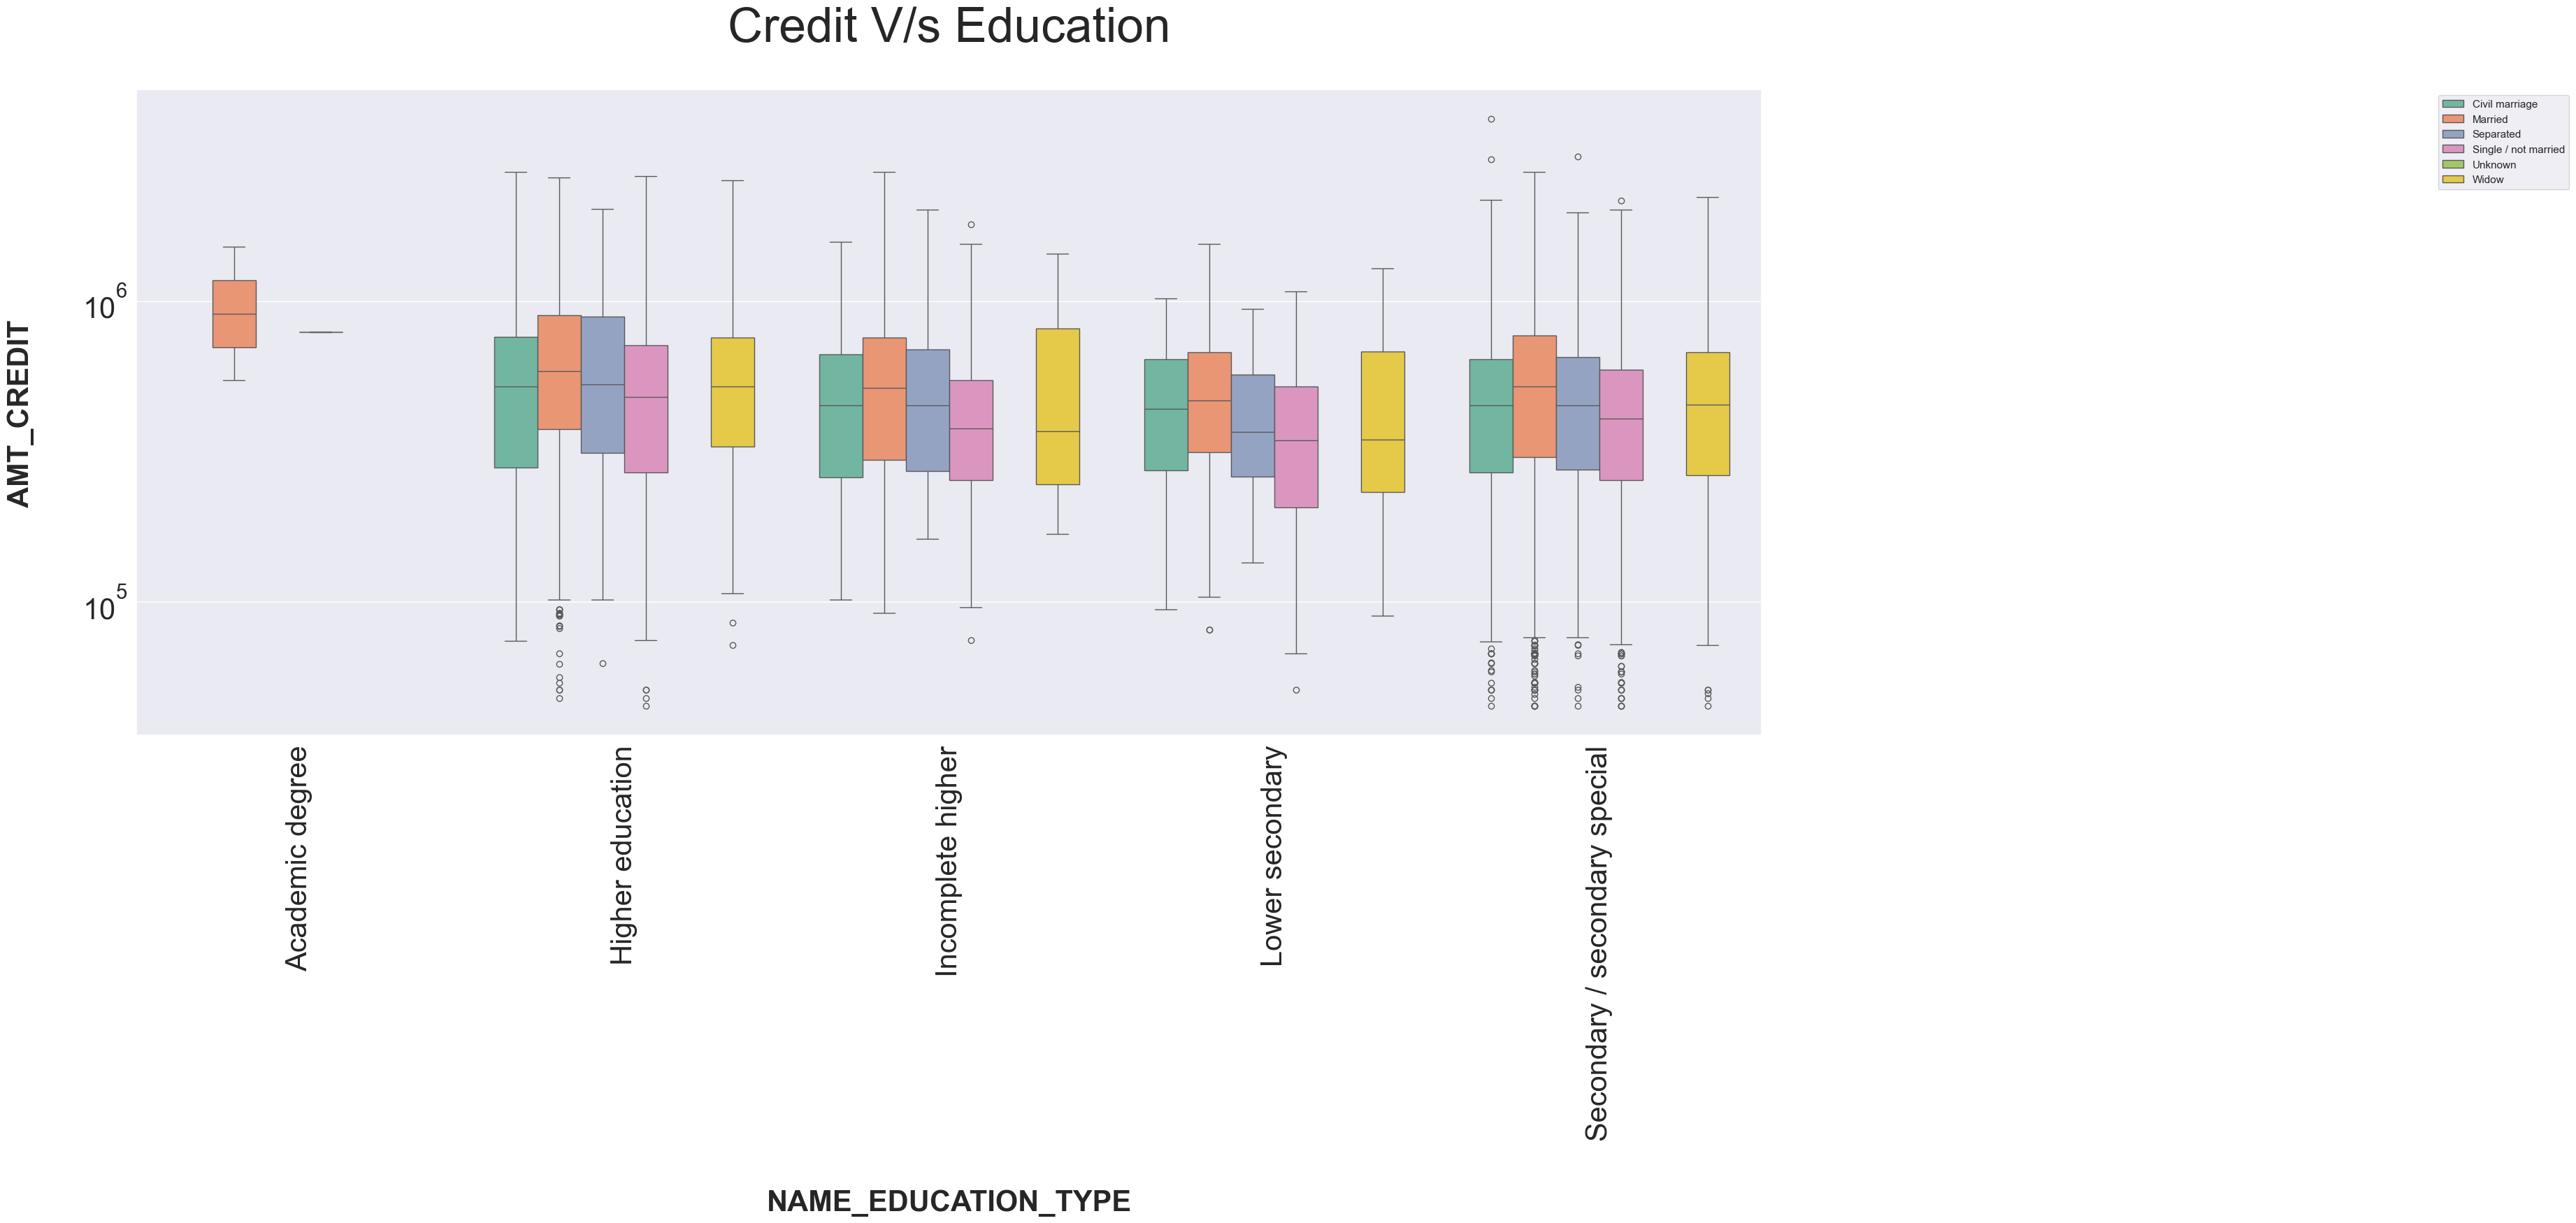

In [197]:
plt.figure(figsize=(30,12))               
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Análisis:

- Los clientes casados con título académico solicitaron **préstamos de mayor monto**, y no presentan valores atípicos. Los clientes solteros con **título académico** tienen un boxplot muy estrecho y sin valores atípicos.

- Algunos clientes con **educación superior completa**, **educación superior incompleta**, **educación secundaria baja** y **educación secundaria/especializada** son más propensos a solicitar **montos altos de crédito**.


# 8. Correlaciones

## 8.1 Correlaciones para las variables numericas usando "Pair Plots "

**8.1.1 Analizando columnas numericas** 

In [206]:
numerical_col = df1.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**8.1.2 Total de atributos numericos**

In [207]:
len(numerical_col)

35

**8.1.3 Pairplot para Target 0**

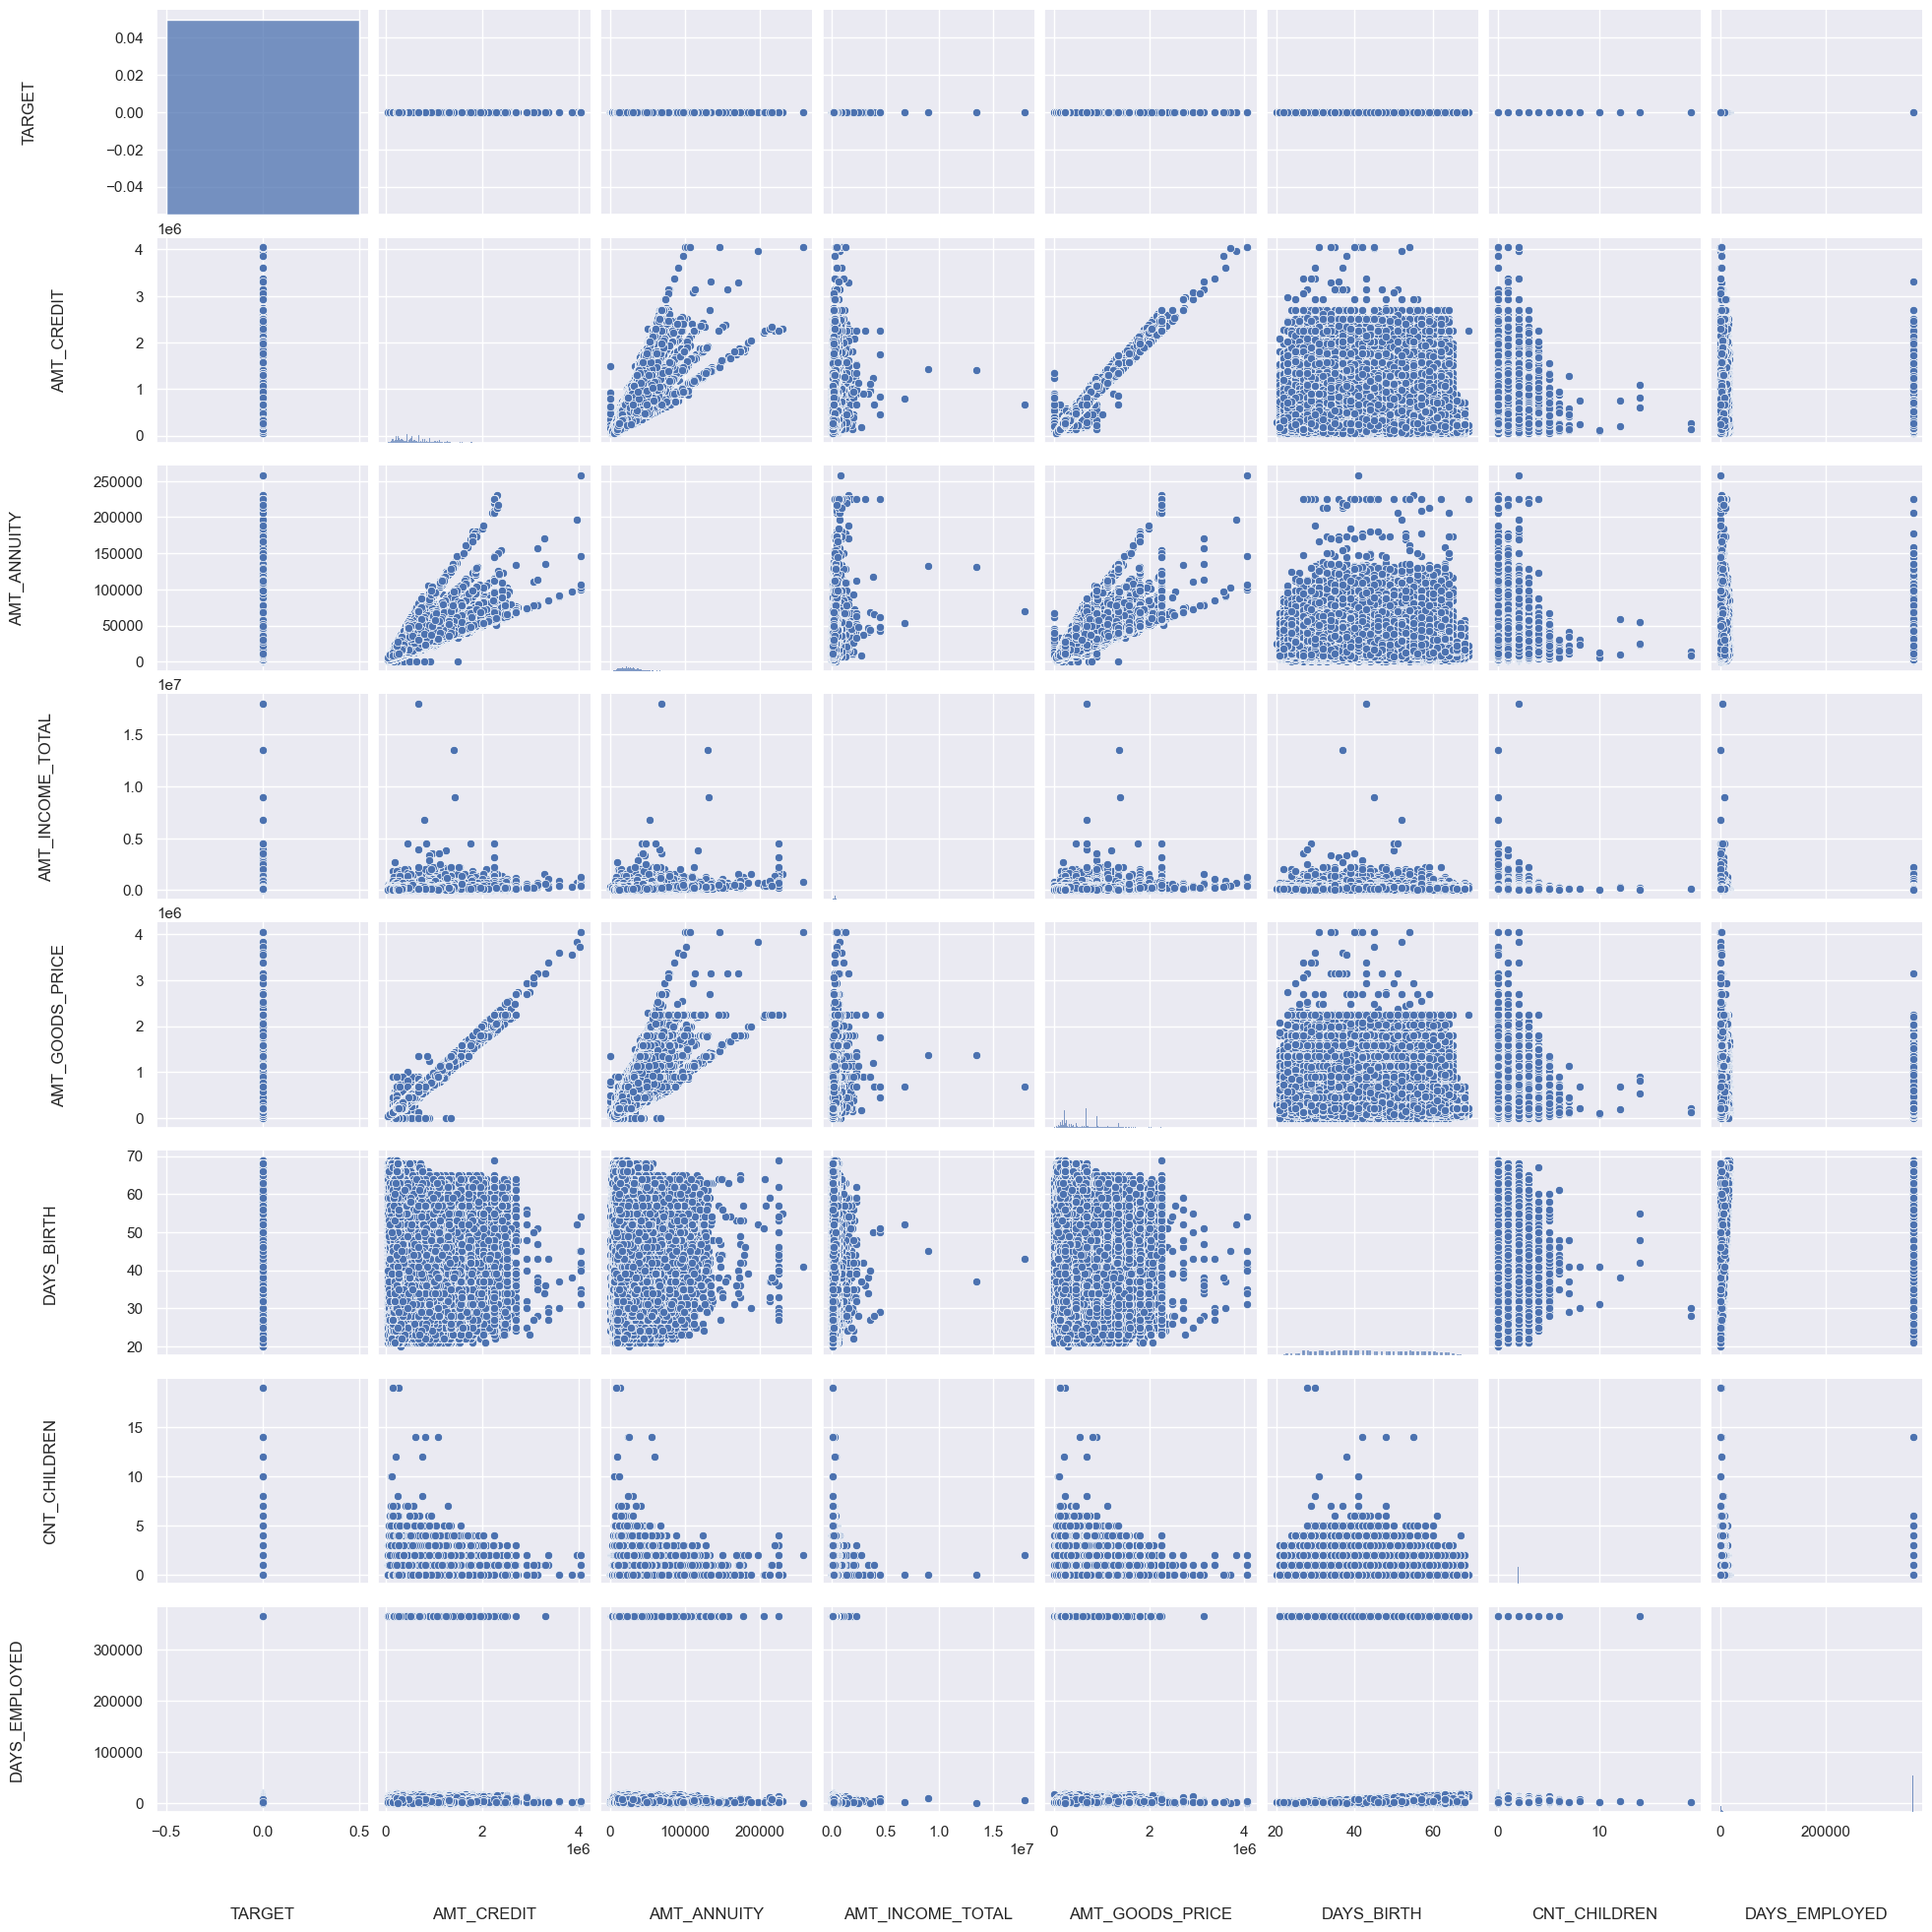

In [208]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

**8.1.4 Pairplot para Target 1**

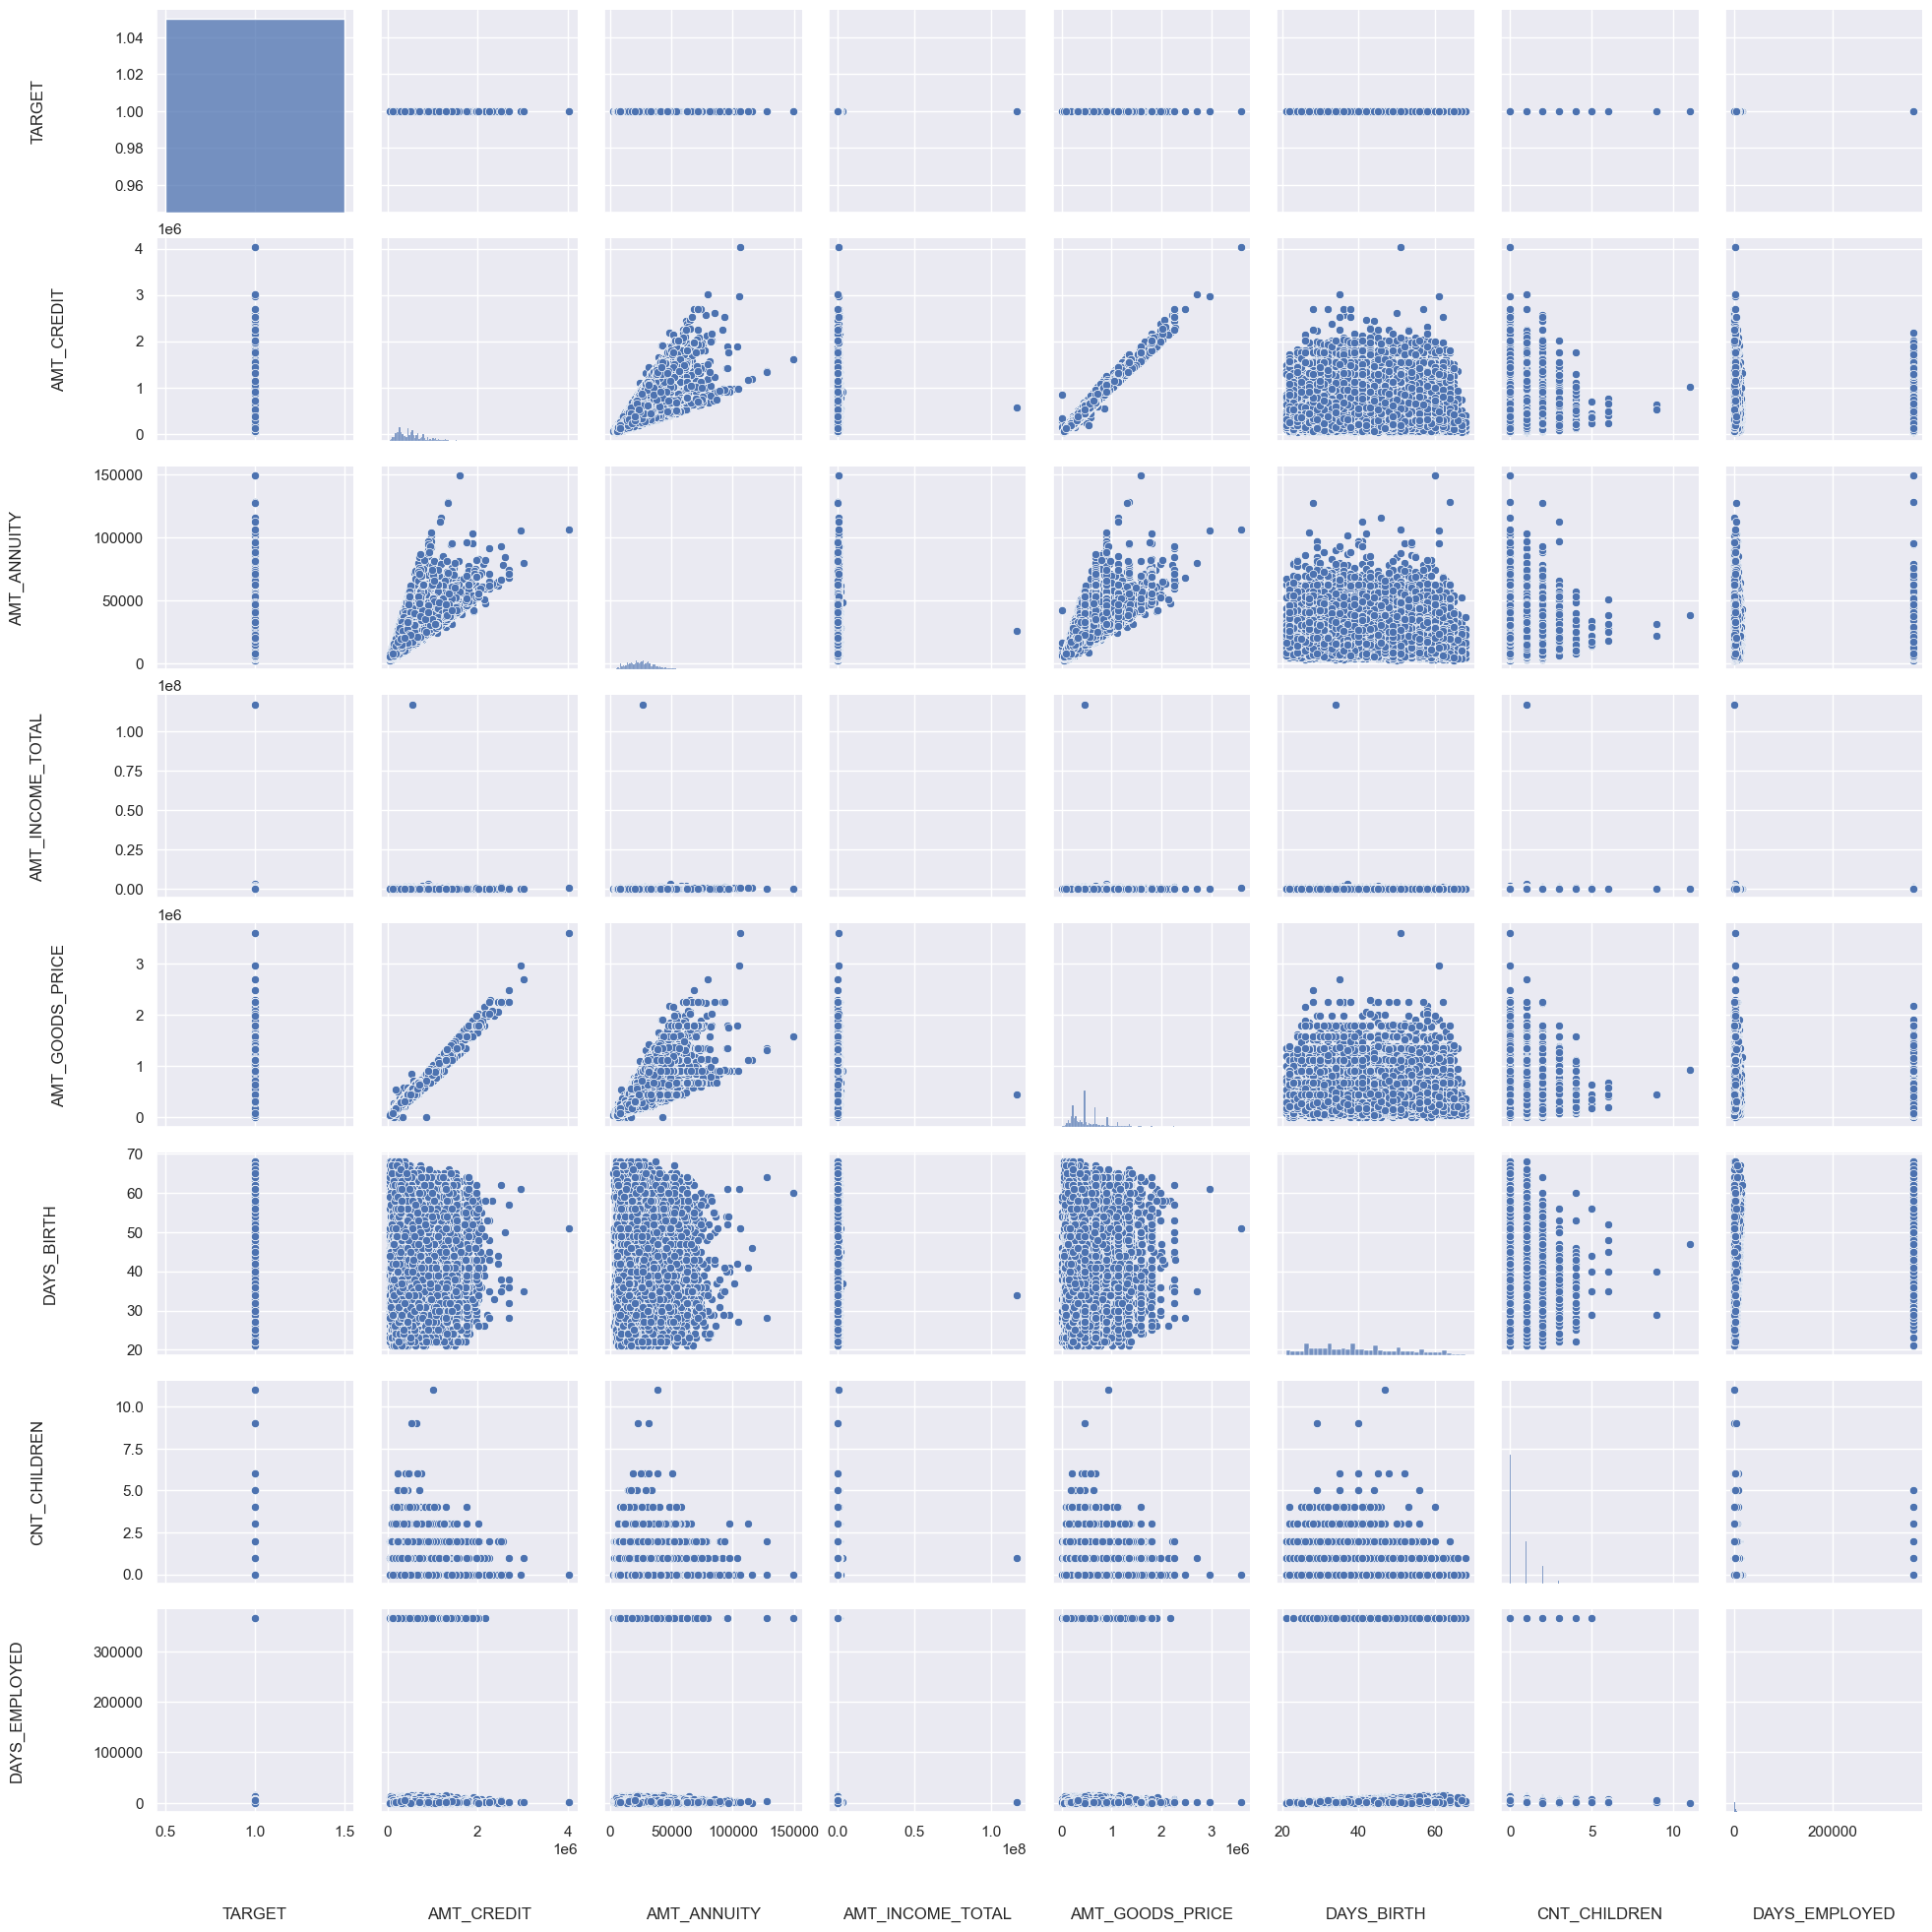

In [209]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Análisis:

- **`AMT_CREDIT`** y **`AMT_GOODS_PRICE`** son variables altamente correlacionadas tanto para clientes morosos como no morosos. Por lo tanto, a medida que aumenta el precio de la vivienda, también aumenta el monto del préstamo.

- **`AMT_CREDIT`** y **`AMT_ANNUITY`** (cuota mensual) también están altamente correlacionadas para ambos grupos. Esto significa que, a medida que aumenta el precio de la vivienda, también lo hace el valor de la cuota mensual, lo cual es lógico.

- Las tres variables **`AMT_CREDIT`**, **`AMT_GOODS_PRICE`** y **`AMT_ANNUITY`** están fuertemente correlacionadas tanto para morosos como no morosos, lo cual podría hacer que no sean buenos indicadores individuales para detectar clientes con riesgo de incumplimiento.

## 8.2 Correlaciones usando Heatmaps

**8.2.1 Separando la data**

In [213]:
# Filtrar primero por TARGET
corr0 = df1[df1['TARGET'] == 0].select_dtypes(include='number')
corr1 = df1[df1['TARGET'] == 1].select_dtypes(include='number')

In [214]:
# Calcular correlaciones con método de Spearman
t0 = corr0.corr(method='spearman')  # Para no morosos
t1 = corr1.corr(method='spearman')  # Para morosos

In [216]:
t0

SK_ID_CURR  TARGET  FLAG_OWN_CAR  \
SK_ID_CURR                     1.000000     NaN      0.001216   
TARGET                              NaN     NaN           NaN   
FLAG_OWN_CAR                   0.001216     NaN      1.000000   
FLAG_OWN_REALTY                0.000846     NaN     -0.005198   
CNT_CHILDREN                  -0.000279     NaN      0.111110   
AMT_INCOME_TOTAL               0.002246     NaN      0.227049   
AMT_CREDIT                     0.000552     NaN      0.110698   
AMT_ANNUITY                    0.001112     NaN      0.142247   
AMT_GOODS_PRICE                0.000926     NaN      0.114088   
REGION_POPULATION_RELATIVE     0.000414     NaN      0.043895   
DAYS_BIRTH                     0.001405     NaN     -0.135024   
DAYS_EMPLOYED                  0.001318     NaN     -0.108295   
DAYS_REGISTRATION              0.001895     NaN     -0.080856   
DAYS_ID_PUBLISH               -0.000040     NaN     -0.018108   
CNT_FAM_MEMBERS               -0.002642     NaN      0.162687   
HOUR_APPR_PROCESS_START        0.000089     NaN      0.014714   
REG_REGION_NOT_LIVE_REGION     0.000100     NaN     -0.000220   
REG_REGION_NOT_WORK_REGION     0.000833     NaN      0.040959   
LIVE_REGION_NOT_WORK_REGION    0.002783     NaN      0.048750   
REG_CITY_NOT_LIVE_CITY        -0.002884     NaN      0.005613   
REG_CITY_NOT_WORK_CITY        -0.001697     NaN      0.080711   
LIVE_CITY_NOT_WORK_CITY        0.000426     NaN      0.092008   
EXT_SOURCE_2                   0.000939     NaN      0.048179   
EXT_SOURCE_3                   0.000863     NaN     -0.017565   
OBS_30_CNT_SOCIAL_CIRCLE      -0.001746     NaN      0.003889   
DEF_30_CNT_SOCIAL_CIRCLE       0.000393     NaN     -0.014971   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001726     NaN      0.003874   
DEF_60_CNT_SOCIAL_CIRCLE       0.002061     NaN     -0.015861   
DAYS_LAST_PHONE_CHANGE         0.001096     NaN      0.033514   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.000961     NaN      0.003488   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002089     NaN      0.000157   
AMT_REQ_CREDIT_BUREAU_WEEK     0.003456     NaN      0.002309   
AMT_REQ_CREDIT_BUREAU_MON      0.000789     NaN      0.031125   
AMT_REQ_CREDIT_BUREAU_QRT     -0.001031     NaN      0.000793   
AMT_REQ_CREDIT_BUREAU_YEAR     0.003159     NaN     -0.007628   

                             FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                          0.000846     -0.000279          0.002246   
TARGET                                   NaN           NaN               NaN   
FLAG_OWN_CAR                       -0.005198      0.111110          0.227049   
FLAG_OWN_REALTY                     1.000000     -0.006911          0.005702   
CNT_CHILDREN                       -0.006911      1.000000          0.038308   
AMT_INCOME_TOTAL                    0.005702      0.038308          1.000000   
AMT_CREDIT                         -0.039588      0.002315          0.416017   
AMT_ANNUITY                        -0.008216      0.024767          0.485699   
AMT_GOODS_PRICE                    -0.041423     -0.001293          0.419929   
REGION_POPULATION_RELATIVE          0.026380     -0.025551          0.097772   
DAYS_BIRTH                          0.121714     -0.375611         -0.093418   
DAYS_EMPLOYED                       0.065514     -0.205693         -0.095898   
DAYS_REGISTRATION                   0.018637     -0.180517         -0.076387   
DAYS_ID_PUBLISH                    -0.000483      0.019986         -0.035931   
CNT_FAM_MEMBERS                     0.006163      0.810519          0.044988   
HOUR_APPR_PROCESS_START            -0.097977      0.001725          0.102384   
REG_REGION_NOT_LIVE_REGION         -0.034602     -0.010738          0.078372   
REG_REGION_NOT_WORK_REGION         -0.031329      0.015455          0.161441   
LIVE_REGION_NOT_WORK_REGION        -0.018277      0.021523          0.148976   
REG_CITY_NOT_LIVE_CITY             -0.060876      0.027788          0.020368   
REG_CITY

In [217]:
t1

SK_ID_CURR  TARGET  FLAG_OWN_CAR  \
SK_ID_CURR                     1.000000     NaN      0.000597   
TARGET                              NaN     NaN           NaN   
FLAG_OWN_CAR                   0.000597     NaN      1.000000   
FLAG_OWN_REALTY               -0.001038     NaN      0.023182   
CNT_CHILDREN                  -0.005789     NaN      0.072510   
AMT_INCOME_TOTAL               0.000836     NaN      0.203841   
AMT_CREDIT                    -0.006325     NaN      0.093832   
AMT_ANNUITY                   -0.008377     NaN      0.134805   
AMT_GOODS_PRICE               -0.006926     NaN      0.097904   
REGION_POPULATION_RELATIVE     0.005382     NaN      0.032420   
DAYS_BIRTH                     0.001710     NaN     -0.060879   
DAYS_EMPLOYED                  0.000825     NaN     -0.049125   
DAYS_REGISTRATION             -0.006776     NaN     -0.062241   
DAYS_ID_PUBLISH                0.001982     NaN      0.022095   
CNT_FAM_MEMBERS               -0.002741     NaN      0.117520   
HOUR_APPR_PROCESS_START        0.004597     NaN      0.013552   
REG_REGION_NOT_LIVE_REGION    -0.004242     NaN     -0.004104   
REG_REGION_NOT_WORK_REGION     0.004122     NaN      0.018434   
LIVE_REGION_NOT_WORK_REGION    0.004305     NaN      0.019824   
REG_CITY_NOT_LIVE_CITY         0.008411     NaN     -0.010266   
REG_CITY_NOT_WORK_CITY         0.000809     NaN      0.041705   
LIVE_CITY_NOT_WORK_CITY       -0.002939     NaN      0.055307   
EXT_SOURCE_2                   0.004425     NaN      0.044098   
EXT_SOURCE_3                  -0.004003     NaN     -0.026876   
OBS_30_CNT_SOCIAL_CIRCLE      -0.010206     NaN      0.018630   
DEF_30_CNT_SOCIAL_CIRCLE      -0.002938     NaN     -0.015917   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009913     NaN      0.018698   
DEF_60_CNT_SOCIAL_CIRCLE      -0.006320     NaN     -0.015181   
DAYS_LAST_PHONE_CHANGE        -0.000740     NaN      0.047365   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.010384     NaN      0.008465   
AMT_REQ_CREDIT_BUREAU_DAY     -0.009950     NaN     -0.005857   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.004217     NaN      0.004948   
AMT_REQ_CREDIT_BUREAU_MON     -0.002155     NaN      0.032943   
AMT_REQ_CREDIT_BUREAU_QRT     -0.000757     NaN     -0.001121   
AMT_REQ_CREDIT_BUREAU_YEAR     0.008444     NaN      0.017077   

                             FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                         -0.001038     -0.005789          0.000836   
TARGET                                   NaN           NaN               NaN   
FLAG_OWN_CAR                        0.023182      0.072510          0.203841   
FLAG_OWN_REALTY                     1.000000      0.016088          0.037284   
CNT_CHILDREN                        0.016088      1.000000         -0.004749   
AMT_INCOME_TOTAL                    0.037284     -0.004749          1.000000   
AMT_CREDIT                         -0.009824      0.000200          0.359276   
AMT_ANNUITY                         0.005461      0.033679          0.431617   
AMT_GOODS_PRICE                    -0.018414     -0.007572          0.362780   
REGION_POPULATION_RELATIVE          0.044189     -0.031628          0.051463   
DAYS_BIRTH                          0.109968     -0.267796          0.007080   
DAYS_EMPLOYED                       0.037631     -0.127943         -0.036127   
DAYS_REGISTRATION                   0.003608     -0.133658         -0.036671   
DAYS_ID_PUBLISH                    -0.017735      0.027320          0.005929   
CNT_FAM_MEMBERS                     0.027520      0.823307          0.003867   
HOUR_APPR_PROCESS_START            -0.110923     -0.022469          0.088174   
REG_REGION_NOT_LIVE_REGION         -0.053760     -0.025824          0.076449   
REG_REGION_NOT_WORK_REGION         -0.042446     -0.019571          0.156053   
LIVE_REGION_NOT_WORK_REGION        -0.018643     -0.009823          0.144970   
REG_CITY_NOT_LIVE_CITY             -0.068287      0.004127          0.008996   
REG_CITY

**8.2.2 Construyendo grafico**

In [218]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn')           

## 8.3 TARGET 0

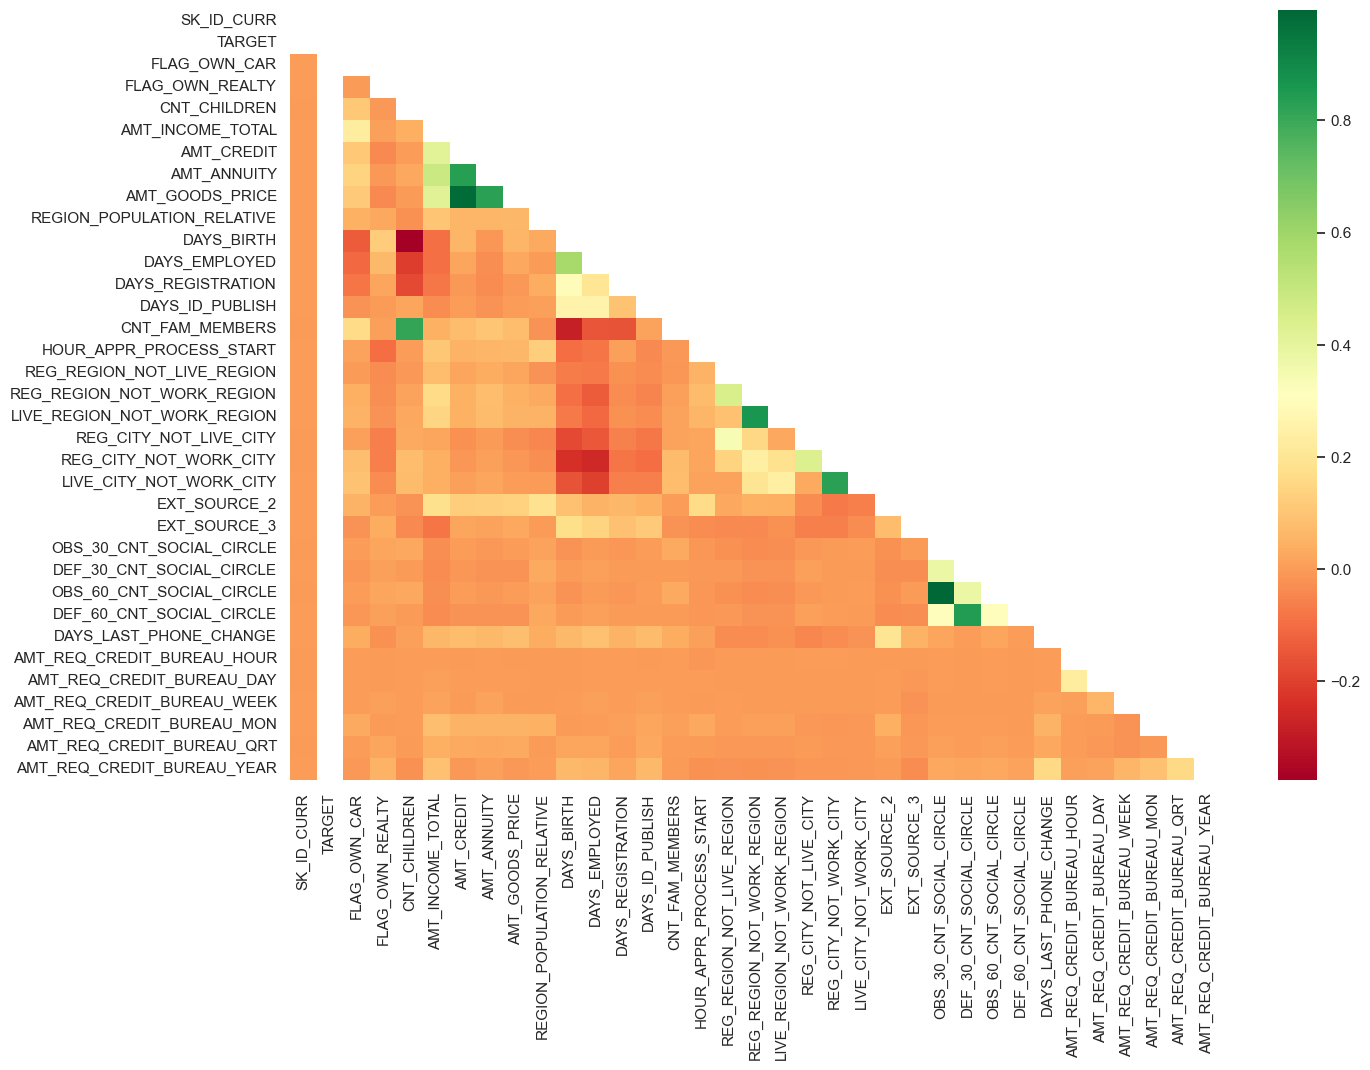

In [220]:
targets_corr(data=t0,title='Correlation for Target 0')

## Análisis:

- **`AMT_CREDIT`** es inversamente proporcional a **`DAYS_BIRTH`**; es decir, las personas de menor edad tienden a solicitar montos de crédito más altos, y viceversa.

- **`AMT_CREDIT`** es inversamente proporcional a **`CNT_CHILDREN`**, lo que significa que los clientes con menos hijos tienden a solicitar montos de crédito más altos, y viceversa.

- **`AMT_INCOME_TOTAL`** también es inversamente proporcional a **`CNT_CHILDREN`**, lo que indica que los clientes con menos hijos suelen tener mayores ingresos, y viceversa.

- Los clientes con menos hijos tienden a vivir en zonas densamente pobladas.

- **`AMT_CREDIT`** tiende a ser más alto en zonas densamente pobladas.

- **`AMT_INCOME_TOTAL`** también tiende a ser más alto en zonas densamente pobladas.


## 8.4 TARGET 1

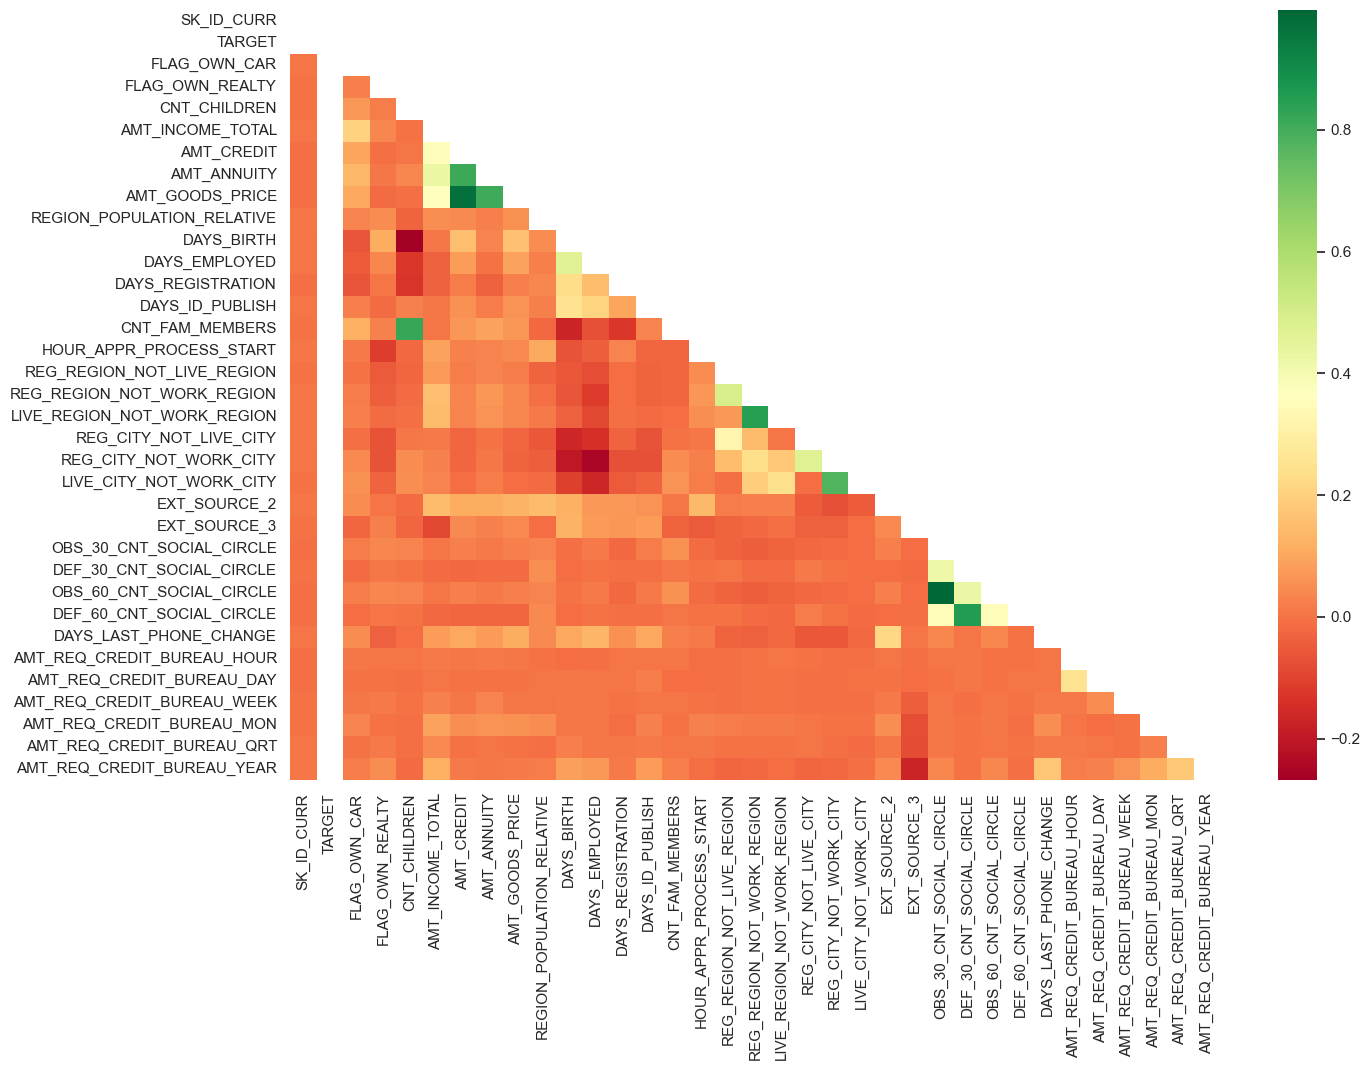

In [221]:
targets_corr(data=t1,title='Correlation for Target 1')

## Análisis:

- Este mapa de calor para `Target 1` presenta observaciones muy similares a las de `Target 0`, aunque existen algunas diferencias que se detallan a continuación:

- Los clientes cuya dirección permanente no coincide con su dirección de contacto tienden a tener menos hijos.

- Los clientes cuya dirección permanente no coincide con su dirección de trabajo también tienden a tener menos hijos.